## **Project Submission** - Item Demand Forecasting - **S Varun Athithiya** - D14 A

## **Problem Statement** 

* Demand forecasts are fundamental to plan and deliver products
and services. 
* Accurate forecasting of demand can help the manufacturers to maintain appropriate stock which results in reduction in loss due to product not being sold and also reduces the opportunity cost (i.e. higher demand but less
availability => opportunity lost). 
* Despite such relevance, manufacturers have difficulty choosing which forecast model is the best for their use case. 
* In this project, historical sales data corresponding to 50 items sold in 10 stores are provided and participants are expected to come up with a best model to predict the future demand for products which results in maximum profit for the manufacturer. 
* **In general, the manufacturer incurs a loss of Rs. 10 for each item that is not sold (retention cost) and incurs an opportunity loss of Rs. 3 for excess demand.**
* Predict the demand for the next 3 months at the item level (i.e. all the stores combined).

#### **Time Series Forecasting Pipeline**
---

> Data Importing  >>  Data Wrangling  >>  EDA (decomposition, rolling stats, distribution plots)  >>  Stationarity Check  >>  Prediction  >>  Tuning

#### **What is a time series?** 
---

* A set of observations that are recorded  at fixed intervals of time


* **Applications**
> * Helps to forecast the business opportunity in the future by analyzing the past data.
> * Helps to evaluate the current accomplishment.

#### **Components of time series**
---


* **Trend**
> * if magnitude increases with time - upward trend
> * if magnitude decreases with time - downward trend
> * if magnitude remains constant - horizontal trend

* **Seasonality** - repeating ups and downs after a fixed time
* **Irregularity** - no systematic pattern, occurs for a short time, does not repeat itself after a fixed time. Also called residual or noise.
* **Cycles** - patterns that occur over several years time
* **Additive & Multiplicative Time Series**
> * If the amplitude increases with time, it is multiplicative series. A multiplicative timeseries can be converted into additive series by applying log transformation.
> * If the amplitude is constant with time - it is additive series.

#### **Stationarity**
---

* Constant mean
* Constant standard deviation
* Absence of **seasonality** i.e. *periodic behaviour over time*

**Let us understand the different types of stationarities and how to interpret the results of the above tests.**

> * **Strict Stationary:** the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.
> * **Trend Stationary:** A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.
> * **Difference Stationary:** A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.

**It’s always better to apply both the tests, so that we are sure that the series is truly stationary. Let us look at the possible outcomes of applying these stationary tests.**

> * **Case 1:** Both tests conclude that the series is not stationary -> series is not stationary
> * **Case 2:** Both tests conclude that the series is stationary -> series is stationary
> * **Case 3:** KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
> * **Case 4:** KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

#### **Stationarity Checks**
---



**Augmented Dickey Fuller Test (ADF)**


**Assumptions of ADF**
* **Ho** - Unit root exists or Non-stationary
* **H1** - No unit root or Stationary

**Condition to reject Ho** i.e. *Accepting Alternate Hypothesis (H1)*
* Test statistic < Critical value and
* p-value < 0.05

---

**Kwiatkowski Philips Schmidt Shin Test (KPSS)** 

**Assumptions of KPSS**
* **Ho** - Series is trend stationary (no unit root)
* **H1** - Unit root exists or non-stationary

**Condition to reject Ho** i.e. Accepting H1
* Test statistic > Critical value and
* p-value < 0.05

**Condition to fail to reject Ho** i.e. Accepting Ho = *No unit-root or Trend-stationary*
* Test statistic < Critical value and
* p-value < 0.05

#### **Auto Correlation Function (ACF) & Partial ACF**
---

* Helps us decide which model to use whether AR or MA or both i.e. ARMA


* **ACF** - Correlation between the observation at current and previous time spots
* **PACF** - Correlation between the observation at current and previous time spots after eliminating the influences on the previous time spots. *Therefore, in practice, PACF is used to evaluate AR model and ACF is used to evaluate MA model* 
> Firstly, observe the dataset for a trend. If a trend exists, use differencing to detrend the data. Usually differencing by 1-lag is used.
> PACF is used to determine the terms used in the AR model.
> ACF is used to determine the terms used in the MA model.

* Helps us to understand whether to use AR or MA for forecasting
* Helps us decide how many days to look back to predict the current value

##### **Note**
---

*It was not easy to interpret the values of p,d,q from these plots. Hence, the rmse error value for the corresponding p,d,q value was computed. The p,d,q with the lowest rmse was chosen.*

#### **Forecasting Techniques**
---
* Decision Tree
* Xtreme Gradient Boosting
* Holt Winter's 
* ARIMA
* SARIMA

# **Code**

**Methodology**
* Data Import
* Data Wrangling
* Data Visualization (item-wise)
* Model Building & Forecasting (item-wise) except ARIMA & SARIMA due to complexity in computing hyper parameters
* Model evaluation (based on avg r2 and rmse of each model)
* Summary

#### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.tsa.stattools import adfuller, kpss

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import cross_val_score

from xgboost import XGBRegressor as XGB
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import datetime
import itertools
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **Data Import**

In [2]:
master_data = pd.read_csv('/content/IDF_train 2.csv', parse_dates=['date'], index_col=['date']).drop(['store'], axis=1)

#### **Data Wrangling**

In [3]:
md = master_data.copy()
md.head()

item  sales
date                   
2013-01-01     1     13
2013-01-02     1     11
2013-01-03     1     14
2013-01-04     1     13
2013-01-05     1     10

In [4]:
md.shape

(913000, 2)

In [5]:
md = md.groupby(['item','date']).agg({'sales':'sum'}).reset_index()
md = md.set_index('date', drop=True)
md

item  sales
date                   
2013-01-01     1    133
2013-01-02     1     99
2013-01-03     1    127
2013-01-04     1    145
2013-01-05     1    149
...          ...    ...
2017-12-27    50    511
2017-12-28    50    587
2017-12-29    50    596
2017-12-30    50    612
2017-12-31    50    626

[91300 rows x 2 columns]

In [6]:
md = md.groupby(['item']).sales.rolling(90).sum().shift(-90).dropna().reset_index().set_index('date', drop=True)
md.head()

item    sales
date                     
2013-01-01     1  12848.0
2013-01-02     1  12936.0
2013-01-03     1  13019.0
2013-01-04     1  13103.0
2013-01-05     1  13153.0

In [7]:
md.shape

(86849, 2)

#### **Data Visualization**

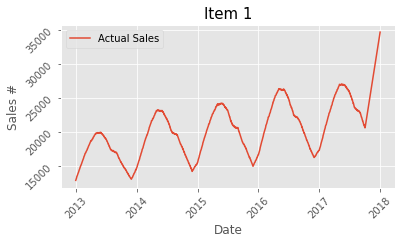

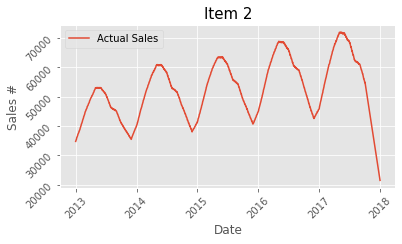

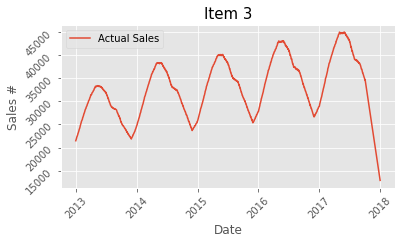

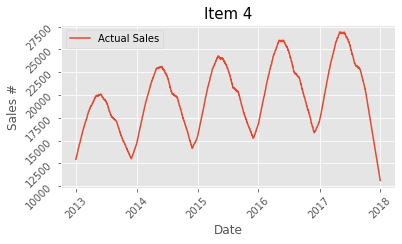

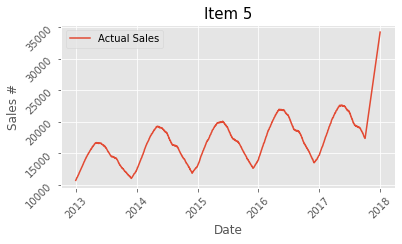

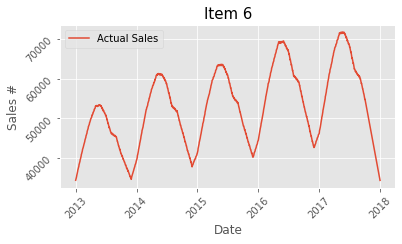

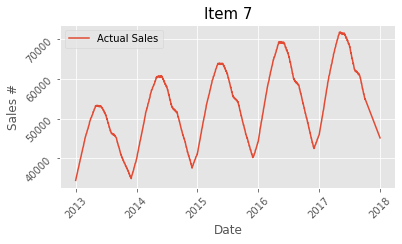

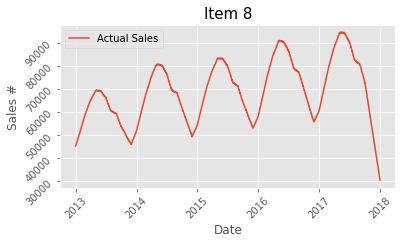

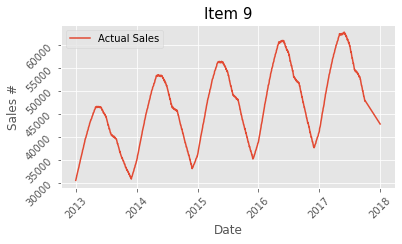

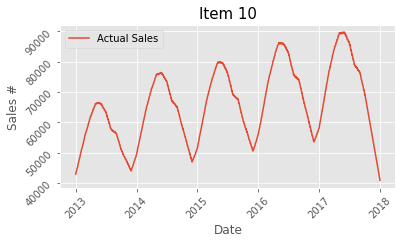

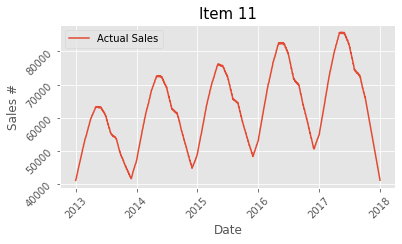

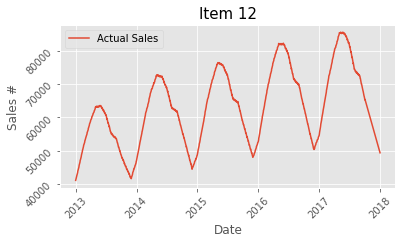

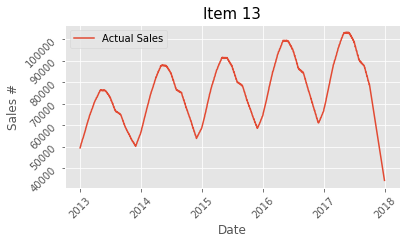

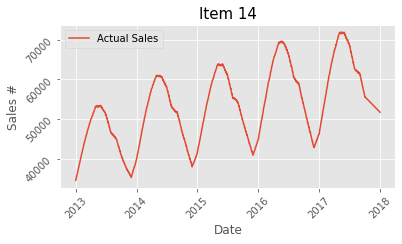

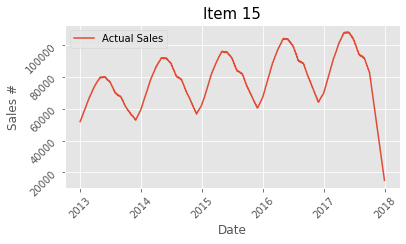

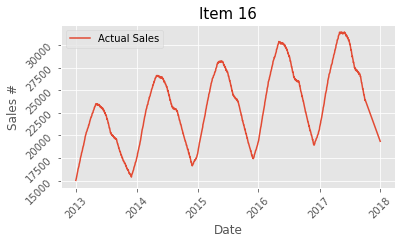

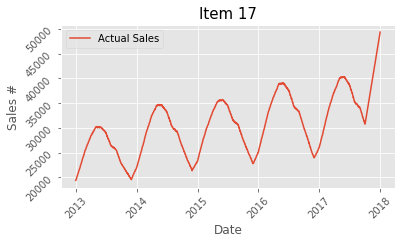

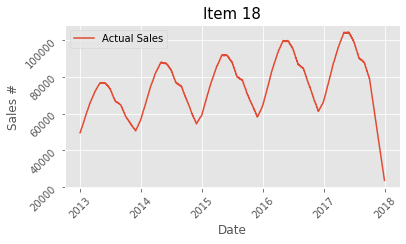

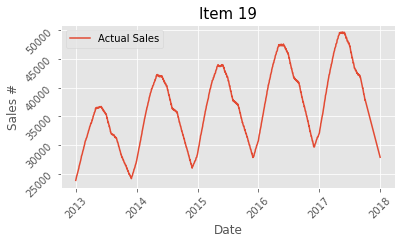

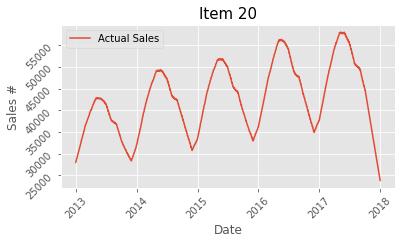

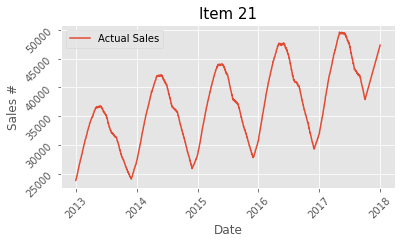

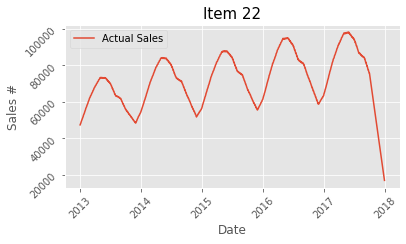

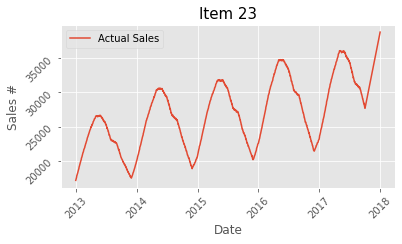

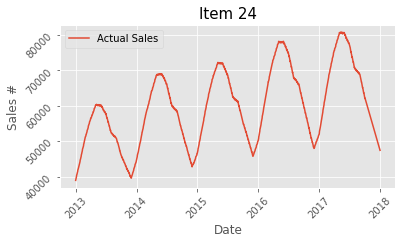

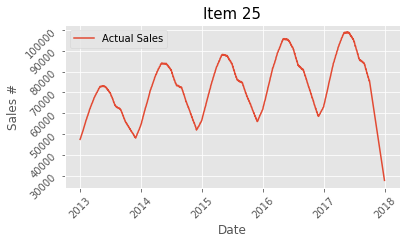

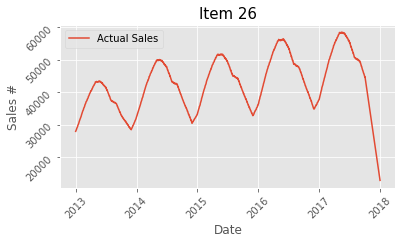

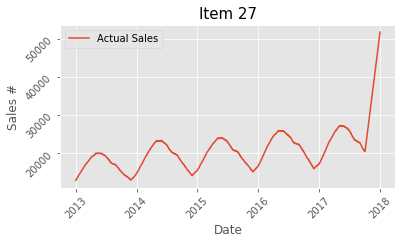

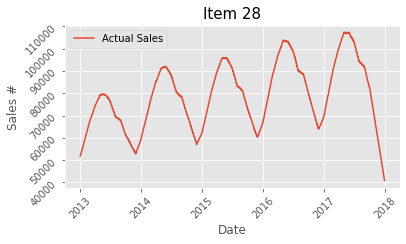

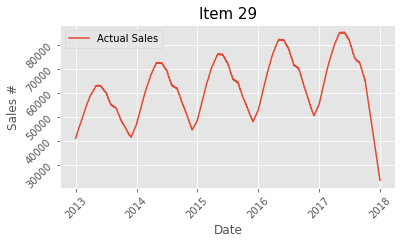

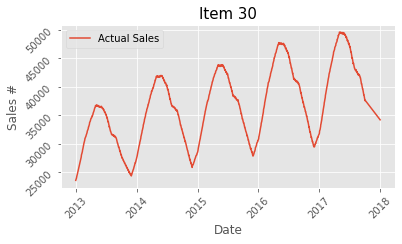

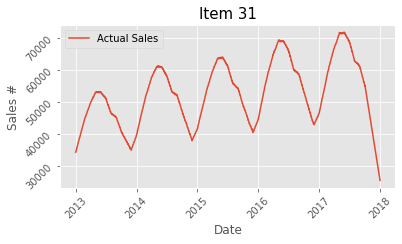

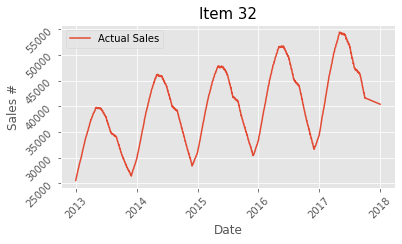

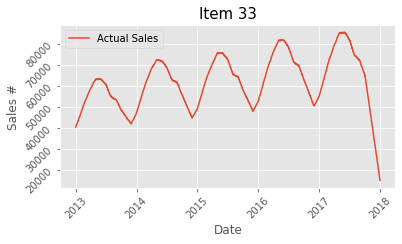

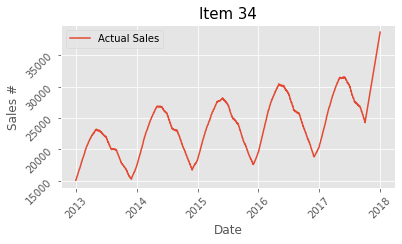

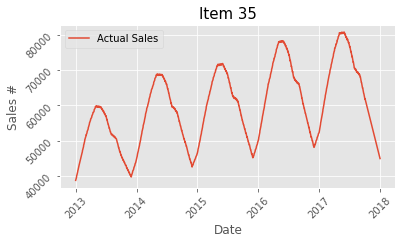

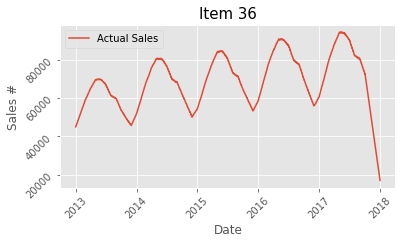

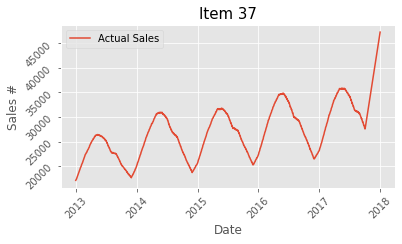

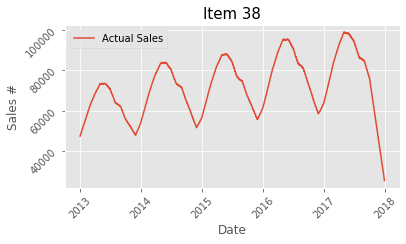

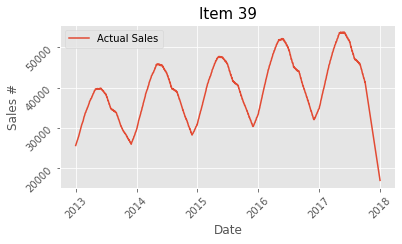

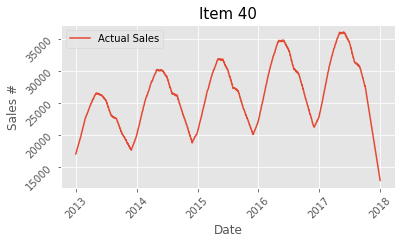

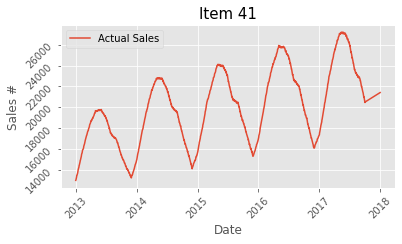

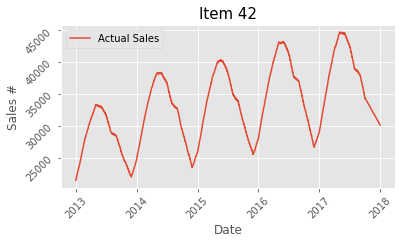

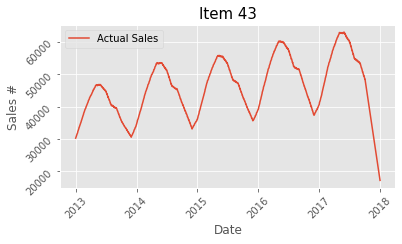

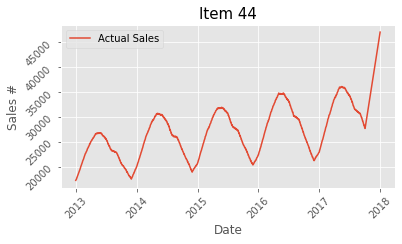

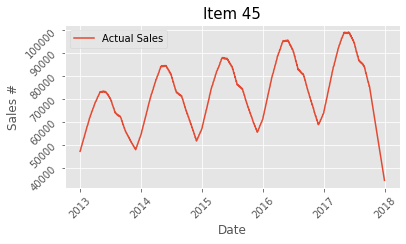

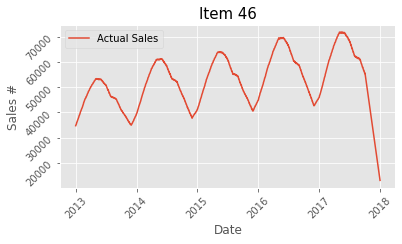

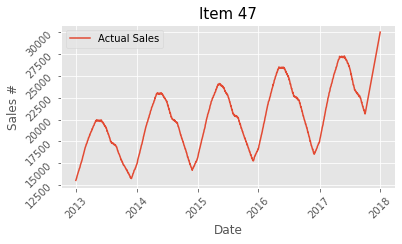

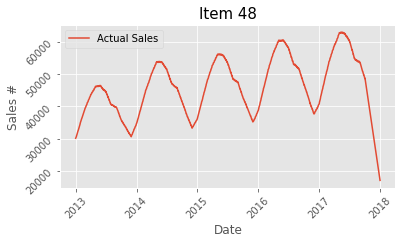

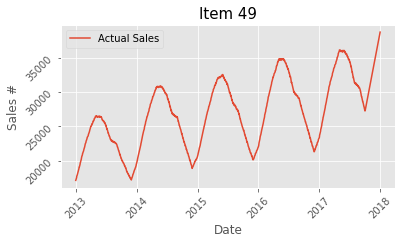

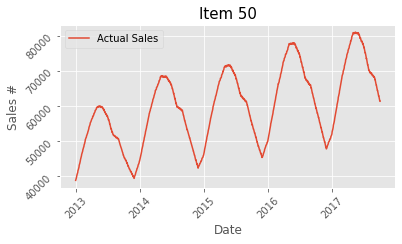

In [8]:
for i in list(md['item'].unique()):
  plotdf = md[md['item']==i]
  plotdf = plotdf.drop(['item'], axis=1)
  #print('Item_'+str(i))
  #print(plotdf,'\n')

  plt.figure(figsize=(6,3))
  plt.plot(plotdf, label='Actual Sales')
  plt.title('Item {}'.format(i), size=15)
  plt.xlabel('Date', size=12)
  plt.ylabel('Sales #', size=12)
  plt.xticks(rotation=45, size=10)
  plt.yticks(rotation=45, size=10)
  plt.legend(loc='best')
  plt.show()

#### **Distribution**

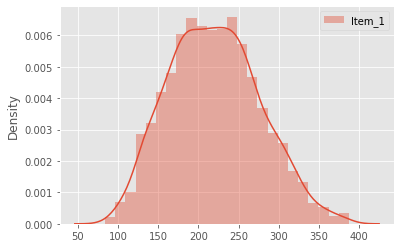

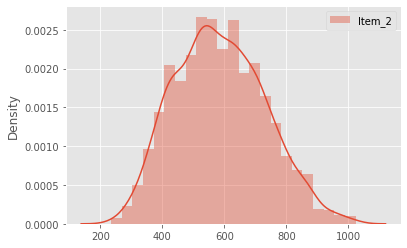

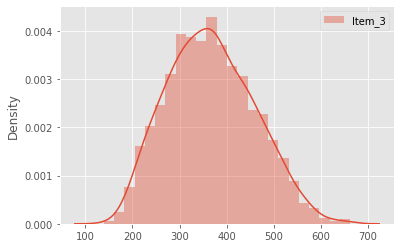

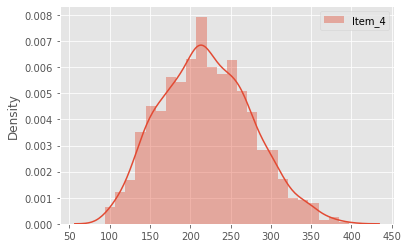

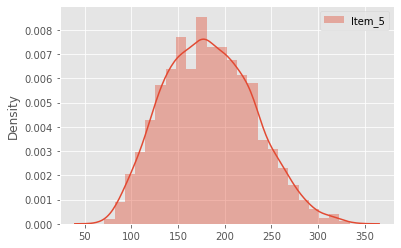

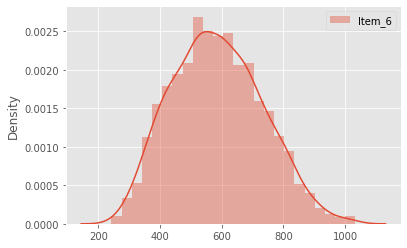

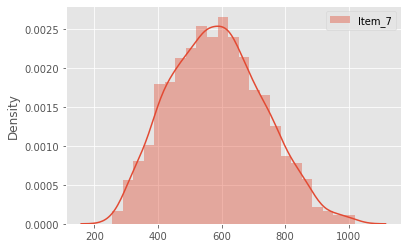

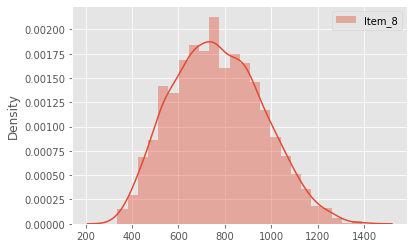

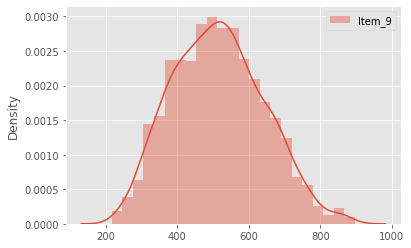

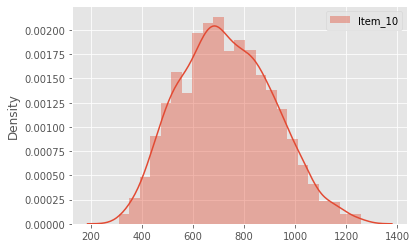

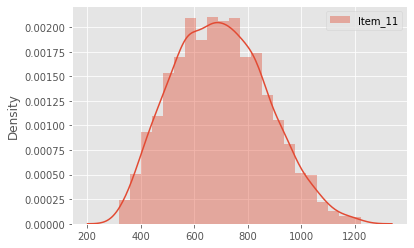

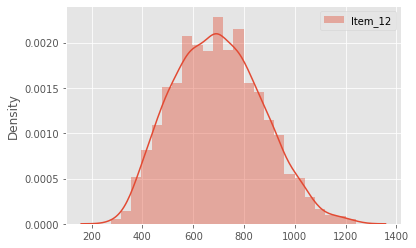

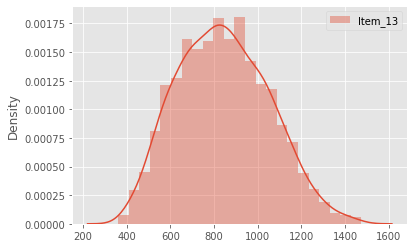

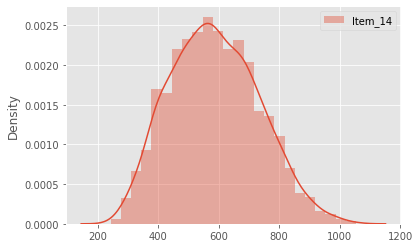

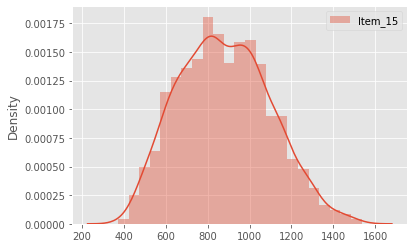

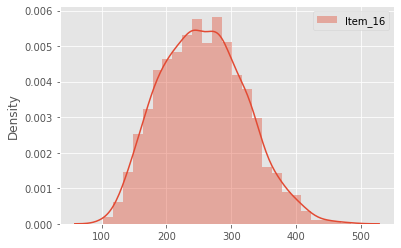

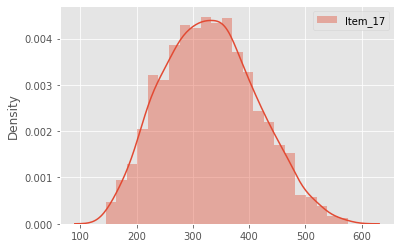

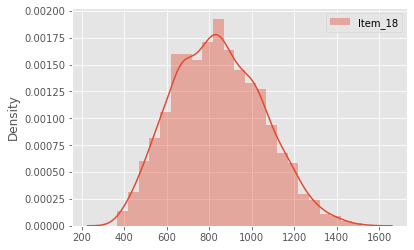

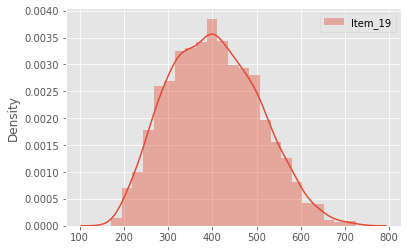

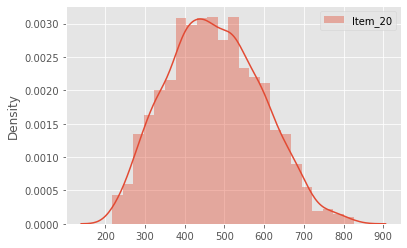

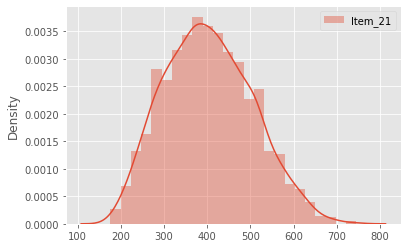

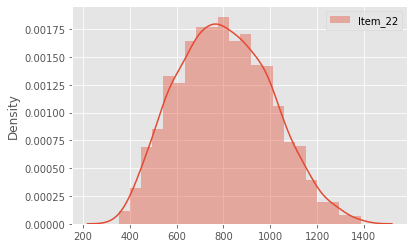

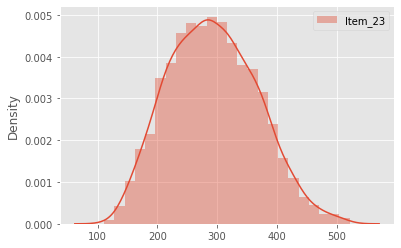

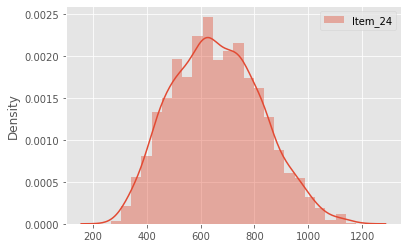

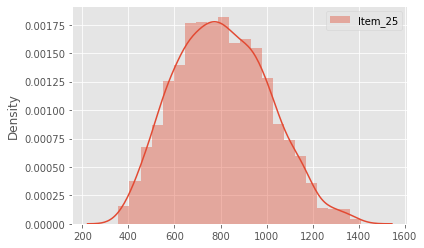

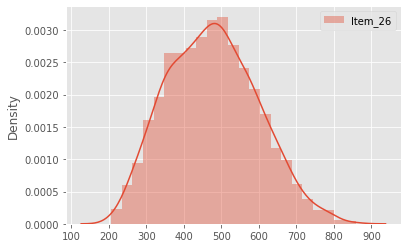

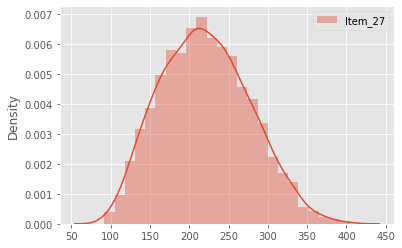

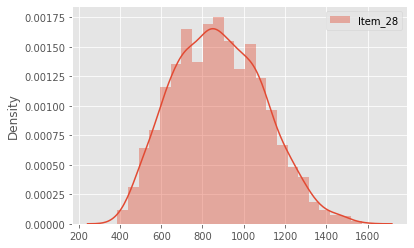

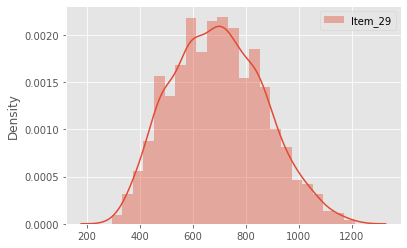

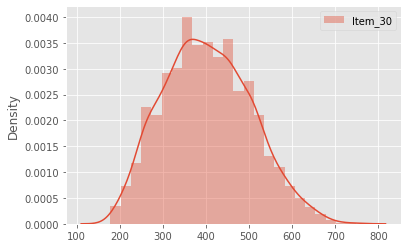

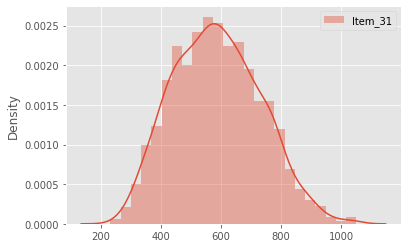

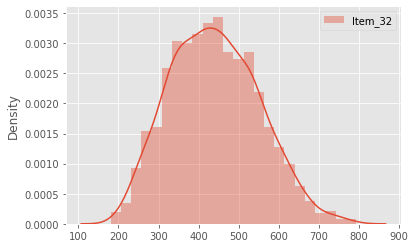

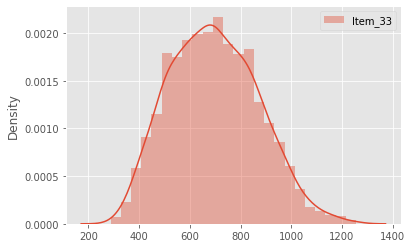

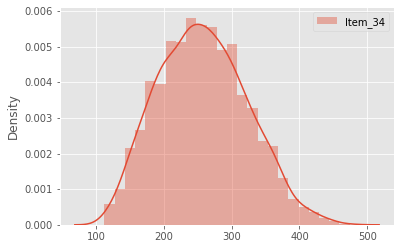

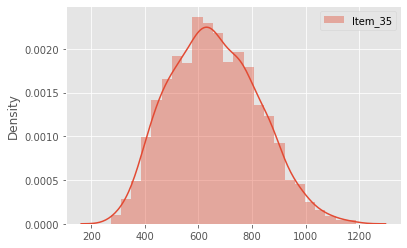

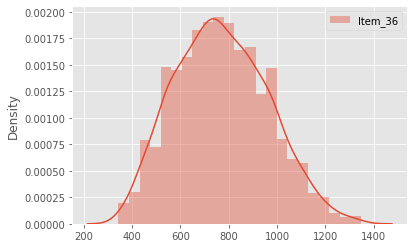

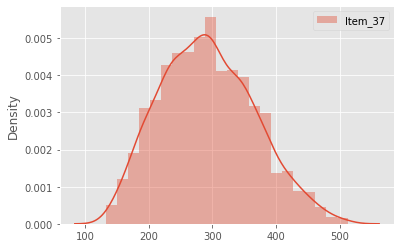

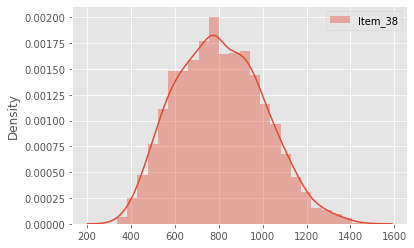

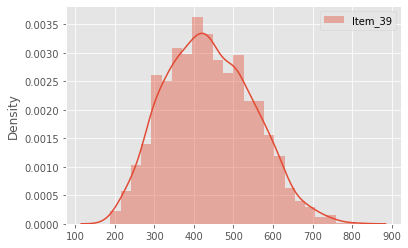

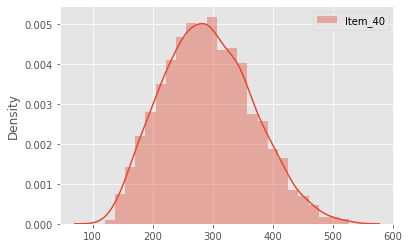

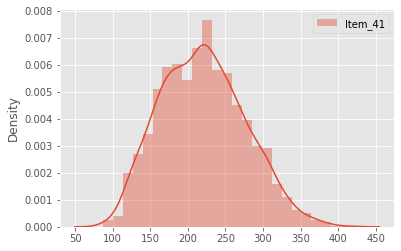

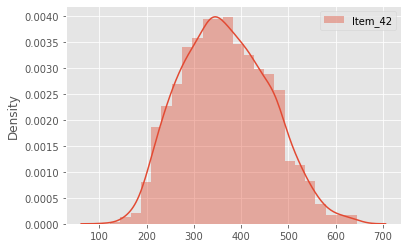

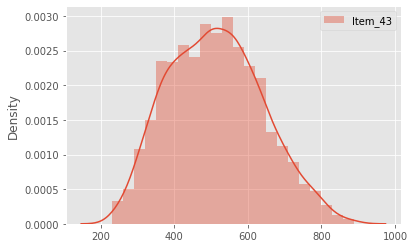

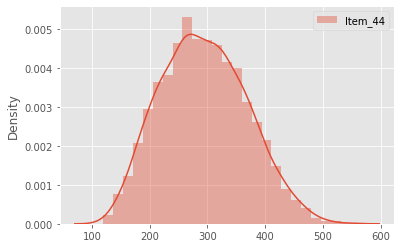

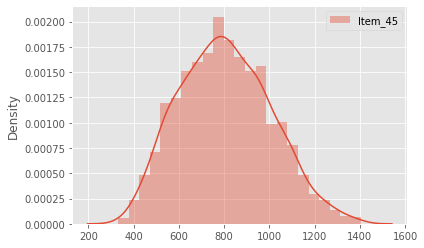

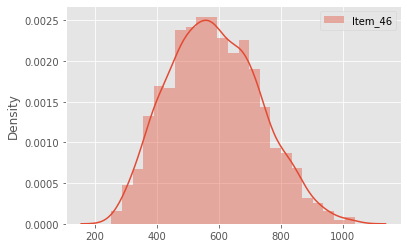

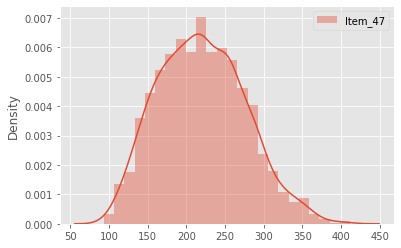

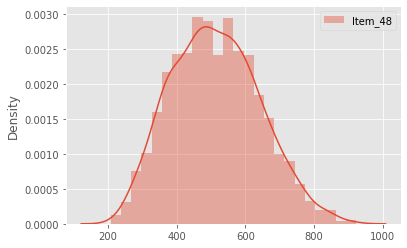

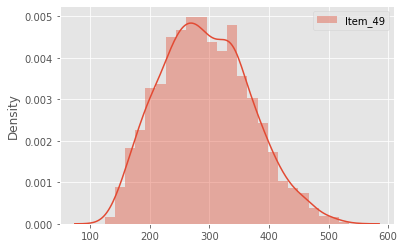

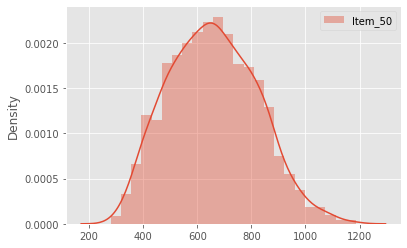

In [9]:
dist = master_data.copy()
dist = dist.groupby(['item','date']).agg({'sales':'sum'}).reset_index()
year_list = list(dist['date'].dt.year.unique())

for i in list(dist['item'].unique()):
  plt.figure(figsize=(6,4))
  df = dist[dist['item']==i].set_index('date', drop=True).drop('item', axis=1)
  sns.distplot(df,label='Item_'+str(i))
  plt.legend(loc='best')

#### **From the above, we can see that the sales numbers of all items follow normal distribution. Hence, we don't have to apply any sort of transformation to the data**

#### **Feature Engineering**

In [10]:
# feature engineering

md = md.reset_index()

#md['day_name'] = md['date'].dt.day_name()
md['day_of_month'] = md['date'].dt.day
md['month'] = md['date'].dt.month
md['year'] = md['date'].dt.year
md['wk_of_year'] = md['date'].dt.weekofyear
md['quarter'] = md['date'].dt.quarter
md['is_month_start'] = md['date'].dt.is_month_start.astype(int)
md['is_month_end'] = md['date'].dt.is_month_end.astype(int)
md['is_quarter_start'] = md['date'].dt.is_quarter_start.astype(int)
md['is_quarter_end'] = md['date'].dt.is_quarter_end.astype(int)

md

date  item    sales  day_of_month  month  year  wk_of_year  \
0     2013-01-01     1  12848.0             1      1  2013           1   
1     2013-01-02     1  12936.0             2      1  2013           1   
2     2013-01-03     1  13019.0             3      1  2013           1   
3     2013-01-04     1  13103.0             4      1  2013           1   
4     2013-01-05     1  13153.0             5      1  2013           1   
...          ...   ...      ...           ...    ...   ...         ...   
86844 2017-09-28    50  62200.0            28      9  2017          39   
86845 2017-09-29    50  61962.0            29      9  2017          39   
86846 2017-09-30    50  61687.0            30      9  2017          39   
86847 2017-10-01    50  61392.0             1     10  2017          39   
86848 2017-10-02    50  61395.0             2     10  2017          40   

       quarter  is_month_start  is_month_end  is_quarter_start  is_quarter_end  
0            1               1             0                 1               0  
1            1               0             0                 0               0  
2            1               0             0                 0               0  
3            1               0             0                 0               0  
4            1               0             0                 0               0  
...        ...             ...           ...               ...             ...  
86844        3               0             0                 0               0  
86845        3               0             0                 0               0  
86846        3               0             1                 0               1  
86847        4               1             0                 1               0  
86848        4               0             0                 0               0  

[86849 rows x 12 columns]

In [11]:
md = md.set_index('date',drop=True)
md

item    sales  day_of_month  month  year  wk_of_year  quarter  \
date                                                                        
2013-01-01     1  12848.0             1      1  2013           1        1   
2013-01-02     1  12936.0             2      1  2013           1        1   
2013-01-03     1  13019.0             3      1  2013           1        1   
2013-01-04     1  13103.0             4      1  2013           1        1   
2013-01-05     1  13153.0             5      1  2013           1        1   
...          ...      ...           ...    ...   ...         ...      ...   
2017-09-28    50  62200.0            28      9  2017          39        3   
2017-09-29    50  61962.0            29      9  2017          39        3   
2017-09-30    50  61687.0            30      9  2017          39        3   
2017-10-01    50  61392.0             1     10  2017          39        4   
2017-10-02    50  61395.0             2     10  2017          40        4   

            is_month_start  is_month_end  is_quarter_start  is_quarter_end  
date                                                                        
2013-01-01               1             0                 1               0  
2013-01-02               0             0                 0               0  
2013-01-03               0             0                 0               0  
2013-01-04               0             0                 0               0  
2013-01-05               0             0                 0               0  
...                    ...           ...               ...             ...  
2017-09-28               0             0                 0               0  
2017-09-29               0             0                 0               0  
2017-09-30               0             1                 0               1  
2017-10-01               1             0                 1               0  
2017-10-02               0             0                 0               0  

[86849 rows x 11 columns]

## **Model 1 - Xtreme Gradient Boosting**

#### **Data Structuring**

In [12]:
# dictionary for collecting the test data forecast results
test_forecast_dict_xgb = dict()

# dictionary for collecting the evaluation metrics of the test forecast
em_dict_xgb = dict()

#### **Model building & forecasting**

In [13]:
# running a for loop with a list of unique items in the dataset as the iterable
for i in list(md['item'].unique()):

  # filtering the data item-wise
  data = md[md['item']==i].drop(['item'], axis=1)
  #print(data)
  
  # Splitting the dataset into dependent and independent variable
  x = data.drop(['sales'], axis=1)
  y = data['sales']
   
  # Splitting data into training and testing sets
  # Here, we are limiting the test data upto 02/10/2017 because item no 50 is missing 90 days of data as a result of
  # rolling(90), shift(-90) and dropna() Hence, extending the prediction upto 31/12/2017 is resulting in a Value Error.
  
  x_train = x.loc[:'2016-12-31']
  x_test = x.loc['2017-01-01':'2017-10-02'] 
  y_train = y.loc[:'2016-12-31']
  y_test = y.loc['2017-01-01':'2017-10-02']

  # Model Building
  # Xtreme Gradient Boosting

  # Initializing the model
  xgbr = XGB(verbosity=0)
  
  # Fitting the data to the model
  xgbr.fit(x_train, y_train)

  # computing training score
  #train_score = xgbr.score(x_train, y_train)
  #cvs_train = cross_val_score(xgbr, x_train, y_train,cv=10)
  #print("Training score - {}".format(train_score))
  #print('Mean cv score - ',cvs_train.mean(),'\n')

  # predicting the test data
  y_pred = xgbr.predict(x_test)
  
  # creating key and value for test_forecast dictionary
  k = 'Item_'+str(i)
  v = y_pred

  # dictionary for test data
  test_forecast_dict_xgb.update({k:v})

  # Statistics
  Mean = data['sales'].mean()
  Std_dev = data['sales'].std()

  # Evaluation Metrics
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  mape = mean_absolute_percentage_error(y_test, y_pred)

  # creating a key and value for test_forecast evaluation metrics dictionary
  key = 'Item_'+str(i)
  value = {'r2':r2, 'MSE':mse, 'RMSE':rmse, 'MAE':mae, 'MAPE':mape}
  em_dict_xgb.update({key:value})

  #print('Dataset Statistics')
  #print('Mean - {}'.format(Mean))
  #print('Std dev - {}'.format(Std_dev),'\n')

  #Future forecast

In [14]:
# Dataframe for test data forecast
test_forecast_dict_xgb_df = pd.DataFrame(test_forecast_dict_xgb, index=[pd.date_range(start='2017-01-01', end='2017-10-02')])

# function for rounding off
def rounding_xgb(x):
  a = round(x,2)
  return a

for i in test_forecast_dict_xgb_df.columns:
  test_forecast_dict_xgb_df[i] = test_forecast_dict_xgb_df[i].apply(lambda x:rounding_xgb(x))

test_forecast_dict_xgb_df

Item_1    Item_2    Item_3    Item_4    Item_5    Item_6  \
2017-01-01  16684.70  45129.80  27953.97  17002.74  14045.18  45386.82   
2017-01-02  16934.68  45970.45  28384.74  17235.39  14332.04  45637.27   
2017-01-03  16958.41  46090.83  28445.24  17291.10  14381.05  45695.79   
2017-01-04  17002.37  46120.59  28512.00  17302.55  14403.23  45763.68   
2017-01-05  17053.03  46193.71  28608.12  17370.95  14458.89  45908.24   
...              ...       ...       ...       ...       ...       ...   
2017-09-28  20030.83  53768.78  33497.39  20074.09  16774.21  53824.52   
2017-09-29  20030.83  53768.78  33497.39  20067.77  16766.50  53764.89   
2017-09-30  20030.83  53768.78  33497.39  20067.77  16766.50  53764.89   
2017-10-01  19558.65  52648.12  32710.89  19591.58  16397.51  52584.67   
2017-10-02  19558.65  52480.66  32710.89  19591.58  16397.51  52369.50   

              Item_7    Item_8    Item_9   Item_10  ...   Item_41   Item_42  \
2017-01-01  44898.91  59183.72  39245.49  56326.88  ...  17180.29  28171.76   
2017-01-02  45477.79  59573.31  39866.13  57183.14  ...  17269.72  28573.14   
2017-01-03  45578.31  59791.14  39946.62  57357.74  ...  17328.87  28622.76   
2017-01-04  45589.13  59932.02  40003.24  57407.95  ...  17372.15  28709.53   
2017-01-05  45772.00  60056.52  40068.17  57704.27  ...  17404.82  28806.18   
...              ...       ...       ...       ...  ...       ...       ...   
2017-09-28  53280.09  70251.63  47102.53  67203.94  ...  19950.92  33567.39   
2017-09-29  53236.96  70236.42  47069.02  67176.91  ...  19942.88  33567.39   
2017-09-30  53211.74  70236.42  47069.02  67176.91  ...  19942.88  33567.39   
2017-10-01  52122.39  68997.60  46045.63  65795.48  ...  19554.85  32805.52   
2017-10-02  52054.45  68581.51  46045.63  65752.92  ...  19542.34  32787.27   

             Item_43   Item_44   Item_45   Item_46   Item_47   Item_48  \
2017-01-01  39438.44  22619.63  61734.14  45157.35  16820.78  39454.21   
2017-01-02  40121.25  22749.72  62536.73  45708.31  16991.32  39587.09   
2017-01-03  40255.87  22798.36  62646.70  45840.73  17030.21  39657.07   
2017-01-04  40296.29  22903.05  62787.84  45904.45  17074.93  39782.62   
2017-01-05  40463.49  22964.17  62945.45  46073.80  17114.11  39875.74   
...              ...       ...       ...       ...       ...       ...   
2017-09-28  47074.55  26675.04  73683.70  53612.37  20274.88  47260.09   
2017-09-29  47074.55  26675.04  73605.41  53572.58  20257.03  47204.31   
2017-09-30  47074.55  26675.04  73605.41  53572.58  20257.03  47204.31   
2017-10-01  46052.64  26111.07  72018.48  52492.39  19850.15  46093.08   
2017-10-02  46045.93  26073.31  72018.48  52492.39  19823.28  46052.75   

             Item_49   Item_50  
2017-01-01  22246.82  50340.66  
2017-01-02  22683.62  51149.18  
2017-01-03  22714.11  51186.47  
2017-01-04  22714.11  51315.82  
2017-01-05  22778.51  51496.82  
...              ...       ...  
2017-09-28  26569.04  60058.38  
2017-09-29  26558.57  60021.47  
2017-09-30  26558.57  60021.47  
2017-10-01  25995.12  58838.86  
2017-10-02  25995.12  58838.86  

[275 rows x 50 columns]

In [15]:
test_forecast_dict_xgb_df = test_forecast_dict_xgb_df.reset_index()
test_forecast_dict_xgb_df

level_0    Item_1    Item_2    Item_3    Item_4    Item_5    Item_6  \
0   2017-01-01  16684.70  45129.80  27953.97  17002.74  14045.18  45386.82   
1   2017-01-02  16934.68  45970.45  28384.74  17235.39  14332.04  45637.27   
2   2017-01-03  16958.41  46090.83  28445.24  17291.10  14381.05  45695.79   
3   2017-01-04  17002.37  46120.59  28512.00  17302.55  14403.23  45763.68   
4   2017-01-05  17053.03  46193.71  28608.12  17370.95  14458.89  45908.24   
..         ...       ...       ...       ...       ...       ...       ...   
270 2017-09-28  20030.83  53768.78  33497.39  20074.09  16774.21  53824.52   
271 2017-09-29  20030.83  53768.78  33497.39  20067.77  16766.50  53764.89   
272 2017-09-30  20030.83  53768.78  33497.39  20067.77  16766.50  53764.89   
273 2017-10-01  19558.65  52648.12  32710.89  19591.58  16397.51  52584.67   
274 2017-10-02  19558.65  52480.66  32710.89  19591.58  16397.51  52369.50   

       Item_7    Item_8    Item_9  ...   Item_41   Item_42   Item_43  \
0    44898.91  59183.72  39245.49  ...  17180.29  28171.76  39438.44   
1    45477.79  59573.31  39866.13  ...  17269.72  28573.14  40121.25   
2    45578.31  59791.14  39946.62  ...  17328.87  28622.76  40255.87   
3    45589.13  59932.02  40003.24  ...  17372.15  28709.53  40296.29   
4    45772.00  60056.52  40068.17  ...  17404.82  28806.18  40463.49   
..        ...       ...       ...  ...       ...       ...       ...   
270  53280.09  70251.63  47102.53  ...  19950.92  33567.39  47074.55   
271  53236.96  70236.42  47069.02  ...  19942.88  33567.39  47074.55   
272  53211.74  70236.42  47069.02  ...  19942.88  33567.39  47074.55   
273  52122.39  68997.60  46045.63  ...  19554.85  32805.52  46052.64   
274  52054.45  68581.51  46045.63  ...  19542.34  32787.27  46045.93   

      Item_44   Item_45   Item_46   Item_47   Item_48   Item_49   Item_50  
0    22619.63  61734.14  45157.35  16820.78  39454.21  22246.82  50340.66  
1    22749.72  62536.73  45708.31  16991.32  39587.09  22683.62  51149.18  
2    22798.36  62646.70  45840.73  17030.21  39657.07  22714.11  51186.47  
3    22903.05  62787.84  45904.45  17074.93  39782.62  22714.11  51315.82  
4    22964.17  62945.45  46073.80  17114.11  39875.74  22778.51  51496.82  
..        ...       ...       ...       ...       ...       ...       ...  
270  26675.04  73683.70  53612.37  20274.88  47260.09  26569.04  60058.38  
271  26675.04  73605.41  53572.58  20257.03  47204.31  26558.57  60021.47  
272  26675.04  73605.41  53572.58  20257.03  47204.31  26558.57  60021.47  
273  26111.07  72018.48  52492.39  19850.15  46093.08  25995.12  58838.86  
274  26073.31  72018.48  52492.39  19823.28  46052.75  25995.12  58838.86  

[275 rows x 51 columns]

In [16]:
test_forecast_dict_xgb_df = test_forecast_dict_xgb_df.set_index('level_0', drop=True)
test_forecast_dict_xgb_df.index.name=None

In [17]:
# Dictionary for performance evaluation metrics
em_dict_xgb_df = pd.DataFrame(em_dict_xgb)

# user defined function for rounding the results
def rounding_em(x):
  em = round(x,2)
  return em

for i in em_dict_xgb_df.columns:
  em_dict_xgb_df[i] = em_dict_xgb_df[i].apply(lambda x:rounding_em(x))

em_dict_xgb_df

Item_1      Item_2      Item_3     Item_4     Item_5      Item_6  \
r2         0.90        0.87        0.84       0.90       0.90        0.91   
MSE   704321.18  6125169.48  2875931.81  650780.29  451650.32  4361230.12   
RMSE     839.24     2474.91     1695.86     806.71     672.05     2088.36   
MAE      797.36     2374.10     1657.23     760.45     657.80     2024.51   
MAPE       0.03        0.04        0.04       0.03       0.03        0.03   

          Item_7       Item_8      Item_9      Item_10  ...    Item_41  \
r2          0.89         0.85        0.88         0.85  ...       0.86   
MSE   5026251.35  11686040.11  3861000.69  10554070.58  ...  988157.41   
RMSE     2241.93      3418.49     1964.94      3248.70  ...     994.06   
MAE      2162.02      3344.51     1918.48      3206.41  ...     923.94   
MAPE        0.03         0.04        0.04         0.04  ...       0.04   

         Item_42     Item_43     Item_44      Item_45     Item_46     Item_47  \
r2          0.89        0.84        0.88         0.86        0.90        0.85   
MSE   1862603.31  5543765.15  1467573.54  12460877.83  4978031.88  1056334.19   
RMSE     1364.77     2354.52     1211.43      3530.00     2231.15     1027.78   
MAE      1331.61     2287.94     1172.50      3472.36     2167.64      985.93   
MAPE        0.03        0.04        0.04         0.04        0.03        0.04   

         Item_48     Item_49     Item_50  
r2          0.85        0.84        0.89  
MSE   5023578.67  1899590.52  6387694.52  
RMSE     2241.33     1378.26     2527.39  
MAE      2213.40     1361.88     2462.46  
MAPE        0.04        0.04        0.03  

[5 rows x 50 columns]

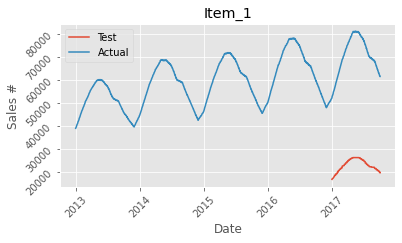

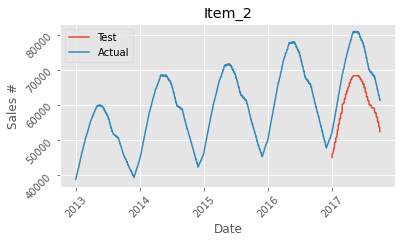

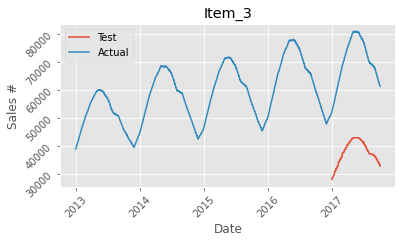

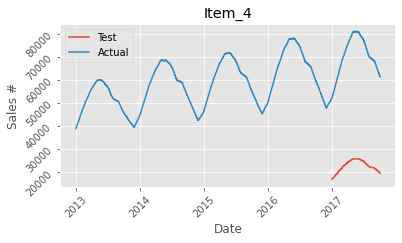

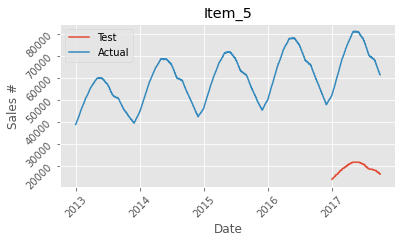

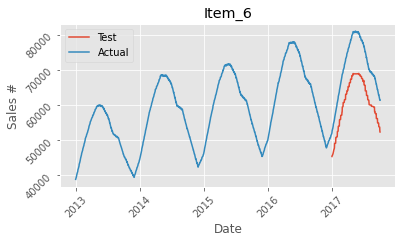

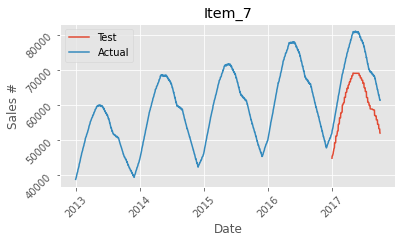

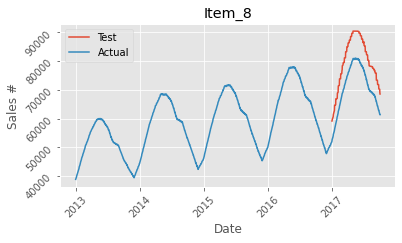

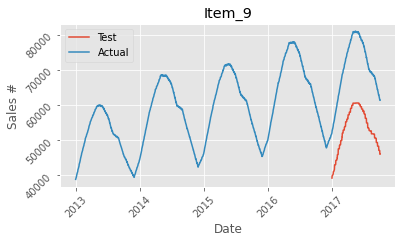

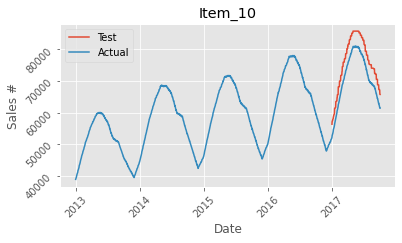

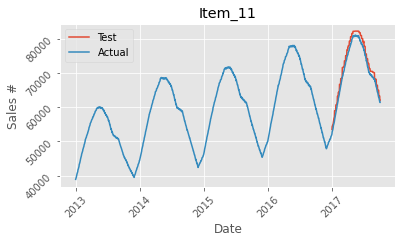

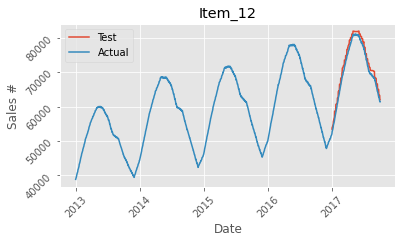

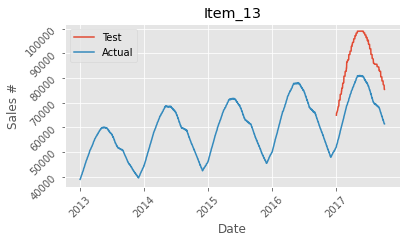

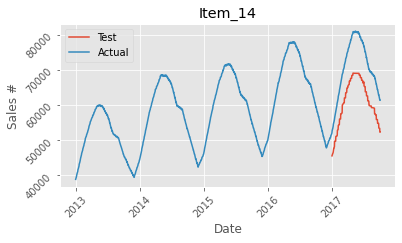

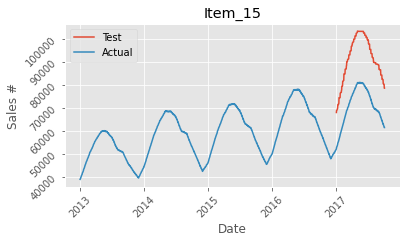

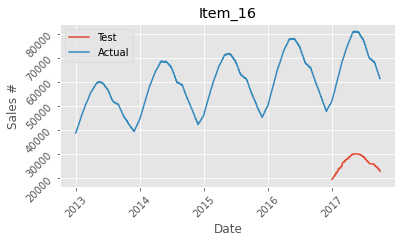

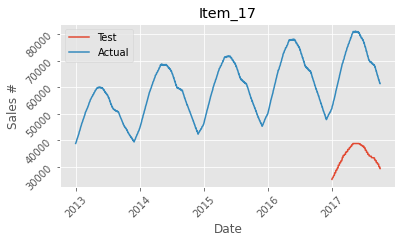

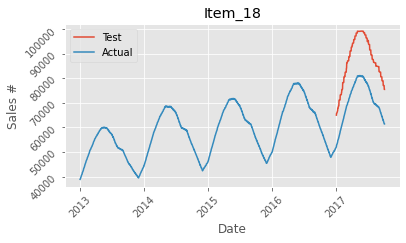

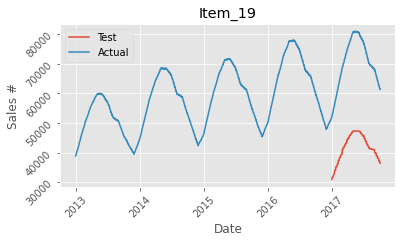

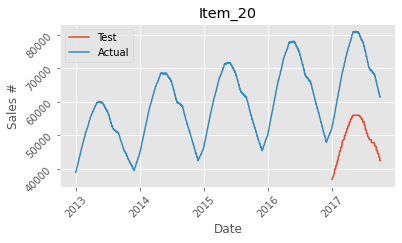

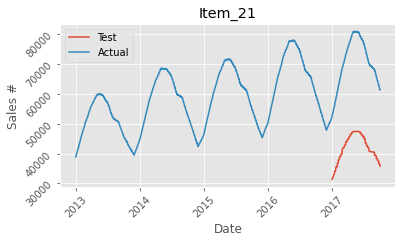

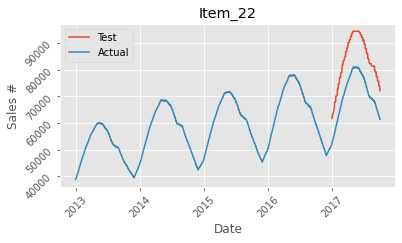

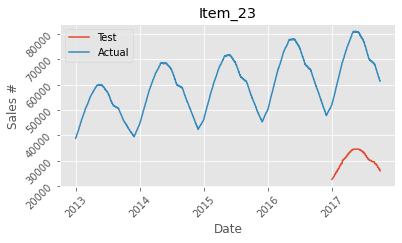

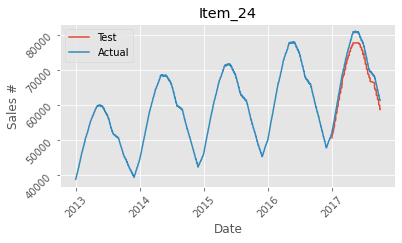

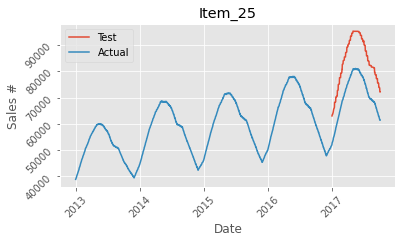

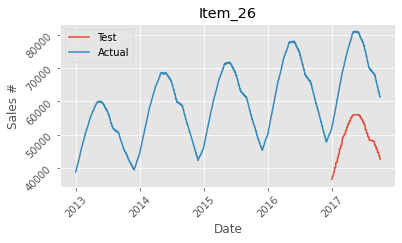

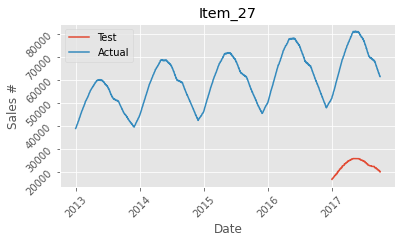

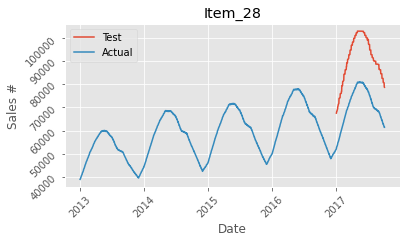

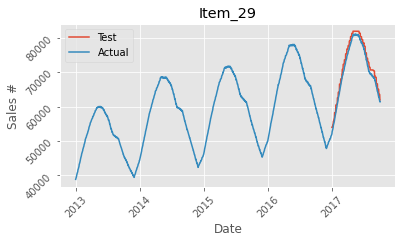

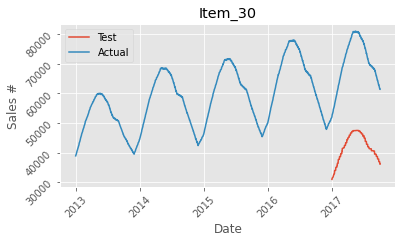

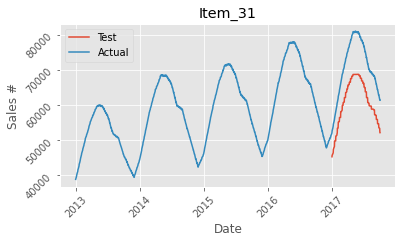

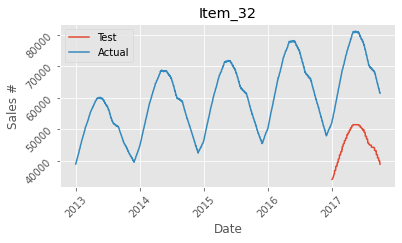

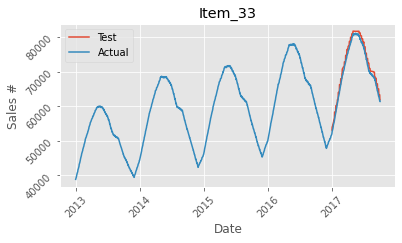

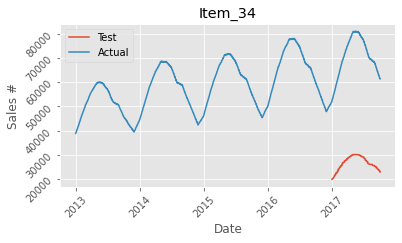

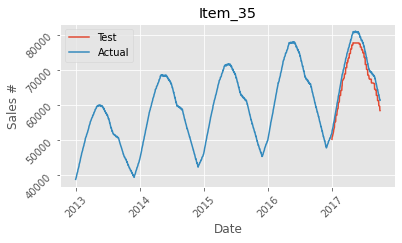

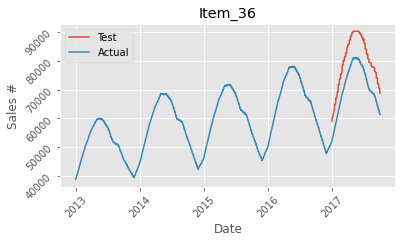

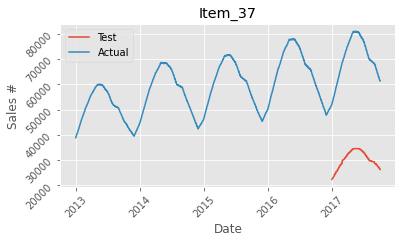

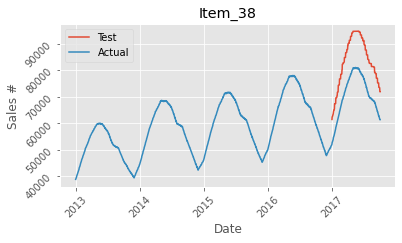

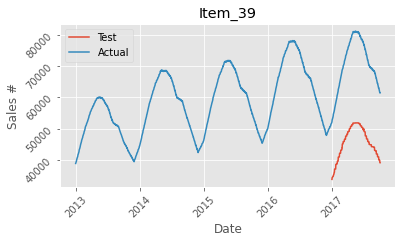

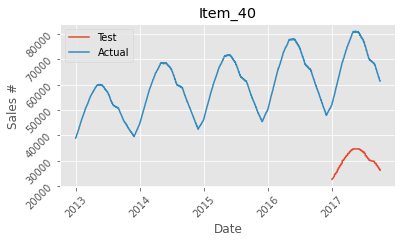

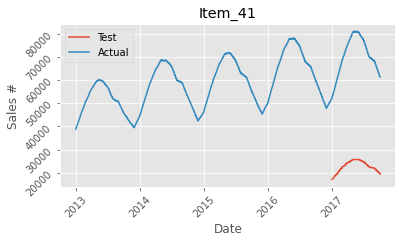

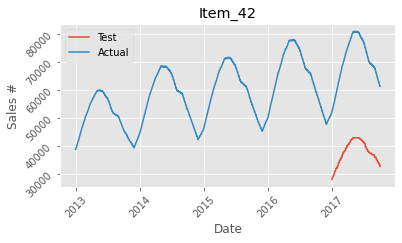

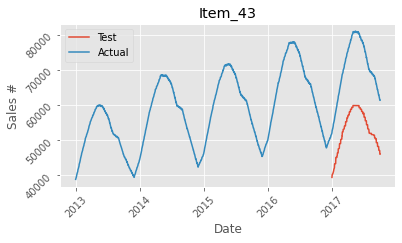

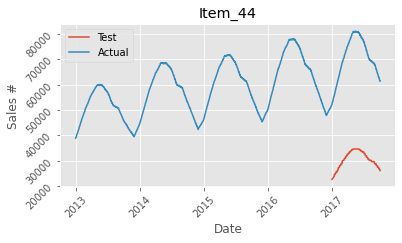

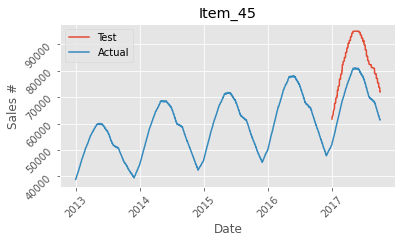

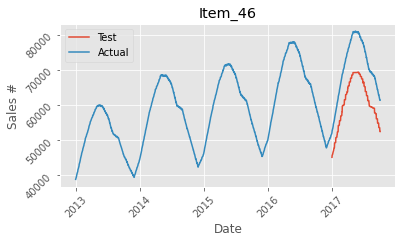

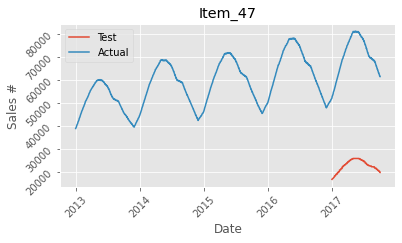

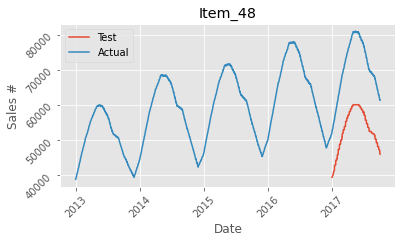

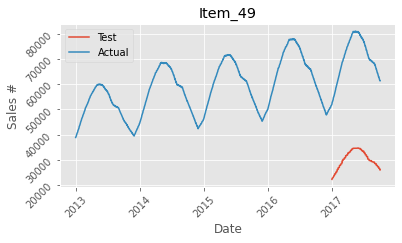

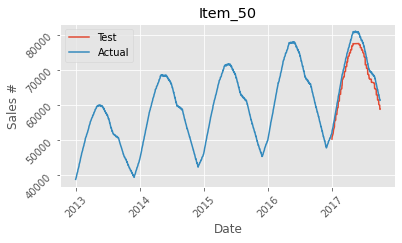

In [18]:
# plotting forecast and actual sales

for k, v in test_forecast_dict_xgb.items():
  forecast = pd.DataFrame(v, index=pd.date_range(start='2017-01-01', end='2017-10-02'))
  plt.figure(figsize=(6,3))
  plt.title(k)
  plt.plot(forecast, label='Test')
  plt.plot(data.sales, label='Actual')
  plt.xlabel('Date', size=12)
  plt.ylabel('Sales #', size=12)
  plt.xticks(rotation=45, size=10)
  plt.yticks(rotation=45, size=10)
  plt.legend(loc='best')
  plt.show()

In [19]:
dfxgb = master_data.copy()

dfxgb = dfxgb.groupby(['item','date']).agg({'sales':'sum'}).reset_index().set_index('date', drop=True)
dfxgb = dfxgb.groupby(['item']).sales.rolling(90).sum().shift(-90).dropna().reset_index()
dfxgb = pd.pivot_table(data=dfxgb, columns ='item', values='sales', index='date', aggfunc='sum')
dfxgb.index.name=None
dfxgb.columns.name=None
dfxgb_column_names = ['Item_'+str(i) for i in dfxgb.columns]
dfxgb.columns = dfxgb_column_names
dfxgb

Item_1   Item_2   Item_3   Item_4   Item_5   Item_6   Item_7  \
2013-01-01  12848.0  34724.0  21472.0  12940.0  10678.0  34380.0  34470.0   
2013-01-02  12936.0  34917.0  21580.0  13041.0  10756.0  34531.0  34674.0   
2013-01-03  13019.0  35113.0  21664.0  13109.0  10800.0  34688.0  34836.0   
2013-01-04  13103.0  35248.0  21783.0  13155.0  10857.0  34831.0  35030.0   
2013-01-05  13153.0  35399.0  21927.0  13220.0  10928.0  35030.0  35207.0   
...             ...      ...      ...      ...      ...      ...      ...   
2017-09-29  20704.0  55278.0  34913.0  20814.0  17453.0  55195.0  55398.0   
2017-09-30  20642.0  55020.0  34763.0  20693.0  17411.0  54955.0  55139.0   
2017-10-01  20578.0  54778.0  34648.0  20635.0  17349.0  54758.0  54985.0   
2017-10-02  20610.0  54886.0  34718.0  20647.0  17377.0  54789.0  55073.0   
2017-12-31  34650.0  21420.0  12884.0  10630.0  34251.0  34349.0  45188.0   

             Item_8   Item_9  Item_10  ...  Item_41  Item_42  Item_43  \
2013-01-01  45320.0  30547.0  42939.0  ...  12960.0  21459.0  30282.0   
2013-01-02  45549.0  30726.0  43159.0  ...  13001.0  21519.0  30442.0   
2013-01-03  45772.0  30882.0  43399.0  ...  13077.0  21619.0  30558.0   
2013-01-04  46030.0  31030.0  43555.0  ...  13140.0  21765.0  30682.0   
2013-01-05  46216.0  31189.0  43774.0  ...  13214.0  21865.0  30868.0   
...             ...      ...      ...  ...      ...      ...      ...   
2017-09-29  73266.0  48114.0  69588.0  ...  20635.0  34633.0  48915.0   
2017-09-30  72910.0  47936.0  69244.0  ...  20543.0  34439.0  48672.0   
2017-10-01  72669.0  47811.0  68947.0  ...  20445.0  34309.0  48472.0   
2017-10-02  72762.0  47920.0  69005.0  ...  20496.0  34371.0  48507.0   
2017-12-31  30415.0  42829.0  40891.0  ...  21400.0  30150.0  17243.0   

            Item_44  Item_45  Item_46  Item_47  Item_48  Item_49  Item_50  
2013-01-01  17293.0  47231.0  34700.0  13015.0  30109.0  17164.0  38874.0  
2013-01-02  17357.0  47482.0  34864.0  13072.0  30226.0  17254.0  39034.0  
2013-01-03  17429.0  47676.0  35004.0  13139.0  30348.0  17329.0  39200.0  
2013-01-04  17481.0  47943.0  35177.0  13183.0  30509.0  17400.0  39378.0  
2013-01-05  17539.0  48184.0  35344.0  13248.0  30629.0  17482.0  39596.0  
...             ...      ...      ...      ...      ...      ...      ...  
2017-09-29  27960.0  76174.0  55856.0  20796.0  48893.0  27502.0  61962.0  
2017-09-30  27833.0  75784.0  55614.0  20731.0  48699.0  27346.0  61687.0  
2017-10-01  27718.0  75504.0  55435.0  20648.0  48587.0  27262.0  61392.0  
2017-10-02  27762.0  75603.0  55565.0  20692.0  48651.0  27275.0  61395.0  
2017-12-31  47070.0  34620.0  12965.0  30037.0  17099.0  38720.0      NaN  

[1737 rows x 50 columns]

In [20]:
# dfxgb - Actual sales (demand)
# test_forecast_dict_xgb_df - Forecast (supply)

# (Forecast - Actual) = (Supply - Demand) > 0 => Rs 10 else Rs 3

results_xgb = (test_forecast_dict_xgb_df - dfxgb).dropna()

# Actual sales = Demand
# Forecast sales = Supply
# When demand > supply = Oppurtunity loss - multiply by Rs 3
# When demand < supply = Retention loss - multiplt by Rs 10

def orloss(x):
  if x > 0:
    x = x*10
    return x
  else:
    x = x*3
    return x

for i in results_xgb.columns:
  results_xgb[i] = results_xgb[i].apply(lambda x: orloss(x))

results_xgb

Item_1   Item_2   Item_3   Item_4   Item_5   Item_6   Item_7  \
2017-01-01 -2049.90 -2925.60 -3213.09  -375.78 -2111.46 -2964.54 -3975.27   
2017-01-02 -1752.96 -1876.65 -2787.78  -157.83 -1655.88 -3716.19 -3492.63   
2017-01-03 -1846.77 -1971.51 -3053.28  -170.70 -1667.85 -3930.63 -3599.07   
2017-01-04 -1927.89 -2731.23 -3195.00  -364.35 -1832.31 -4341.96 -4208.61   
2017-01-05 -1994.91 -3222.87 -3344.64  -324.15 -1854.33 -4460.28 -4188.00   
...             ...      ...      ...      ...      ...      ...      ...   
2017-09-28 -2295.51 -5271.66 -4621.83 -2453.73 -2222.37 -4705.44 -6929.73   
2017-09-29 -2019.51 -4527.66 -4246.83 -2238.69 -2059.50 -4290.33 -6483.12   
2017-09-30 -1833.51 -3753.66 -3796.83 -1875.69 -1933.50 -3570.33 -5781.78   
2017-10-01 -3058.05 -6389.64 -5811.33 -3130.26 -2854.47 -6519.99 -8587.83   
2017-10-02 -3154.05 -7216.02 -6021.33 -3166.26 -2938.47 -7258.50 -9055.65   

              Item_8   Item_9  Item_10  ...  Item_41  Item_42  Item_43  \
2017-01-01  -5208.84 -6457.53 -6282.36  ...  -566.13 -2799.72 -4345.68   
2017-01-02  -6008.07 -5837.61 -5552.58  ...  -804.84 -2507.58 -3608.25   
2017-01-03  -5873.58 -5986.14 -5658.78  ...  -789.39 -2553.72 -3567.39   
2017-01-04  -6455.94 -6233.28 -6486.15  ...  -959.55 -2659.41 -3917.13   
2017-01-05  -6775.44 -6404.49 -6317.19  ... -1083.54 -2705.46 -3814.53   
...              ...      ...      ...  ...      ...      ...      ...   
2017-09-28 -10036.11 -3652.41 -8064.18  ... -2328.24 -3526.83 -6199.35   
2017-09-29  -9088.74 -3134.94 -7233.27  ... -2076.36 -3196.83 -5521.35   
2017-09-30  -8020.74 -2600.94 -6201.27  ... -1800.36 -2614.83 -4792.35   
2017-10-01 -11014.20 -5296.11 -9454.56  ... -2670.45 -4510.44 -7258.08   
2017-10-02 -12541.47 -5623.11 -9756.24  ... -2860.98 -4751.19 -7383.21   

            Item_44   Item_45  Item_46  Item_47  Item_48  Item_49  Item_50  
2017-01-01 -1495.11  -6728.58 -3118.95 -1983.66 -4397.37 -3648.54 -5650.02  
2017-01-02 -1773.84  -6339.81 -2762.07 -2057.04 -5279.73 -3094.14 -4760.46  
2017-01-03 -1747.92  -6636.90 -2766.81 -2045.37 -5480.79 -3233.67 -5197.59  
2017-01-04 -1922.85  -7116.48 -3076.65 -2166.21 -5875.14 -3590.67 -5526.54  
2017-01-05 -1979.49  -7567.65 -3027.60 -2261.67 -6126.78 -3736.47 -5454.54  
...             ...       ...      ...      ...      ...      ...      ...  
2017-09-28 -4220.88  -8637.90 -7525.89 -1851.36 -5585.73 -3083.88 -6424.86  
2017-09-29 -3854.88  -7705.77 -6850.26 -1616.91 -5066.07 -2830.29 -5821.59  
2017-09-30 -3473.88  -6535.77 -6124.26 -1421.91 -4484.07 -2362.29 -4996.59  
2017-10-01 -4820.79 -10456.56 -8827.83 -2393.55 -7481.76 -3800.64 -7659.42  
2017-10-02 -5066.07 -10753.56 -9217.83 -2606.16 -7794.75 -3839.64 -7668.42  

[275 rows x 50 columns]

## **Model 2 - Decision Tree Regressor**

In [22]:
md_dt = md.copy()
md_dt

item    sales  day_of_month  month  year  wk_of_year  quarter  \
date                                                                        
2013-01-01     1  12848.0             1      1  2013           1        1   
2013-01-02     1  12936.0             2      1  2013           1        1   
2013-01-03     1  13019.0             3      1  2013           1        1   
2013-01-04     1  13103.0             4      1  2013           1        1   
2013-01-05     1  13153.0             5      1  2013           1        1   
...          ...      ...           ...    ...   ...         ...      ...   
2017-09-28    50  62200.0            28      9  2017          39        3   
2017-09-29    50  61962.0            29      9  2017          39        3   
2017-09-30    50  61687.0            30      9  2017          39        3   
2017-10-01    50  61392.0             1     10  2017          39        4   
2017-10-02    50  61395.0             2     10  2017          40        4   

            is_month_start  is_month_end  is_quarter_start  is_quarter_end  
date                                                                        
2013-01-01               1             0                 1               0  
2013-01-02               0             0                 0               0  
2013-01-03               0             0                 0               0  
2013-01-04               0             0                 0               0  
2013-01-05               0             0                 0               0  
...                    ...           ...               ...             ...  
2017-09-28               0             0                 0               0  
2017-09-29               0             0                 0               0  
2017-09-30               0             1                 0               1  
2017-10-01               1             0                 1               0  
2017-10-02               0             0                 0               0  

[86849 rows x 11 columns]

#### **Data Structuring**

In [23]:
# dictionary for collecting the test data forecast results
test_forecast_dict_dt = dict()

# dictionary for collecting the evaluation metrics of the test forecast
em_dict_dt = dict()

#### **Model building & forecasting**

In [24]:
# running a for loop with a list of unique items in the dataset as the iterable
for i in list(md_dt['item'].unique()):
 
  # filtering the data item-wise
  split_data_dt = md_dt[md_dt['item']==i].drop(['item'], axis=1)
  #print(split_data)
  
  # Splitting the dataset into dependent and independent variable
  x_dt = split_data_dt.drop(['sales'], axis=1)
  y_dt = split_data_dt['sales']
  #print('Item_'+str(i))
  
  # Splitting data into training and testing sets
  # Here, we are limiting the test data upto 02/10/2017 because item no 50 is missing 90 days of data as a result of
  # rolling(90), shift(-90) and dropna() Hence, extending the prediction upto 31/12/2017 is resulting in a Value Error.
  
  x_train_dt = x_dt.loc[:'2016-12-31']
  x_test_dt = x_dt.loc['2017-01-01':'2017-10-02'] 
  y_train_dt = y_dt.loc[:'2016-12-31']
  y_test_dt = y_dt.loc['2017-01-01':'2017-10-02']

  # Model Building
  # Decision Tree Regression

  # Initializing the model
  dtr_model = DecisionTreeRegressor(max_depth=18)
  
  # Fitting the data to the model
  dtr_model.fit(x_train_dt, y_train_dt)
   
  # computing training score
  train_score_dt = dtr_model.score(x_train_dt, y_train_dt)
  cvs_train_dt = cross_val_score(dtr_model, x_train_dt, y_train_dt, cv=10)

  #print("Training score - {}".format(train_score_dt))
  #print('Mean cv score - ',round(cvs_train_dt.mean(),4),'\n')

  # predicting the test data
  y_pred_dt = dtr_model.predict(x_test_dt)

  # creating key and value for test_forecast dictionary
  k = 'Item_'+str(i) #key
  v = y_pred_dt #value
  
  # adding elements to the dictionary
  test_forecast_dict_dt.update({k:v})

  # Statistics of dataset
  Mean = round(split_data_dt['sales'].mean(),4)
  Std_dev = round(split_data_dt['sales'].std(),4)

  # Performance Evaluation Metrics
  r2_dt = r2_score(y_test_dt, y_pred_dt)
  mse_dt = mean_squared_error(y_test_dt, y_pred_dt)
  rmse_dt = np.sqrt(mse_dt)
  mae_dt = mean_absolute_error(y_test_dt, y_pred_dt)
  mape_dt = mean_absolute_percentage_error(y_test_dt, y_pred_dt)

  # creating a key and value for test_forecast evaluation metrics dictionary
  key_dt = 'Item_'+str(i)
  value_dt = {'r2':r2_dt, 'MSE':mse_dt, 'RMSE':rmse_dt, 'MAE':mae_dt, 'MAPE':mape_dt}
  em_dict_dt.update({key_dt:value_dt})

In [25]:
max_depth = dict()
for i in range(1,22):
  dtr_hpt = DecisionTreeRegressor(max_depth=i)
  hypt_model = dtr_hpt.fit(x_train_dt, y_train_dt)
  train_score = hypt_model.score(x_train_dt, y_train_dt)
  #test_score = hypt_model.score(x_train_dt, y_train_dt)
  k = 'Depth_'+str(i)
  #v = [train_score, test_score]
  v = [train_score]
  max_depth.update({k:v})

max_depth = pd.DataFrame(max_depth)
max_depth = max_depth.transpose()
max_depth.index
#max_depth.columns=['Train', 'Test']
max_depth.columns=['Train']
max_depth

Train
Depth_1   0.356567
Depth_2   0.572244
Depth_3   0.769198
Depth_4   0.877455
Depth_5   0.943708
Depth_6   0.975906
Depth_7   0.988492
Depth_8   0.995158
Depth_9   0.998352
Depth_10  0.999486
Depth_11  0.999796
Depth_12  0.999932
Depth_13  0.999969
Depth_14  0.999984
Depth_15  0.999992
Depth_16  0.999997
Depth_17  0.999999
Depth_18  0.999999
Depth_19  1.000000
Depth_20  1.000000
Depth_21  1.000000

In [26]:
# inspecting the model
dtr_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 18,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [27]:
# creating a dataframe out of dictionary that stored the forecast of the test data
# multiindex can be solved by resetting the index and assigning it back

test_forecast_dict_dt_df = pd.DataFrame(test_forecast_dict_dt, index=[pd.date_range(start='2017-01-01', end='2017-10-02')])
test_forecast_dict_dt_df = test_forecast_dict_dt_df.reset_index()

In [28]:
test_forecast_dict_dt_df = test_forecast_dict_dt_df.set_index('level_0', drop=True)

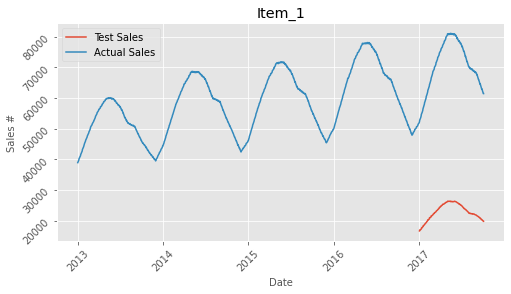

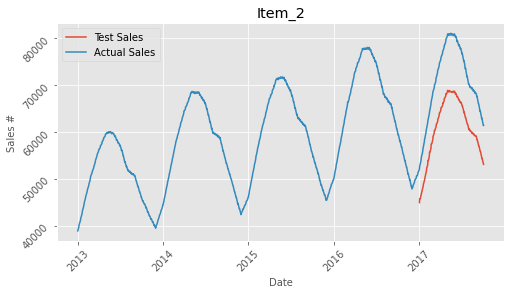

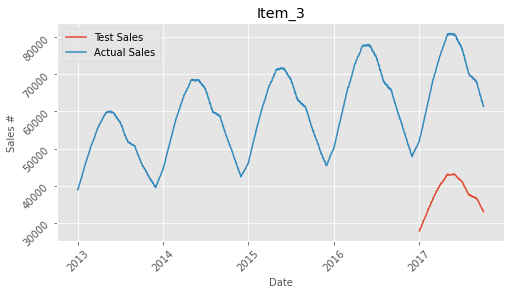

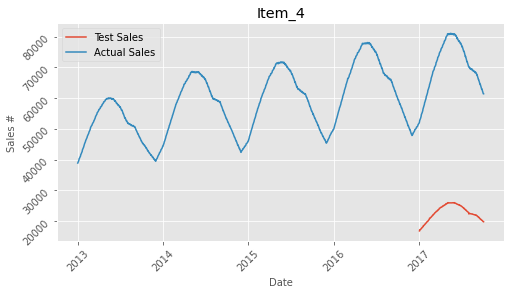

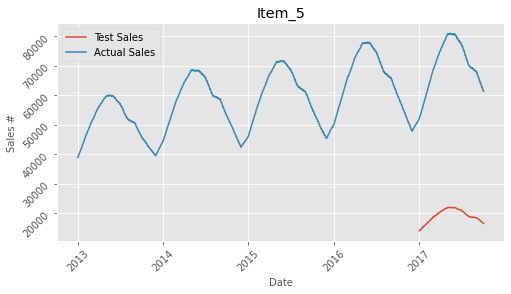

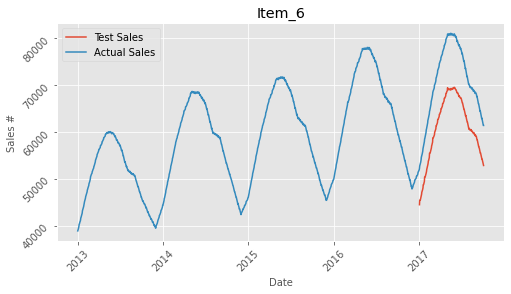

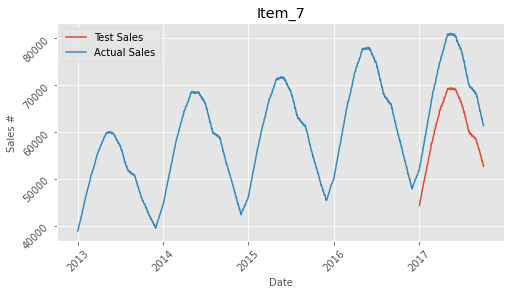

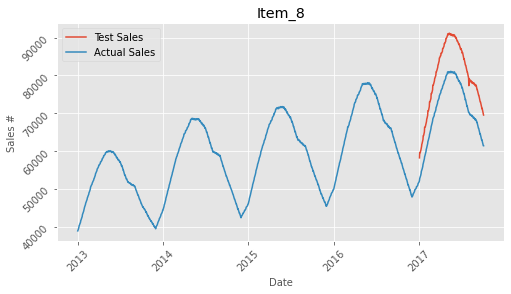

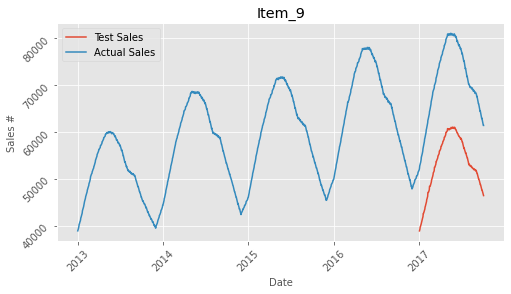

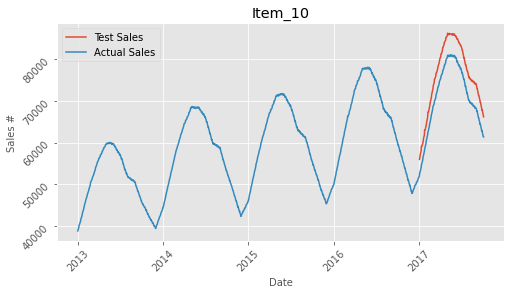

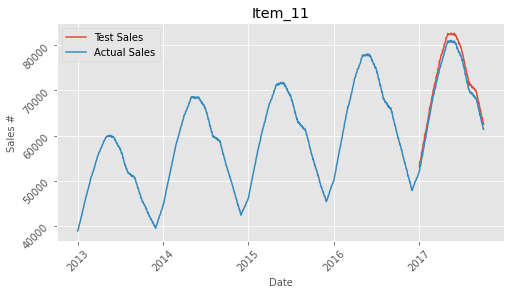

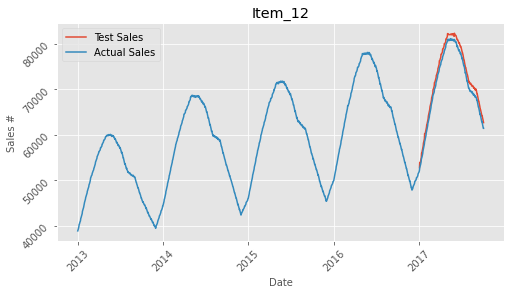

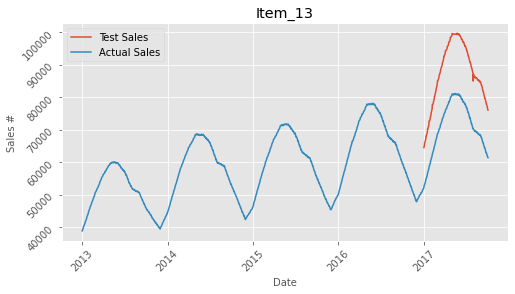

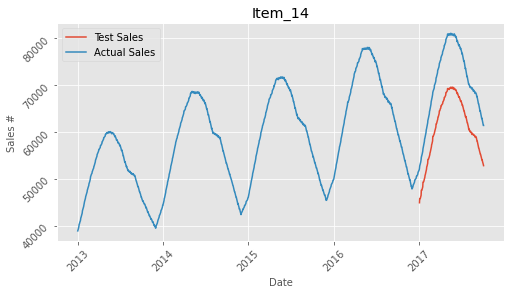

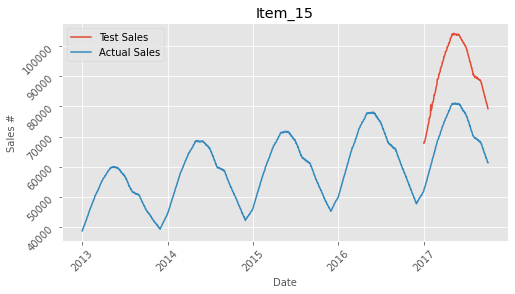

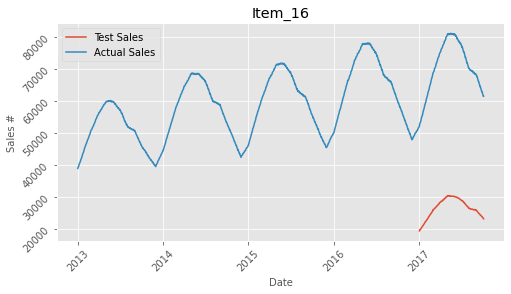

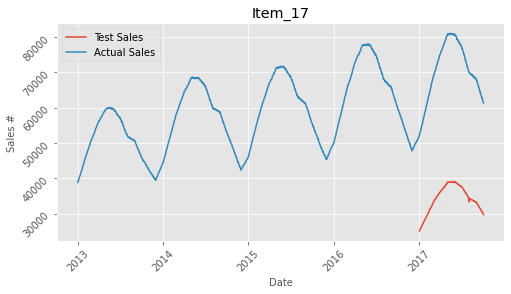

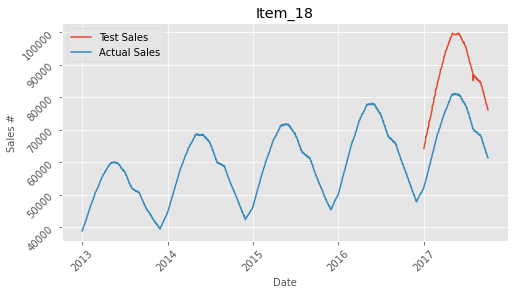

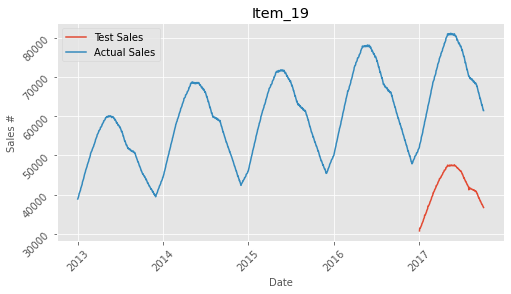

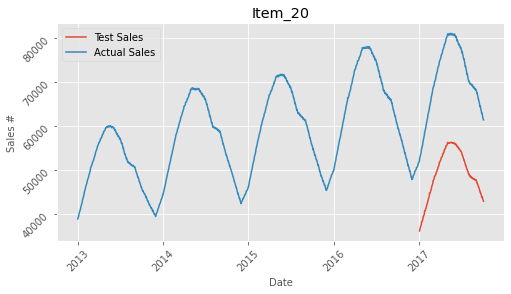

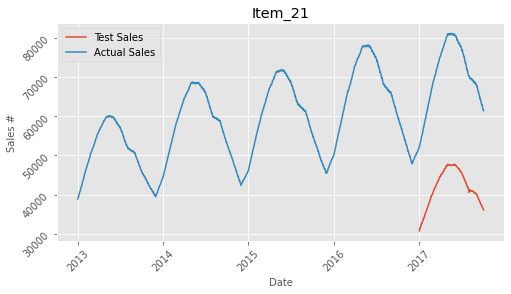

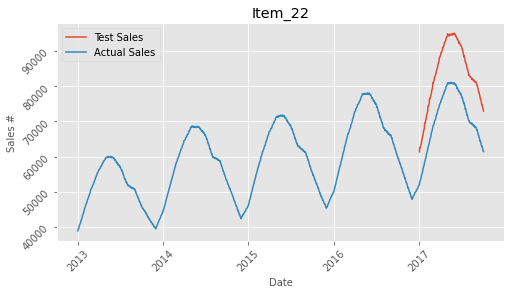

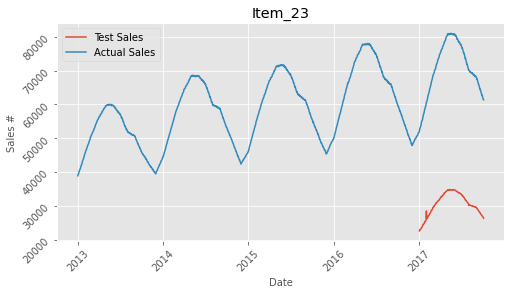

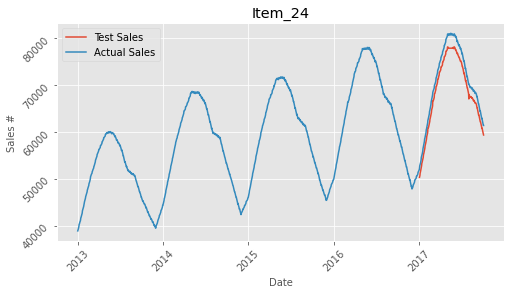

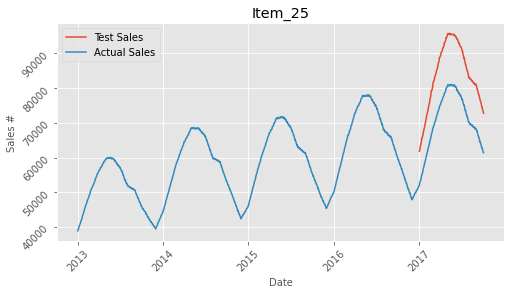

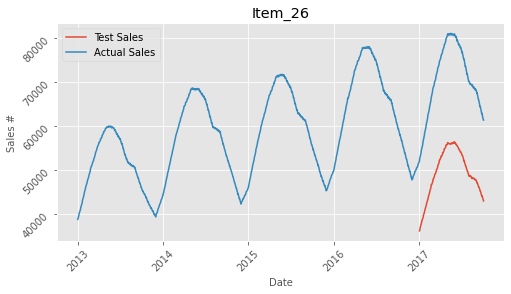

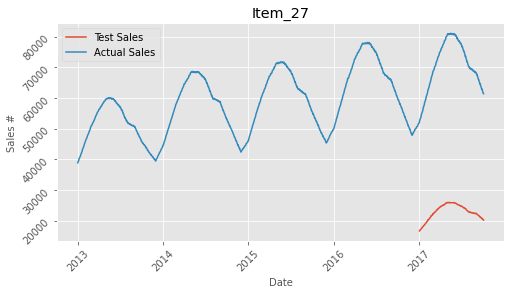

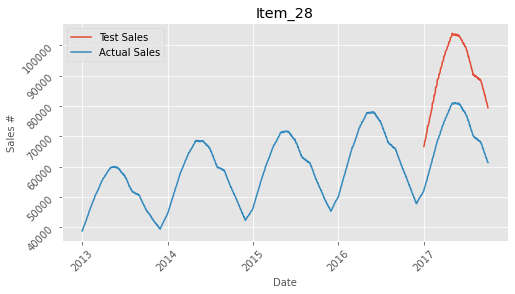

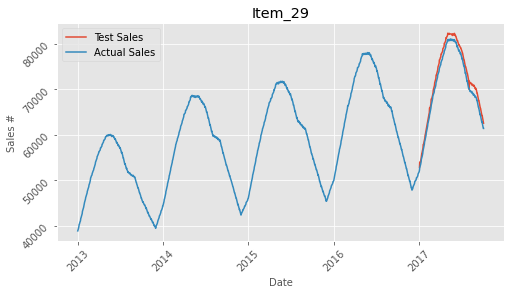

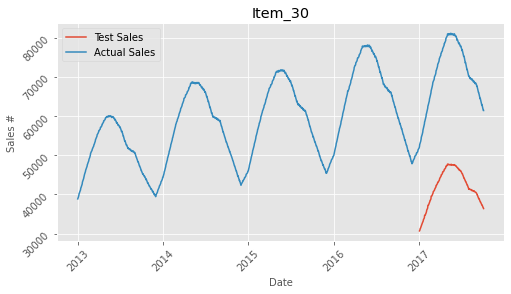

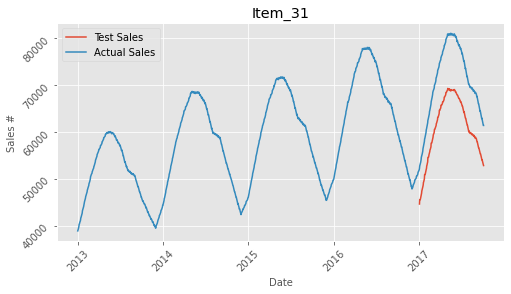

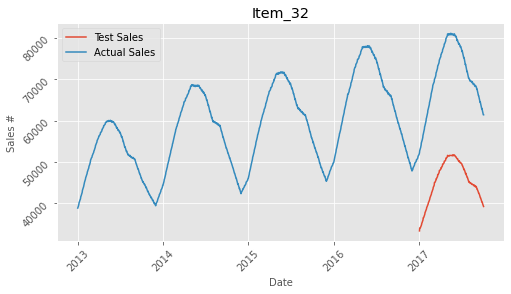

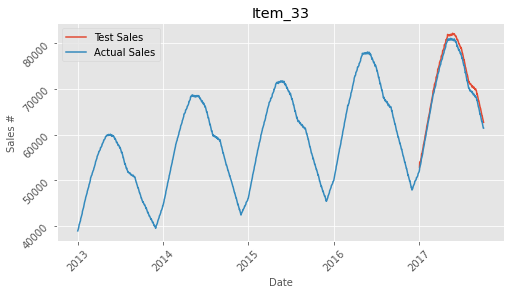

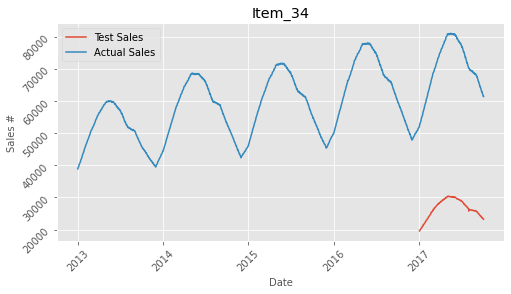

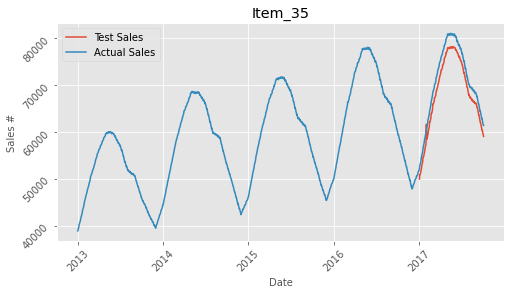

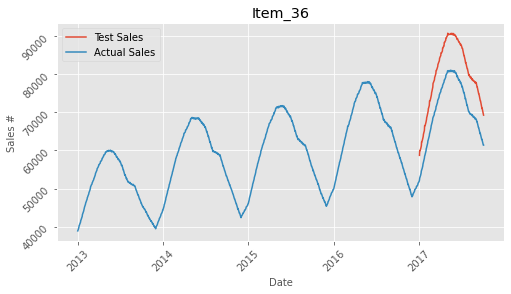

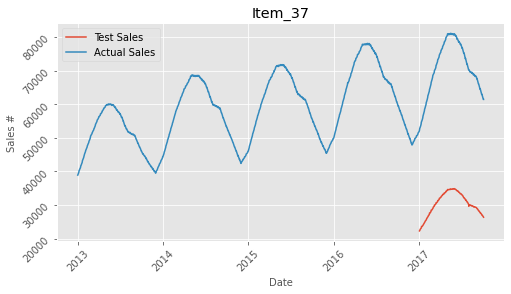

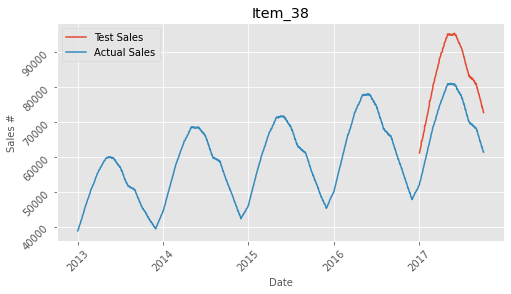

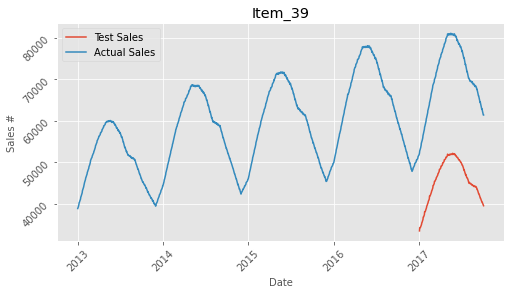

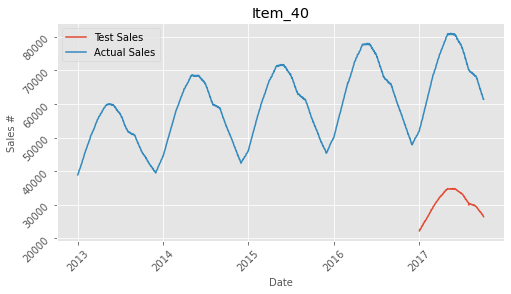

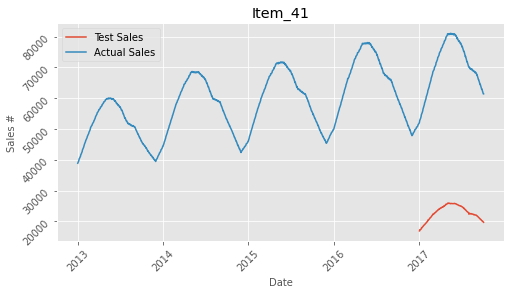

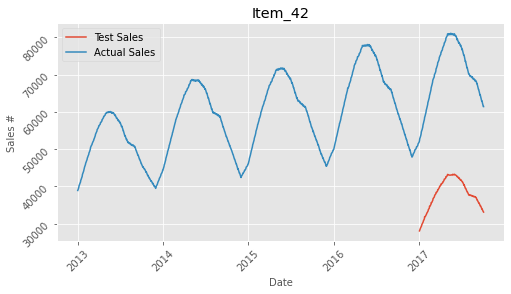

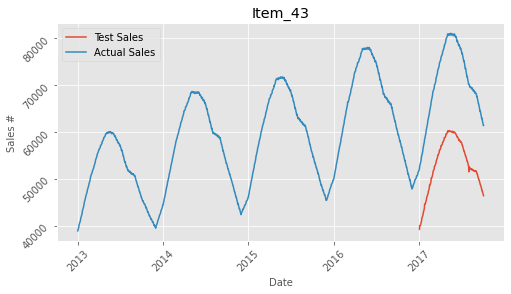

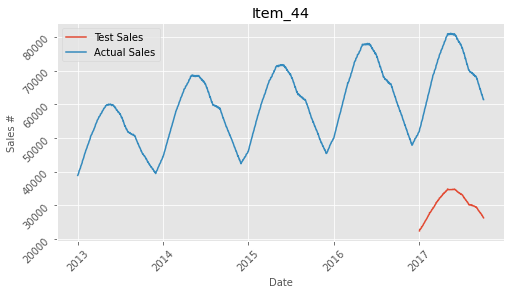

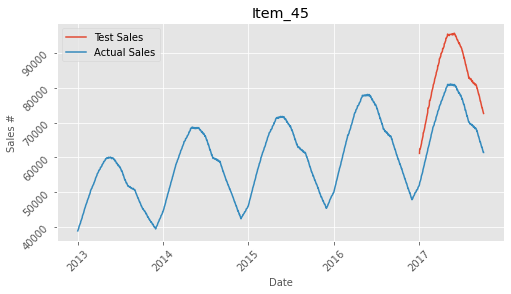

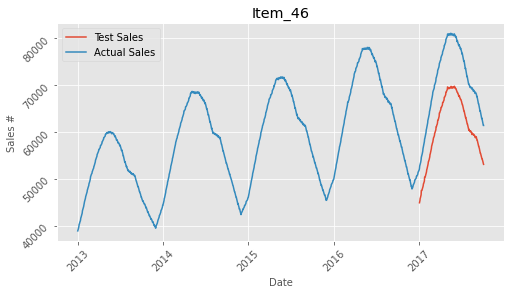

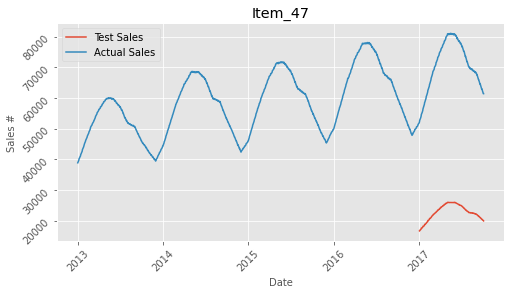

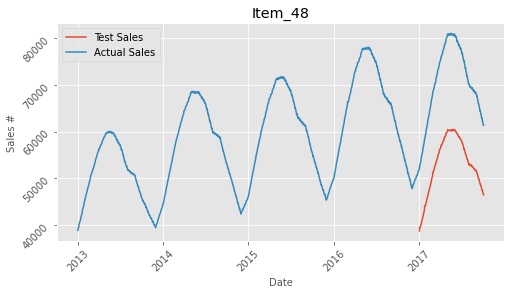

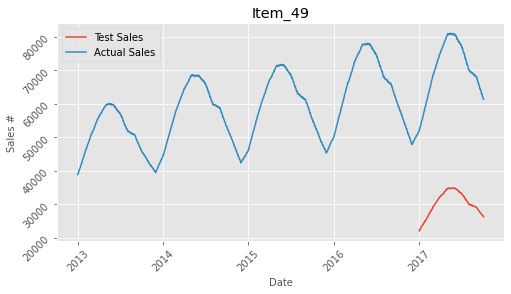

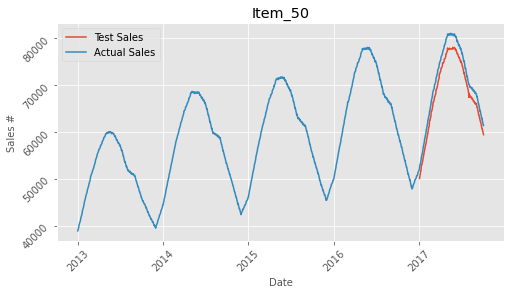

In [29]:
# Data Visualization - Actual & Test sales

for k,v in test_forecast_dict_dt.items():
  plotdf_dt = pd.DataFrame(v, index=pd.date_range(start='2017-01-01', end='2017-10-02'))
  plt.figure(figsize=(8,4))
  plt.title('{}'.format(k))
  plt.plot(plotdf_dt, label='Test Sales')
  plt.plot(split_data_dt.sales, label='Actual Sales')
  plt.xlabel('Date', size=10)
  plt.ylabel('Sales #', size=10)
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  plt.legend(loc='best')
  plt.show()

In [30]:
# creating a dataframe out of the dictionary that stored the performance metrics of the test forecast

em_dict_dt_df = pd.DataFrame(em_dict_dt)
em_dict_dt_df

Item_1        Item_2        Item_3         Item_4         Item_5  \
r2         0.902947  8.766075e-01  8.479983e-01       0.909235       0.905229   
MSE   656643.995455  5.791164e+06  2.761753e+06  616927.805257  424683.199697   
RMSE     810.335730  2.406484e+03  1.661852e+03     785.447519     651.677220   
MAE      788.669091  2.349345e+03  1.646185e+03     759.203758     648.096364   
MAPE       0.033716  3.683986e-02  4.159699e-02       0.031794       0.033107   

            Item_6        Item_7        Item_8        Item_9       Item_10  \
r2    9.094310e-01  8.994260e-01  8.600986e-01  8.839862e-01  8.510585e-01   
MSE   4.177830e+06  4.732717e+06  1.120539e+07  3.850949e+06  1.033986e+07   
RMSE  2.043974e+03  2.175481e+03  3.347446e+03  1.962383e+03  3.215565e+03   
MAE   1.995305e+03  2.149385e+03  3.320126e+03  1.908415e+03  3.192480e+03   
MAPE  3.189979e-02  3.416710e-02  3.998310e-02  3.524087e-02  4.045857e-02   

      ...        Item_41       Item_42       Item_43       Item_44  \
r2    ...       0.869320  8.961855e-01  8.477919e-01  8.834009e-01   
MSE   ...  940219.583955  1.797237e+06  5.320205e+06  1.374800e+06   
RMSE  ...     969.649207  1.340611e+03  2.306557e+03  1.172519e+03   
MAE   ...     916.960909  1.326011e+03  2.271261e+03  1.157930e+03   
MAPE  ...       0.037618  3.375947e-02  4.073825e-02  3.666340e-02   

           Item_45       Item_46       Item_47       Item_48       Item_49  \
r2    8.645140e-01  9.006585e-01  8.529620e-01  8.510856e-01  8.411280e-01   
MSE   1.197305e+07  4.735432e+06  1.026363e+06  4.980306e+06  1.851571e+06   
RMSE  3.460209e+03  2.176105e+03  1.013096e+03  2.231660e+03  1.360725e+03   
MAE   3.444876e+03  2.147036e+03  9.733309e+02  2.210701e+03  1.351273e+03   
MAPE  3.976806e-02  3.406041e-02  4.069577e-02  4.041689e-02  4.325947e-02   

           Item_50  
r2    8.985107e-01  
MSE   6.126462e+06  
RMSE  2.475169e+03  
MAE   2.445605e+03  
MAPE  3.449399e-02  

[5 rows x 50 columns]

In [31]:
df_dt = master_data.copy()
df_dt = df_dt.groupby(['item','date']).agg({'sales':'sum'}).reset_index().set_index('date', drop=True)
df_dt = df_dt.groupby('item').sales.rolling(90).sum().shift(-90).dropna().reset_index()
df_dt = pd.pivot_table(data=df_dt, values='sales', columns='item', index='date', aggfunc='sum')
df_dt.index.name=None
df_dt.columns.name=None
df_dt_columns_names = ['Item_'+str(i) for i in df_dt.columns]
df_dt.columns = df_dt_columns_names
df_dt.head()

Item_1   Item_2   Item_3   Item_4   Item_5   Item_6   Item_7  \
2013-01-01  12848.0  34724.0  21472.0  12940.0  10678.0  34380.0  34470.0   
2013-01-02  12936.0  34917.0  21580.0  13041.0  10756.0  34531.0  34674.0   
2013-01-03  13019.0  35113.0  21664.0  13109.0  10800.0  34688.0  34836.0   
2013-01-04  13103.0  35248.0  21783.0  13155.0  10857.0  34831.0  35030.0   
2013-01-05  13153.0  35399.0  21927.0  13220.0  10928.0  35030.0  35207.0   

             Item_8   Item_9  Item_10  ...  Item_41  Item_42  Item_43  \
2013-01-01  45320.0  30547.0  42939.0  ...  12960.0  21459.0  30282.0   
2013-01-02  45549.0  30726.0  43159.0  ...  13001.0  21519.0  30442.0   
2013-01-03  45772.0  30882.0  43399.0  ...  13077.0  21619.0  30558.0   
2013-01-04  46030.0  31030.0  43555.0  ...  13140.0  21765.0  30682.0   
2013-01-05  46216.0  31189.0  43774.0  ...  13214.0  21865.0  30868.0   

            Item_44  Item_45  Item_46  Item_47  Item_48  Item_49  Item_50  
2013-01-01  17293.0  47231.0  34700.0  13015.0  30109.0  17164.0  38874.0  
2013-01-02  17357.0  47482.0  34864.0  13072.0  30226.0  17254.0  39034.0  
2013-01-03  17429.0  47676.0  35004.0  13139.0  30348.0  17329.0  39200.0  
2013-01-04  17481.0  47943.0  35177.0  13183.0  30509.0  17400.0  39378.0  
2013-01-05  17539.0  48184.0  35344.0  13248.0  30629.0  17482.0  39596.0  

[5 rows x 50 columns]

In [32]:
results_dt = (test_forecast_dict_dt_df - df_dt.loc['2017-01-01':'2017-10-02']).dropna()
results_dt.index.name=None

def orlossdt(x):
  if x > 0:
    x = x*10
    return x
  else:
    x = x*3
    return x

for i in results_dt.columns:
  results_dt[i] = results_dt[i].apply(lambda x: orlossdt(x))

results_dt

Item_1  Item_2  Item_3  Item_4  Item_5  Item_6  Item_7  Item_8  \
2017-01-01 -2274.0 -3576.0 -3732.0  -951.0 -2379.0 -5727.0 -5556.0 -8178.0   
2017-01-02 -1812.0 -2529.0 -3024.0  -276.0 -1728.0 -4365.0 -5949.0 -6030.0   
2017-01-03 -1977.0 -2985.0 -3471.0  -456.0 -1887.0 -4755.0 -5718.0 -6549.0   
2017-01-04 -2190.0 -3834.0 -3813.0  -684.0 -2118.0 -5370.0 -4824.0 -7554.0   
2017-01-05 -2280.0 -4203.0 -3936.0  -621.0 -2187.0 -5538.0 -4977.0 -7758.0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2017-09-28 -2343.0 -4707.0 -4761.0 -2499.0 -2211.0 -4944.0 -6153.0 -8769.0   
2017-09-29 -2337.0 -4758.0 -4791.0 -2589.0 -2178.0 -4953.0 -6321.0 -8763.0   
2017-09-30 -2439.0 -4662.0 -4752.0 -2439.0 -2322.0 -4929.0 -6333.0 -8475.0   
2017-10-01 -2250.0 -4563.0 -4806.0 -2454.0 -2361.0 -5055.0 -6507.0 -8703.0   
2017-10-02 -2547.0 -5424.0 -5220.0 -2577.0 -2634.0 -5817.0 -7278.0 -9720.0   

            Item_9  Item_10  ...  Item_41  Item_42  Item_43  Item_44  Item_45  \
2017-01-01 -7596.0  -7251.0  ...  -1416.0  -3243.0  -5025.0  -2133.0  -8565.0   
2017-01-02 -8139.0  -8148.0  ...   -828.0  -3597.0  -3978.0  -1419.0  -6735.0   
2017-01-03 -8034.0  -7959.0  ...   -990.0  -3309.0  -4341.0  -1539.0  -7362.0   
2017-01-04 -7170.0  -7308.0  ...  -1290.0  -2913.0  -4812.0  -2028.0  -8265.0   
2017-01-05 -7308.0  -7365.0  ...  -1365.0  -3009.0  -4935.0  -2061.0  -8637.0   
...            ...      ...  ...      ...      ...      ...      ...      ...   
2017-09-28 -3378.0  -7638.0  ...  -2049.0  -3450.0  -6081.0  -3936.0  -8700.0   
2017-09-29 -3405.0  -7710.0  ...  -2058.0  -3630.0  -6102.0  -4050.0  -8349.0   
2017-09-30 -3432.0  -7473.0  ...  -2133.0  -3483.0  -5862.0  -4050.0  -8043.0   
2017-10-01 -3543.0  -7335.0  ...  -2049.0  -3429.0  -5751.0  -3867.0  -7941.0   
2017-10-02 -4518.0  -8406.0  ...  -2391.0  -3879.0  -6336.0  -4410.0  -9003.0   

            Item_46  Item_47  Item_48  Item_49  Item_50  
2017-01-01  -3939.0  -2370.0  -6507.0  -4326.0  -6519.0  
2017-01-02  -4554.0  -2736.0  -5499.0  -3564.0  -7158.0  
2017-01-03  -4206.0  -2595.0  -5910.0  -3795.0  -7056.0  
2017-01-04  -3360.0  -2304.0  -6681.0  -4152.0  -6294.0  
2017-01-05  -3423.0  -2391.0  -6780.0  -4194.0  -6255.0  
...             ...      ...      ...      ...      ...  
2017-09-28  -6690.0  -1815.0  -5688.0  -2919.0  -5721.0  
2017-09-29  -6453.0  -1725.0  -5646.0  -2898.0  -5877.0  
2017-09-30  -6507.0  -1872.0  -5772.0  -2730.0  -5652.0  
2017-10-01  -6495.0  -1734.0  -5901.0  -2694.0  -5319.0  
2017-10-02  -7428.0  -2202.0  -6555.0  -3075.0  -5904.0  

[275 rows x 50 columns]

In [33]:
# future forecast

## **Model 3 - Holt Winter's**

### **Approach 1** - *resampling by month*

In [34]:
# importing the data, parsing the date column and setting it as the index

df = master_data.copy()
df

item  sales
date                   
2013-01-01     1     13
2013-01-02     1     11
2013-01-03     1     14
2013-01-04     1     13
2013-01-05     1     10
...          ...    ...
2017-12-27    50     63
2017-12-28    50     59
2017-12-29    50     74
2017-12-30    50     62
2017-12-31    50     82

[913000 rows x 2 columns]

#### **Data Exploration**

In [35]:
df.head()

item  sales
date                   
2013-01-01     1     13
2013-01-02     1     11
2013-01-03     1     14
2013-01-04     1     13
2013-01-05     1     10

In [36]:
# total number of items in the dataset
df.item.nunique()

50

In [37]:
# total number of unique dates
df.index.value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: date, Length: 1826, dtype: int64

#### **Data structuring**

In [38]:
# creating dictionaries for storing the forecast values and performance mmetrics

test_forecast_dict = dict()
future_forecast_dict = dict()
test_em_dict = dict()

#### **Model building & Forecasting**

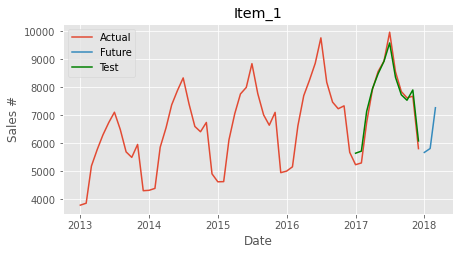

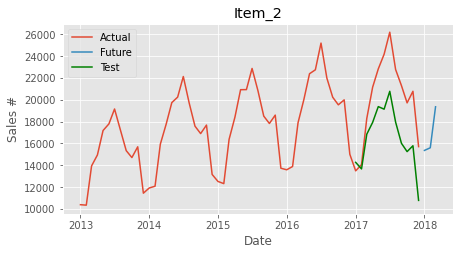

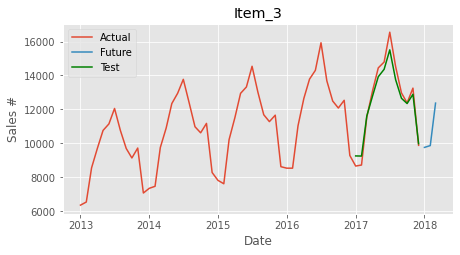

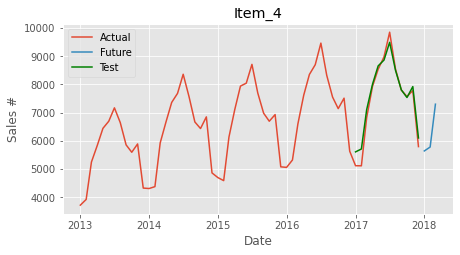

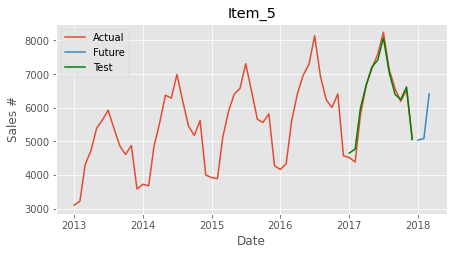

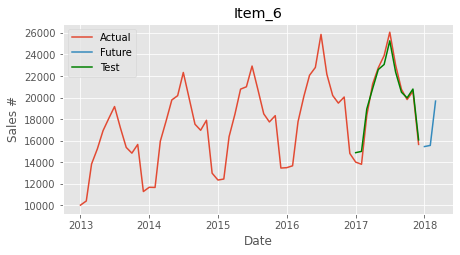

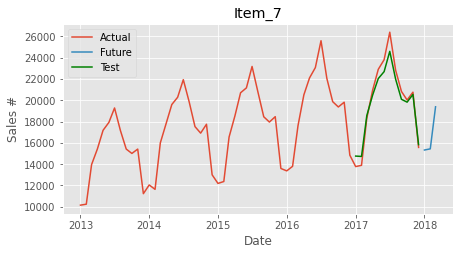

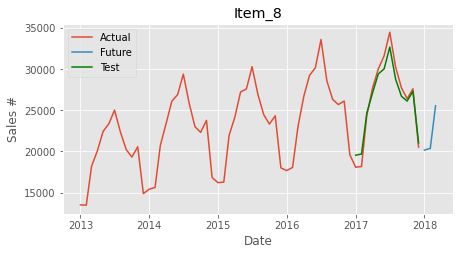

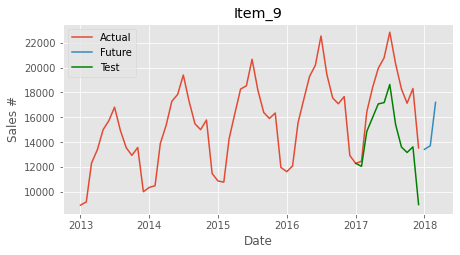

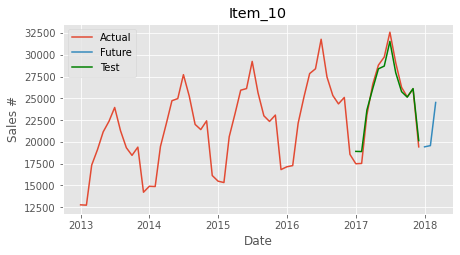

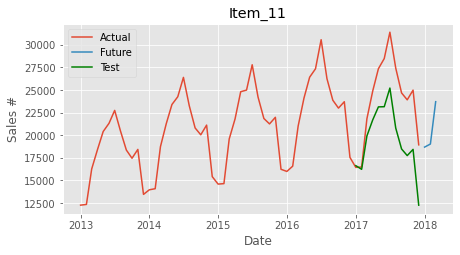

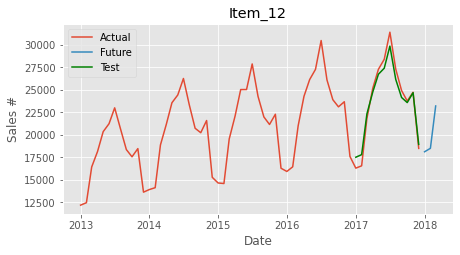

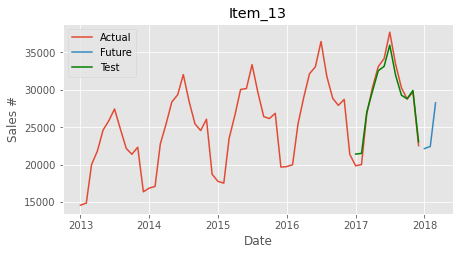

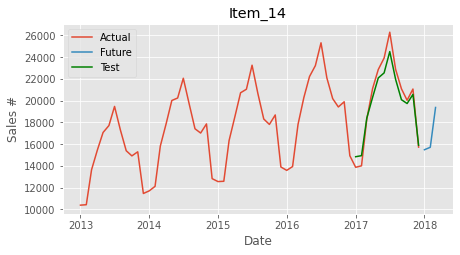

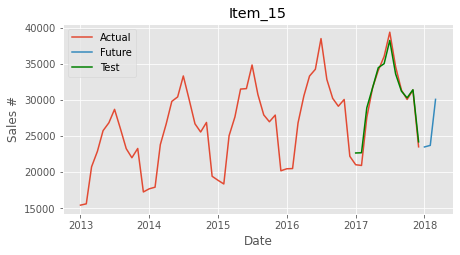

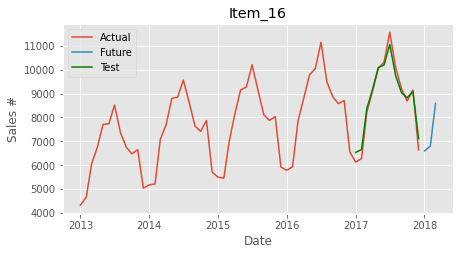

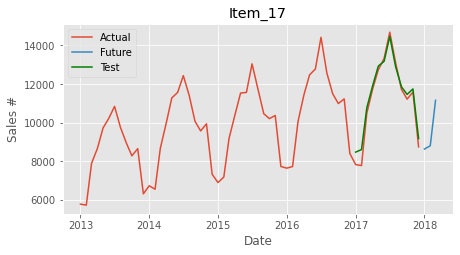

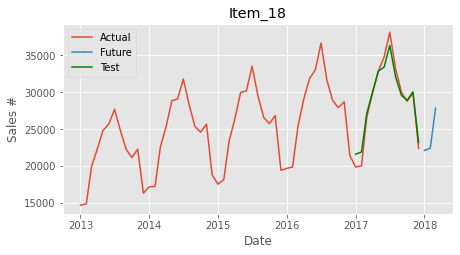

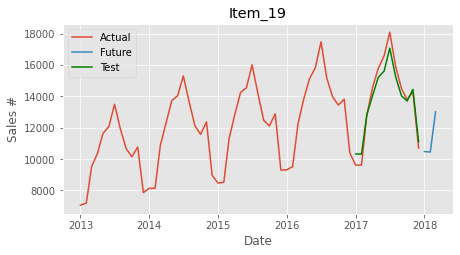

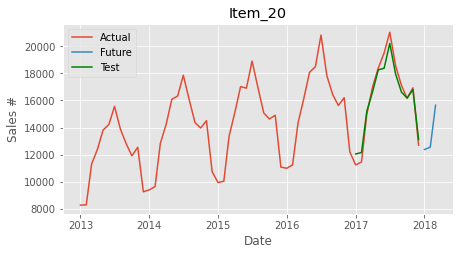

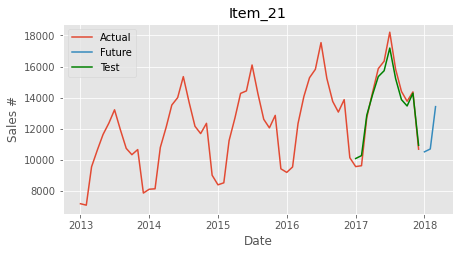

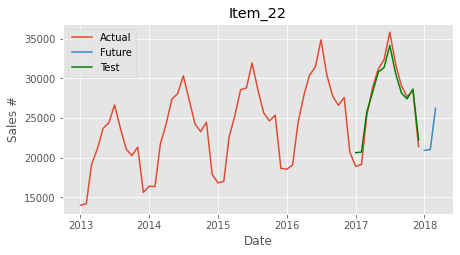

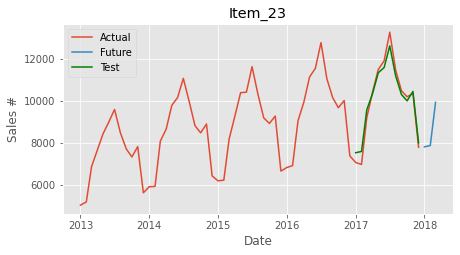

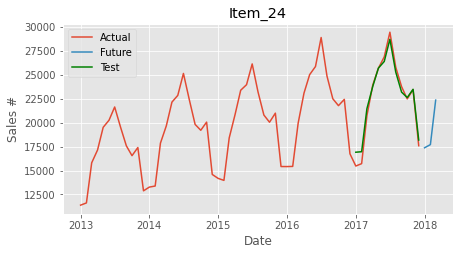

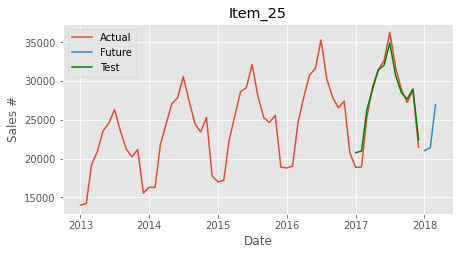

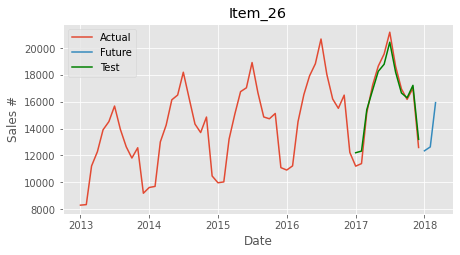

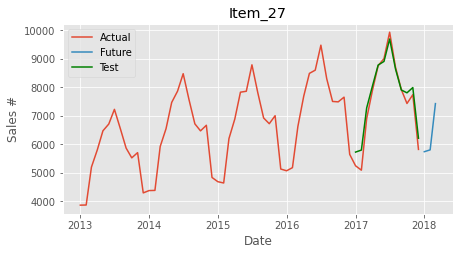

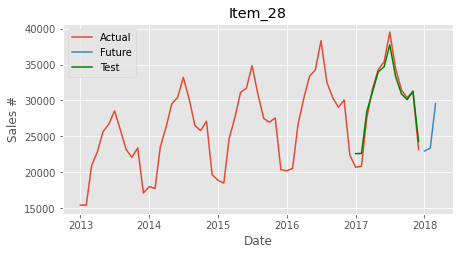

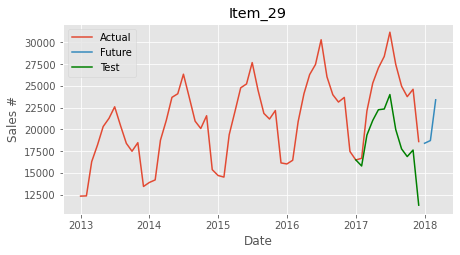

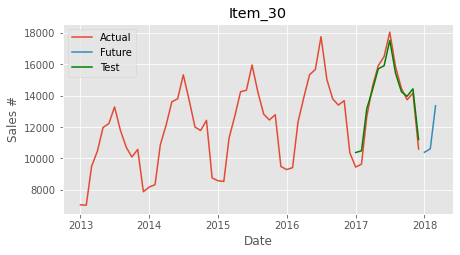

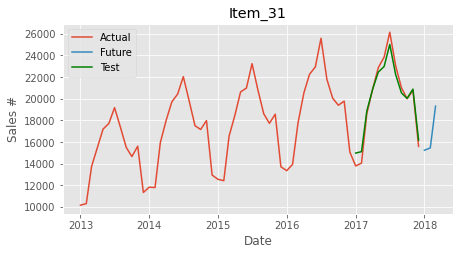

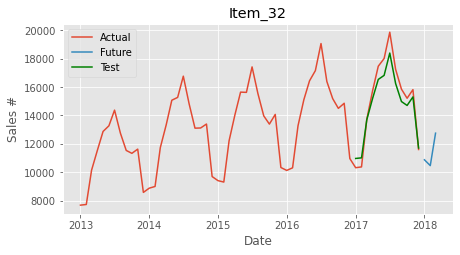

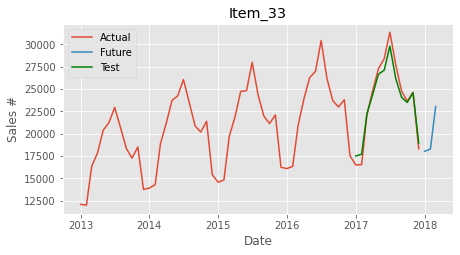

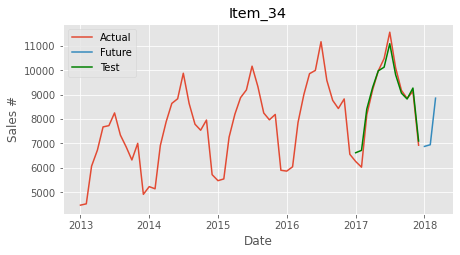

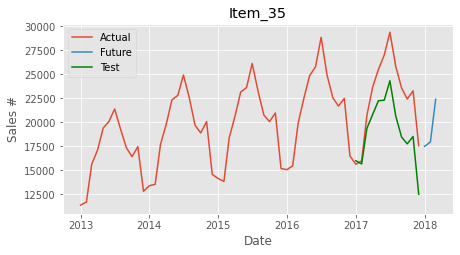

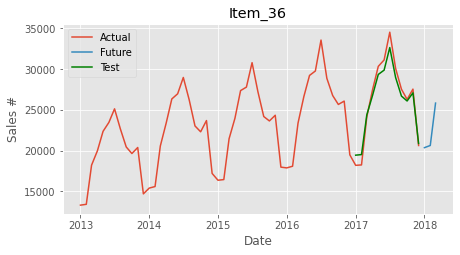

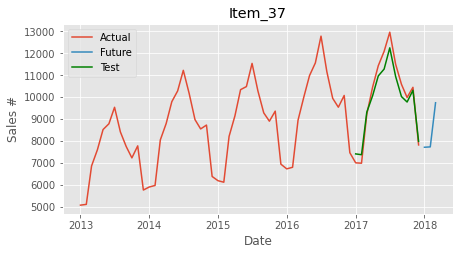

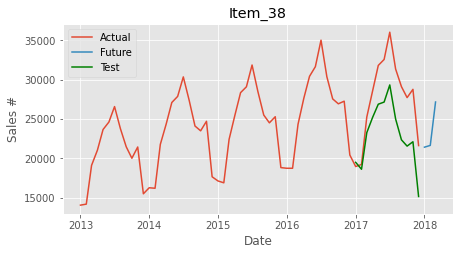

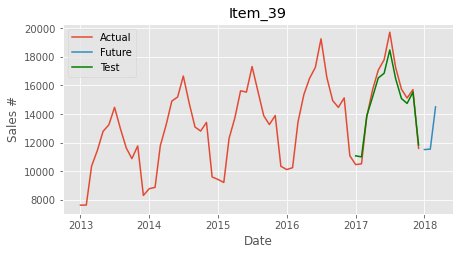

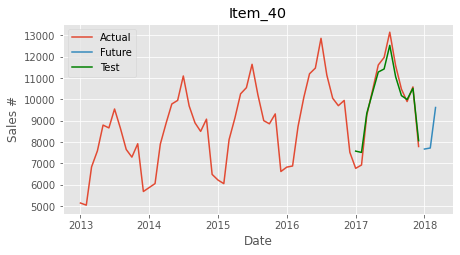

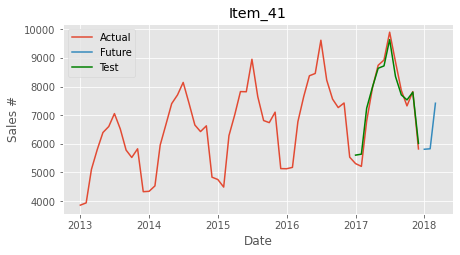

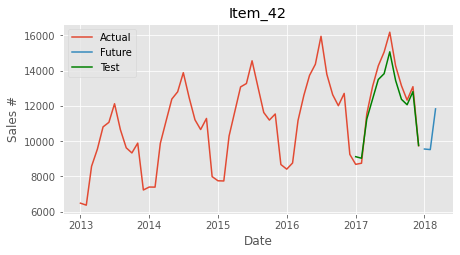

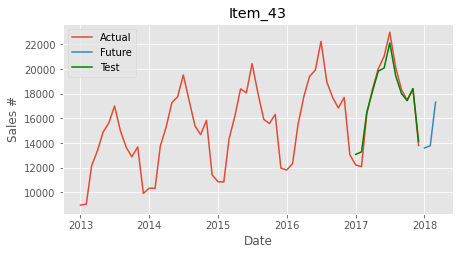

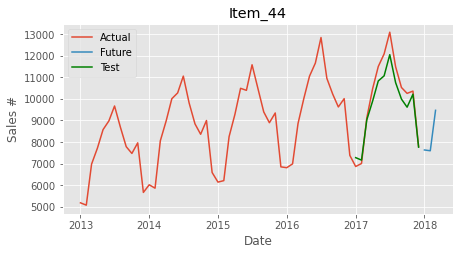

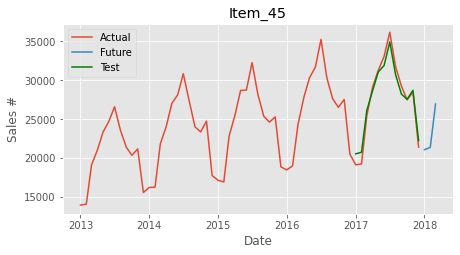

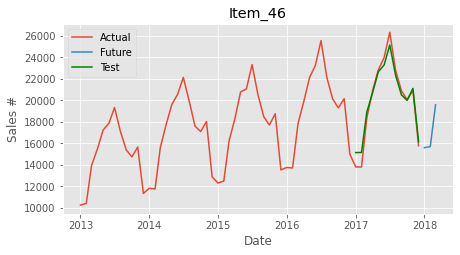

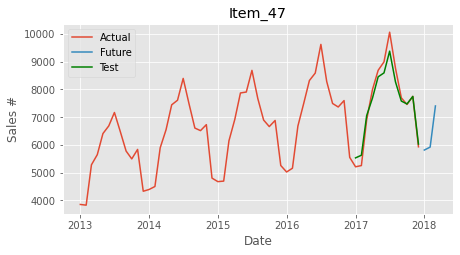

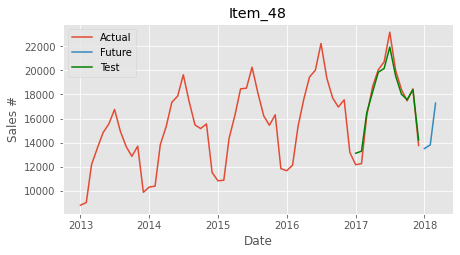

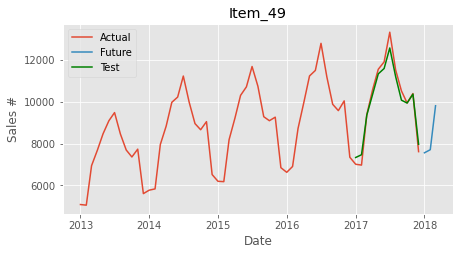

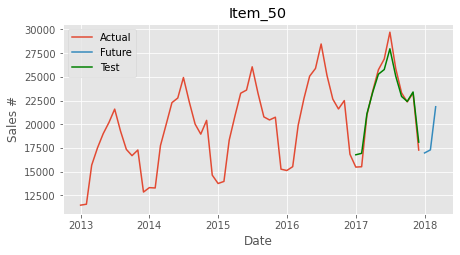

In [39]:
# list of items in the dataset
item_list = list(df['item'].unique())

for i in item_list:

  # Filtering the dataset by items
  a = df[df['item']==i]

  # Data Wrangling
  a = a.groupby(['item','date']).agg({'sales':'sum'}).reset_index()
  a = a.set_index('date', drop=True)
  a = a.groupby(['item']).sales.resample('MS').sum().reset_index().set_index('date', drop=True)
  #a = a.groupby(['item']).sales.rolling(3).sum().shift(-3).dropna().reset_index()
  #a = a.set_index('date', drop=True)
  a = a.drop('item', axis=1)
  #print(a)
      
  #Splitting the data into training and testing sets
  train = a.loc[:'2016-12-31']
  test = a.loc['2017-01-01':]

    
  # Statistics
  mean = round(a['sales'].mean(),4)
  stddev = round(a['sales'].std(),4)

  # Holt Winters Model
  # Predicting the test dataset values
  hwdf_model_test = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
  hwdf_test_pred = hwdf_model_test.forecast(12)
  key_t = 'Item_'+str(i)
  value_t = hwdf_test_pred
  test_forecast_dict.update({key_t:value_t})
  
  #print('Mean -', round(mean,4))
  #print('Std -', round(stddev,4))

  # Evaluation Metrics
  r2 = round(r2_score(test, hwdf_test_pred),4).astype(float)
  mse = round(mean_squared_error(test, hwdf_test_pred),4).astype(float)
  rmse = round(np.sqrt(mse),4).astype(float)
  mae = round(mean_absolute_error(test, hwdf_test_pred),4).astype(float)
  mape = round(mean_absolute_percentage_error(test, hwdf_test_pred),4).astype(float)

  # creating a dictionary for test_forecast evaluation metrics

  key_em = 'Item_'+str(i)
  value_em = {'r2':r2, 'MSE':mse, 'RMSE':rmse, 'MAE':mae, 'MAPE':mape}
  test_em_dict.update({key_em:value_em})

  # Forecasting Future Demand
  hwdf_model_future = ExponentialSmoothing(a, trend='add', seasonal='add', seasonal_periods=12).fit()

  # Forecasting for the next 12 months
  hwdf_model_future_pred = hwdf_model_future.forecast(3) # Rounding up because demand is expressed better as a whole number
  #print(hwdf_model_future_pred,'\n')
  
  # creating a dictionary for forecasting the future demand

  key_f = 'Item_'+str(i)
  value_f = hwdf_model_future_pred
  future_forecast_dict.update({key_f:value_f})

  # Data Visualization
  plt.figure(figsize=(7,3.5))
  plt.title('Item_'+str(i))
  plt.plot(a, label='Actual')                       # actual sales
  plt.plot(hwdf_model_future_pred, label='Future')  # future forecast
  plt.plot(hwdf_test_pred, label='Test', color='green')            # test forecast
  plt.xlabel('Date')
  plt.ylabel('Sales #')
  plt.legend(loc='best')
  plt.show()

In [40]:
# Test data forecasting

test_forecast_dict = pd.DataFrame(test_forecast_dict)
test_forecast_dict

Item_1        Item_2        Item_3       Item_4       Item_5  \
2017-01-01  5645.388175  14262.100807   9249.538137  5605.029601  4652.468071   
2017-02-01  5720.000740  13660.550308   9241.741776  5707.330313  4768.734165   
2017-03-01  7136.803057  16843.773438  11602.461903  7100.218933  5978.201387   
2017-04-01  7950.988441  17923.273036  12801.273546  8001.665974  6681.022722   
2017-05-01  8481.578927  19370.573359  13923.196382  8650.498487  7206.451810   
2017-06-01  8923.599127  19136.499743  14359.577089  8857.422590  7411.986840   
2017-07-01  9575.367444  20773.977629  15508.846347  9485.798466  8073.579768   
2017-08-01  8353.599780  17949.038713  13752.020538  8496.966794  7039.742236   
2017-09-01  7728.034833  16005.621039  12651.677432  7801.255184  6392.571933   
2017-10-01  7534.381589  15246.322183  12340.832208  7531.314388  6244.516202   
2017-11-01  7900.254249  15781.576165  12886.323668  7918.214906  6613.972891   
2017-12-01  6083.612139  10773.875953   9974.664228  6097.708012  5053.334184   

                  Item_6        Item_7        Item_8        Item_9  \
2017-01-01  14886.365830  14758.882423  19542.309787  12287.383155   
2017-02-01  15004.360088  14725.736263  19684.713132  12046.238213   
2017-03-01  18937.642311  18555.744271  24640.836706  14857.017689   
2017-04-01  20833.253962  20485.831367  27135.499646  15981.838915   
2017-05-01  22603.153952  22039.489102  29406.105151  17074.051889   
2017-06-01  23071.627027  22689.089952  30017.801915  17176.000137   
2017-07-01  25265.505211  24594.130813  32661.771130  18635.733875   
2017-08-01  22373.018746  21988.561016  28768.207173  15414.068730   
2017-09-01  20499.016994  20091.383969  26696.836562  13600.396762   
2017-10-01  19973.993084  19823.501566  26112.065811  13161.392068   
2017-11-01  20790.746287  20547.181011  27289.021644  13610.735801   
2017-12-01  16074.911150  15835.284503  21036.406411   8966.917014   

                 Item_10  ...      Item_41       Item_42       Item_43  \
2017-01-01  18904.364956  ...  5604.704315   9111.845075  13081.288206   
2017-02-01  18885.909928  ...  5638.065312   9024.337413  13281.872646   
2017-03-01  23653.740813  ...  7241.789371  11249.544954  16485.226811   
2017-04-01  26118.020544  ...  7983.755975  12390.157597  18228.898014   
2017-05-01  28380.211025  ...  8637.210355  13491.420548  19826.888480   
2017-06-01  28697.948571  ...  8719.881637  13822.506239  20078.203963   
2017-07-01  31531.640949  ...  9637.002143  15063.485048  22117.035201   
2017-08-01  27937.943995  ...  8351.831075  13440.650696  19473.902352   
2017-09-01  25761.790085  ...  7708.348169  12368.972652  18012.373950   
2017-10-01  25134.164442  ...  7532.626417  12059.821464  17435.457330   
2017-11-01  26115.229999  ...  7803.421353  12802.164959  18410.290470   
2017-12-01  20145.114112  ...  6013.242378   9747.877606  14140.551567   

                 Item_44       Item_45       Item_46      Item_47  \
2017-01-01   7277.365468  20520.278339  15146.716620  5531.558182   
2017-02-01   7163.242025  20722.223932  15152.492441  5626.184757   
2017-03-01   9025.560104  26105.011328  18903.900286  7052.890496   
2017-04-01   9895.894305  28662.267848  20721.836542  7687.832111   
2017-05-01  10827.314475  31067.847457  22658.108708  8450.828878   
2017-06-01  11062.399947  31908.299912  23296.827282  8591.978438   
2017-07-01  12042.520311  34939.958520  25157.783379  9375.151670   
2017-08-01  10750.352079  30699.561180  22333.291529  8267.515876   
2017-09-01   9987.919249  28215.942923  20514.965046  7577.530618   
2017-10-01   9612.296613  27546.697932  20000.958513  7473.238119   
2017-11-01  10211.135705  28703.784527  21122.614225  7744.012499   
2017-12-01   7763.614595  22221.489559  16170.567318  6028.092514   

                 Item_48       Item_49       Item_50  
2017-01-01  13119.734150   7334.751672  16781.518070  
2017-02-01  13292.811518   7466.409122  16930.264878  
2017-03-01  16492.689416  

In [41]:
# dataframe for performance evaluation metrics

test_em_dict = pd.DataFrame(test_em_dict)
test_em_dict

Item_1        Item_2       Item_3      Item_4      Item_5  \
r2        0.9652 -1.492000e-01       0.9538      0.9617      0.9800   
MSE   69836.8010  1.669361e+07  260401.5608  79546.3915  26268.2532   
RMSE    264.2665  4.085781e+03     510.2956    282.0397    162.0748   
MAE     217.6238  3.688002e+03     424.0549    214.1183    128.2627   
MAPE      0.0327  1.771000e-01       0.0338      0.0340      0.0223   

           Item_6       Item_7        Item_8        Item_9      Item_10  ...  \
r2         0.9710       0.9502  9.511000e-01 -2.152000e-01       0.9663  ...   
MSE   404131.0008  716516.5204  1.226508e+06  1.266273e+07  740649.0376  ...   
RMSE     635.7130     846.4730  1.107478e+03  3.558473e+03     860.6097  ...   
MAE      550.6202     714.9566  9.558298e+02  3.158166e+03     733.1367  ...   
MAPE       0.0301       0.0358  3.780000e-02  1.737000e-01       0.0319  ...   

         Item_41      Item_42      Item_43      Item_44      Item_45  \
r2        0.9617       0.9128       0.9647       0.8999       0.9666   
MSE   79756.2629  470647.5456  382746.1720  361846.5980  909135.6358   
RMSE    282.4115     686.0376     618.6648     601.5369     953.4860   
MAE     237.2908     583.2780     478.7892     502.4667     829.0506   
MAPE      0.0341       0.0440       0.0298       0.0469       0.0326   

          Item_46      Item_47      Item_48      Item_49      Item_50  
r2         0.9626       0.9481       0.9638       0.9654       0.9564  
MSE   535557.3439  108792.9279  389750.7953  127284.4010  811644.4631  
RMSE     731.8178     329.8377     624.3002     356.7694     900.9131  
MAE      582.4600     266.4262     511.0102     290.0695     707.0337  
MAPE       0.0326       0.0352       0.0315       0.0300       0.0340  

[5 rows x 50 columns]

In [42]:
# dataframe for future forecasting

future_forecast_dict = pd.DataFrame(future_forecast_dict)
future_forecast_dict

Item_1        Item_2        Item_3       Item_4       Item_5  \
2018-01-01  5673.382307  15355.605515   9752.194452  5638.211513  5037.206806   
2018-02-01  5813.531533  15596.164860   9859.495442  5776.401980  5085.902611   
2018-03-01  7267.372089  19357.564113  12366.049955  7294.716546  6409.711894   

                  Item_6        Item_7        Item_8        Item_9  \
2018-01-01  15453.085709  15328.025249  20169.383415  13411.518820   
2018-02-01  15558.587504  15437.085248  20361.654371  13702.187807   
2018-03-01  19673.464020  19389.957278  25544.136091  17197.278503   

                 Item_10  ...      Item_41       Item_42       Item_43  \
2018-01-01  19427.865319  ...  5810.056092   9546.477508  13599.466475   
2018-02-01  19566.192716  ...  5826.131093   9515.401519  13786.289581   
2018-03-01  24518.217961  ...  7416.448663  11826.375417  17319.105401   

                Item_44       Item_45       Item_46      Item_47  \
2018-01-01  7632.532343  21054.309791  15600.637600  5813.306203   
2018-02-01  7596.407067  21352.499712  15701.017533  5919.375307   
2018-03-01  9467.362623  26945.134303  19600.563453  7402.024577   

                 Item_48      Item_49       Item_50  
2018-01-01  13511.426081  7559.291997  16972.994871  
2018-02-01  13814.694051  7706.290562  17295.844382  
2018-03-01  17277.968183  9805.185479  21849.388527  

[3 rows x 50 columns]

In [43]:
# creating a dataframe from the master data for factoring in the oppurtunity loss and retention loss

dfr = master_data.copy()
dfr = dfr.groupby(['item','date']).agg({'sales':'sum'}).reset_index().set_index('date', drop=True)
dfr = dfr.groupby(['item']).resample('MS').sales.sum().reset_index()
dfr = pd.pivot_table(data=dfr, values='sales', columns='item', index='date', aggfunc='sum')
dfr = pd.DataFrame(dfr)
dfr.columns.name=None
dfr.index.name=None
dfr_columns_new = ['Item_'+str(i) for i in list(master_data['item'].unique())]
dfr.columns = dfr_columns_new
dfr

Item_1  Item_2  Item_3  Item_4  Item_5  Item_6  Item_7  Item_8  \
2013-01-01    3794   10379    6345    3718    3103   10014   10151   13509   
2013-02-01    3863   10338    6529    3920    3220   10401   10241   13478   
2013-03-01    5190   13933    8546    5246    4307   13836   13957   18201   
2013-04-01    5783   14938    9704    5834    4729   15250   15434   20078   
2013-05-01    6298   17179   10755    6439    5392   16931   17179   22419   
2013-06-01    6739   17785   11138    6691    5641   18087   17923   23371   
2013-07-01    7107   19153   12050    7165    5926   19168   19277   25016   
2013-08-01    6492   17234   10751    6642    5377   17192   17167   22368   
2013-09-01    5693   15333    9689    5853    4863   15374   15418   20221   
2013-10-01    5497   14701    9129    5592    4607   14842   15007   19318   
2013-11-01    5958   15687    9715    5886    4875   15649   15417   20566   
2013-12-01    4309   11436    7061    4323    3581   11278   11229   14880   
2014-01-01    4323   11910    7337    4307    3723   11674   12048   15415   
2014-02-01    4391   12075    7457    4374    3680   11657   11634   15624   
2014-03-01    5860   15927    9748    5924    4839   15954   16000   20724   
2014-04-01    6552   17765   10895    6672    5565   17847   17829   23414   
2014-05-01    7370   19740   12340    7357    6372   19780   19602   26087   
2014-06-01    7888   20242   12948    7677    6282   20178   20284   26901   
2014-07-01    8330   22128   13769    8355    6985   22330   21936   29380   
2014-08-01    7401   19714   12386    7562    6188   19935   19860   25863   
2014-09-01    6599   17578   10971    6665    5449   17526   17527   22997   
2014-10-01    6411   16898   10614    6432    5173   16965   16915   22317   
2014-11-01    6742   17679   11169    6845    5616   17892   17747   23769   
2014-12-01    4910   13153    8270    4860    3997   12981   13000   16821   
2015-01-01    4626   12511    7808    4695    3922   12343   12192   16210   
2015-02-01    4633   12312    7607    4587    3889   12440   12370   16273   
2015-03-01    6121   16368   10212    6131    5108   16373   16550   21940   
2015-04-01    7060   18401   11517    7109    5893   18455   18535   24196   
2015-05-01    7758   20922   12943    7935    6399   20785   20706   27219   
2015-06-01    7992   20929   13319    8040    6572   21002   21164   27578   
2015-07-01    8838   22870   14540    8705    7306   22927   23176   30280   
2015-08-01    7770   20845   13009    7690    6494   20745   20785   26920   
2015-09-01    7011   18501   11680    6976    5655   18490   18451   24459   
2015-10-01    6644   17825   11274    6691    5561   17738   17955   23321   
2015-11-01    7102   18592   11654    6926    5815   18322   18460   24331   
2015-12-01    4952   13722    8615    5075    4276   13459   13595   17999   
2016-01-01    5008   13580    8527    5056    4163   13492   13369   17675   
2016-02-01    5160   13881    8527    5317    4333   13668   13796   18057   
2016-03-01    6624   17890   11032    6598    5606   17761   17628   23045   
2016-04-01    7697   20019   12646    7616    6422   20113   20510   26720   
2016-05-01    8240   22385   13781    8347    6960   22067   22097   29224   
2016-06-01    8851   22744   14300    8693    7290   22797   23071   30155   
2016-07-01    9758   25194   15927    9458    8135   25865   25592   33580   
2016-08-01    8176   21991   13678    8318    6926   22164   22052   28569   
2016-09-01    7467   20233   12488    7547    6228   20194   19869   26305   
2016-10-01    7231   19535   12077    7138    6002   19486   19370   25683   
2016-11-01    7334   19988   12532    7508    6410   20052   19820   26119   
2016-12-01    5678   15000    9276    5629    4568   14813   14843   19602   
2017-01-01    5236   13481    8652    5115    4518   14009   13773   18083   
2017-02-01    5299   14056    8713    5112    4385   13808   13892   18168   
2017-03-01    6744   18289   11539

In [44]:
# Calculating the difference between the predicted and the actual sales

# Actual sales - Demand
# Predicted sales - Supply

# (predicted sales - actual sales) > 0 = Retenion loss - Multiple by 10
# (predicted sales - actual sales) < 0 = Oppurtunity loss - Multiply by 3

results = pd.DataFrame(test_forecast_dict - dfr).dropna()

# Oppurtunity loss and Retention loss
# Oppurtunity loss  - When the demand is high and the supply is lesser than demand
# Retention loss - When the suppy is high and the demand is lesser than supply
# A negative sign in the forecast value

def loss(x):
  if x<0:
    x = x*3
    return x
  else:
    x = x*10
    return x

for i in results.columns:
  results[i] = results[i].apply(lambda x: loss(x))

In [45]:
results

Item_1        Item_2       Item_3       Item_4       Item_5  \
2017-01-01  4093.881750   7811.008069  5975.381372  4900.296015  1344.680706   
2017-02-01  4210.007400  -1186.349076  5287.417762  5953.303134  3837.341653   
2017-03-01  3928.030569  -4335.679686   634.619031  2852.189334  1992.013873   
2017-04-01   239.884414  -9668.180893  -926.179361   756.659742   170.227221   
2017-05-01  -238.263220 -10366.279924 -1565.410855  1194.984868   414.518100   
2017-06-01   -19.202620 -15109.500772 -1288.268733  -340.732231  -528.039479   
2017-07-01 -1153.897669 -16257.067114 -3126.460959 -1077.604602  -505.260695   
2017-08-01  -583.200661 -14465.883862 -2327.938386  -132.099617  -273.773293   
2017-09-01  -344.895502 -15865.136883  -948.967705    62.551843  -511.284201   
2017-10-01  -256.855234 -13400.033451  -123.503375   -98.056836   605.162022   
2017-11-01  2242.542486 -14983.271505 -1091.028995  1422.149056   879.728907   
2017-12-01  2746.121395 -14787.372141   996.642278  3057.080119   -25.997448   

                  Item_6       Item_7        Item_8        Item_9  \
2017-01-01   8773.658295  9858.824232  14593.097871     63.831549   
2017-02-01  11963.600876  8337.362630  15167.131324  -1226.285361   
2017-03-01   6046.423115  2557.442707   2818.367063  -4712.946933   
2017-04-01  -1280.238115 -1383.505900  -1795.501063  -7266.483255   
2017-05-01   -485.538144 -2599.532695  -1775.684546  -8603.844334   
2017-06-01  -2476.118920 -3359.730144  -4782.594254 -10841.999588   
2017-07-01  -2413.484367 -5399.607561  -5433.686610 -12639.798374   
2017-08-01  -1961.943763 -2527.316953  -4430.378481 -14666.793810   
2017-09-01   -806.949018 -2212.848092  -3075.490315 -14017.809714   
2017-10-01   1579.930838  -604.495302   -854.802568 -11896.823795   
2017-11-01   2077.462872  -638.456968   -935.935067 -14115.792596   
2017-12-01   4219.111502  2622.845035   5174.064107 -13686.248958   

                 Item_10  ...      Item_41      Item_42       Item_43  \
2017-01-01  14183.649560  ...  2957.043154  4348.450753   8542.882063   
2017-02-01  13659.099281  ...  4260.653123  2833.374128  12028.726455   
2017-03-01   5507.408130  ...  4477.893706  -874.365138   1192.268114   
2017-04-01  -1490.938368  ...   227.559754 -2147.527208   -534.305959   
2017-05-01  -1274.366926  ...  -311.368934 -2320.738355   -558.334561   
2017-06-01  -3123.154286  ...  -615.355090 -3688.481283  -2855.388110   
2017-07-01  -3175.077153  ...  -779.993571 -3343.544857  -2600.894396   
2017-08-01  -3432.168014  ... -1533.506774 -2479.047911  -2016.292943   
2017-09-01  -1488.629744  ...  -469.955492 -2319.082043   -991.878150   
2017-10-01   -104.506675  ...  2086.264174  -783.535609    -94.628010   
2017-11-01    472.299994  ...   -52.735942  -848.505124    112.904700   
2017-12-01   7191.141122  ...  1922.423775   128.776055   3405.515673   

                Item_44       Item_45       Item_46      Item_47  \
2017-01-01  4093.654676  14162.783395  13377.166198  3215.581824   
2017-02-01  1572.420248  15062.239319  13474.924411  3711.847568   
2017-03-01  -262.319689   6960.113278   5539.002862  1528.904959   
2017-04-01 -1713.317085  -1472.196455   -627.490375  -924.503667   
2017-05-01 -2003.056574   -639.457630   -518.673875  -702.513365   
2017-06-01 -3043.800159  -3524.100265  -2058.518153 -1188.064685   
2017-07-01 -3121.439066  -3762.124440  -3576.649863 -2048.544991   
2017-08-01 -2203.943764  -3127.316461  -1364.125414 -1483.452373   
2017-09-01 -1608.242254  -3102.171230  -1158.104861  -349.408146   
2017-10-01 -1919.110162    786.979325   -210.124461   182.381189   
2017-11-01  -437.592885   1997.845273   1886.142251    -8.962503   
2017-12-01   -76.156216   8424.895594   3905.673182   980.925144   

                 Item_48      Item_49       Item_50  
2017-01-01   9497.341499  3217.516717  13015.180702  
2017-02-01  10298.115177  4934.091222  14102.648780  
2017-03-01   2286.894161   -59.467890   1323.182669  
2017-04-01  -1365.387131  -

### **Approach 2** - rolling(90)

In [46]:
# importing the data, parsing the date column and setting it as the index

df2 = master_data.copy()
df2

item  sales
date                   
2013-01-01     1     13
2013-01-02     1     11
2013-01-03     1     14
2013-01-04     1     13
2013-01-05     1     10
...          ...    ...
2017-12-27    50     63
2017-12-28    50     59
2017-12-29    50     74
2017-12-30    50     62
2017-12-31    50     82

[913000 rows x 2 columns]

#### **Data Structuring**

In [47]:
# creating dictionaries for storing the forecast values and performance mmetrics

# for test data forecasting
test_forecast_dict2 = dict()

# for performance evluation metrics
em_dict_dict2 = dict()

# for future forecast
future_forecast_dict2 = dict()

#### **Model Building & Forecasting**

In [48]:
df2.head()

item  sales
date                   
2013-01-01     1     13
2013-01-02     1     11
2013-01-03     1     14
2013-01-04     1     13
2013-01-05     1     10

In [49]:
# total number of items in the dataset
df2.item.nunique()

50

In [50]:
# total number of unique dates
df2.index.value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: date, Length: 1826, dtype: int64

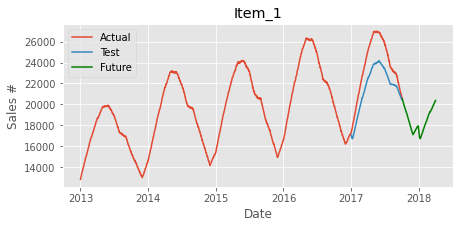

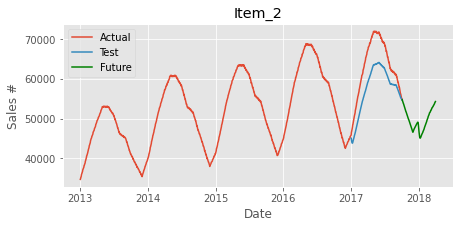

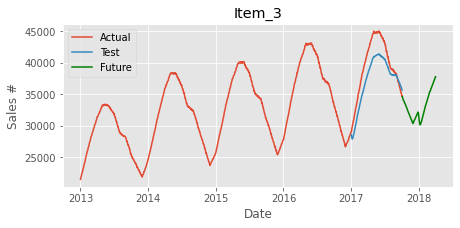

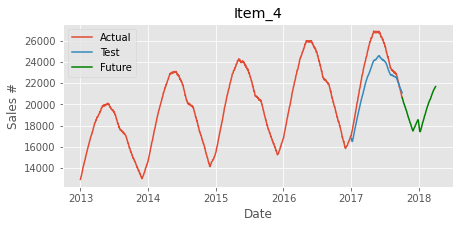

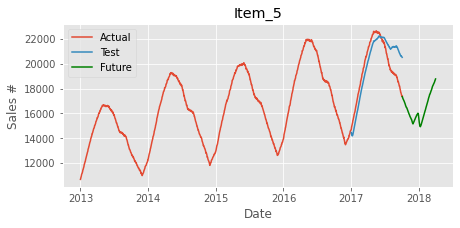

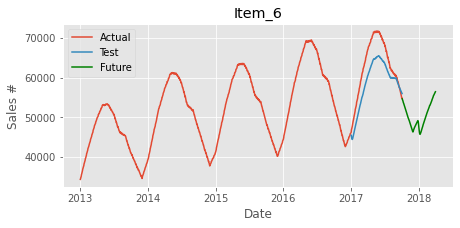

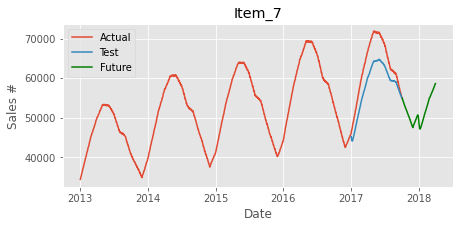

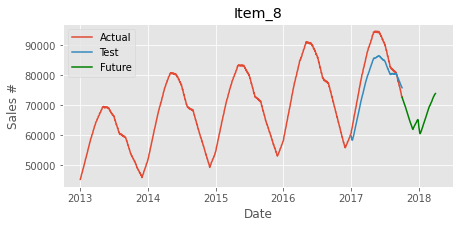

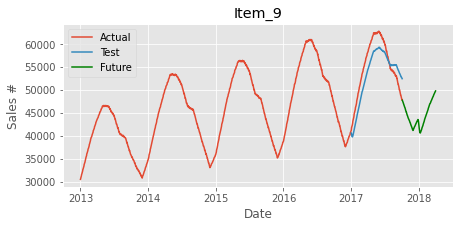

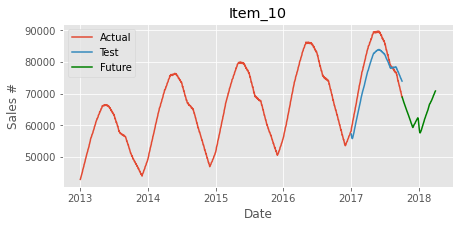

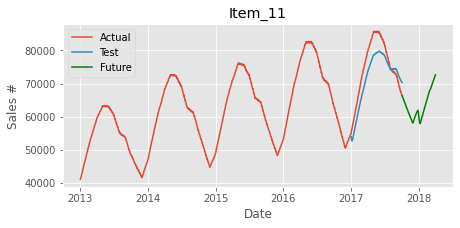

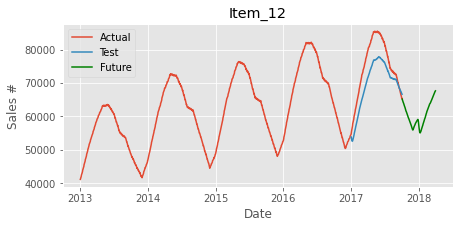

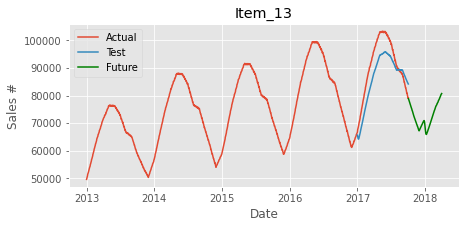

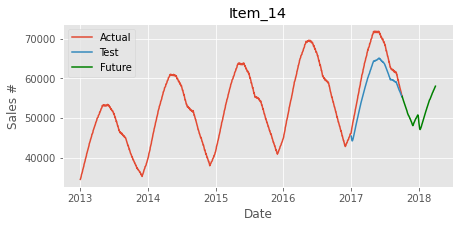

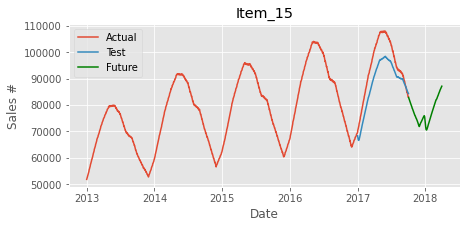

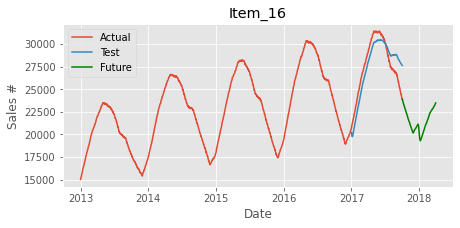

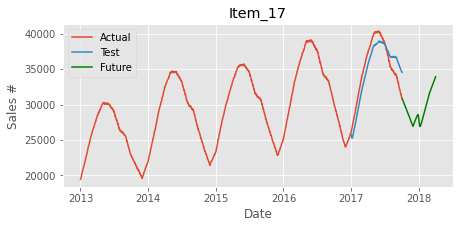

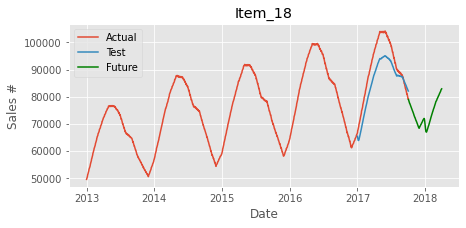

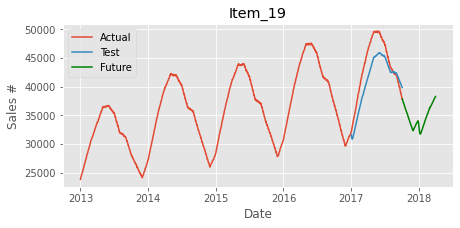

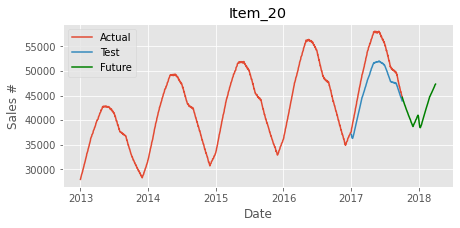

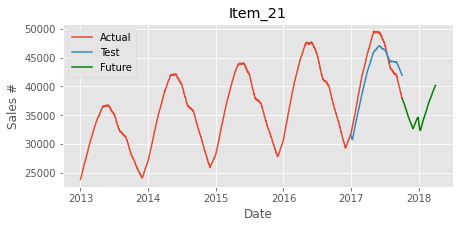

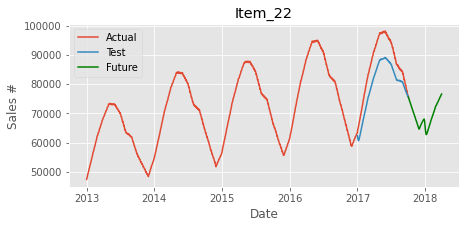

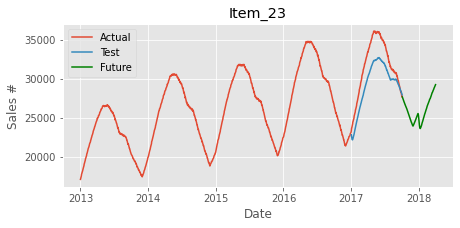

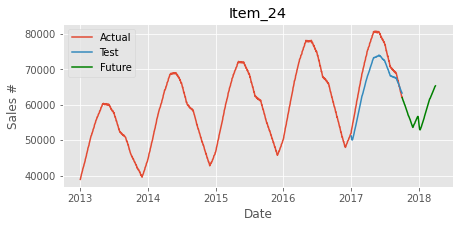

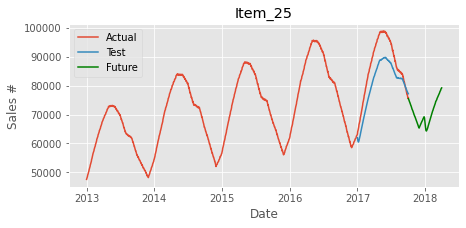

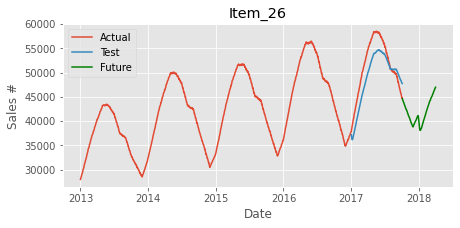

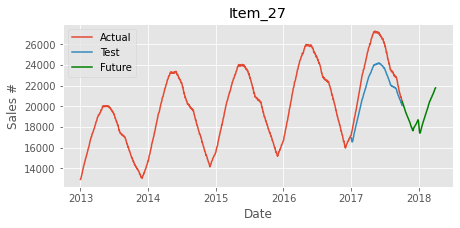

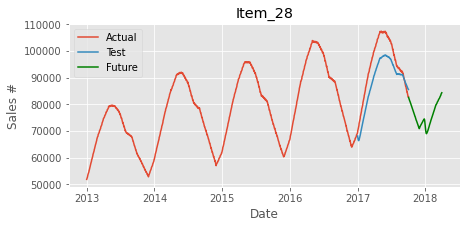

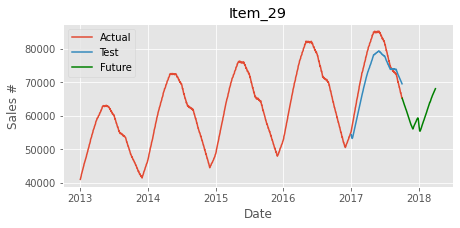

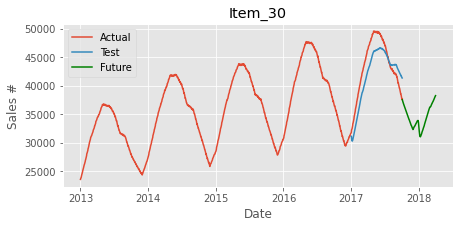

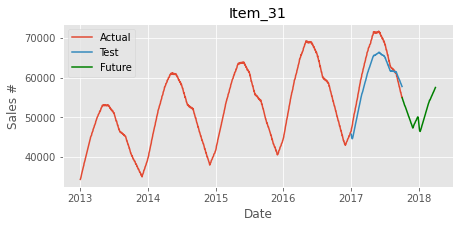

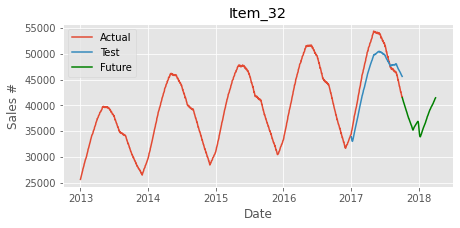

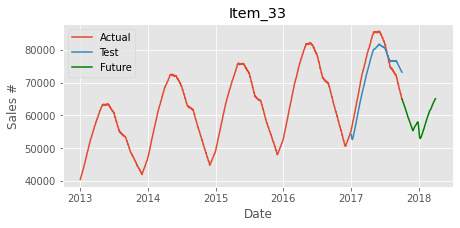

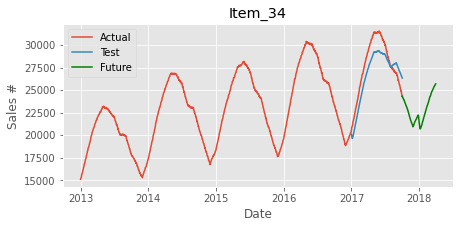

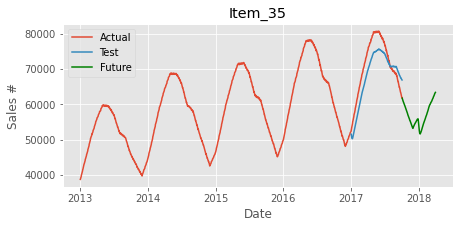

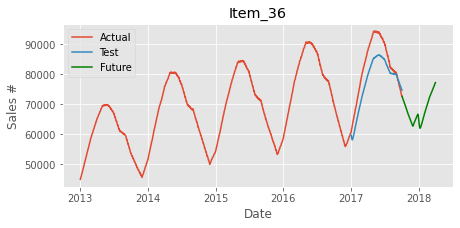

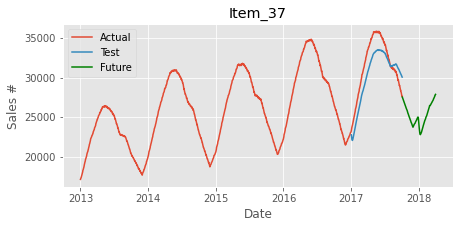

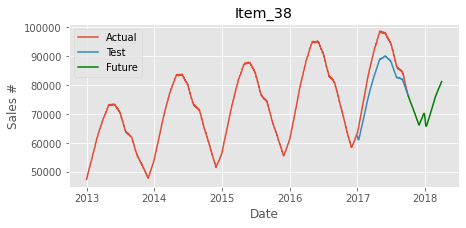

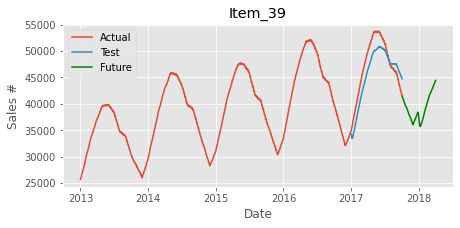

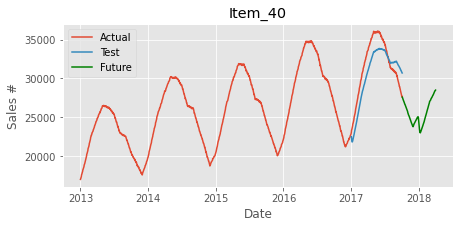

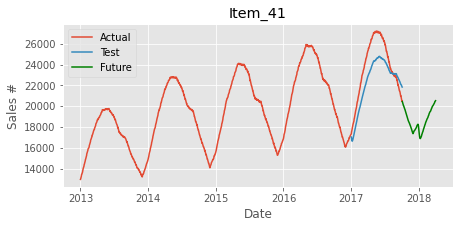

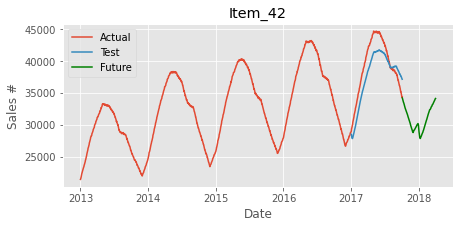

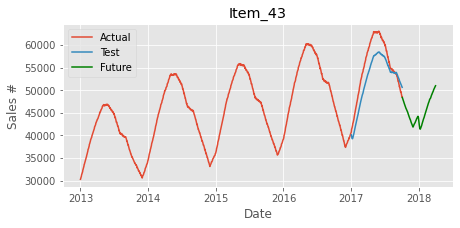

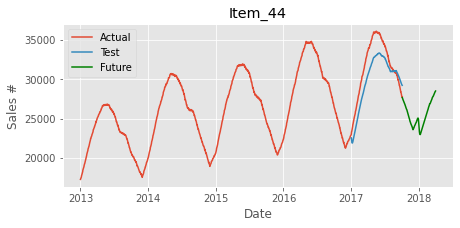

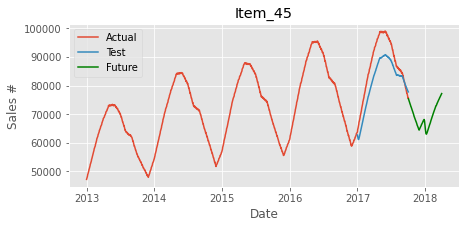

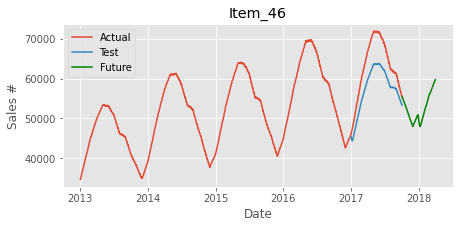

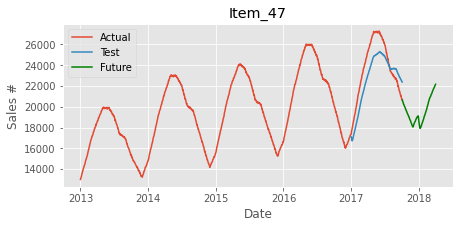

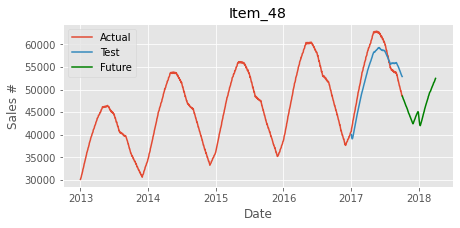

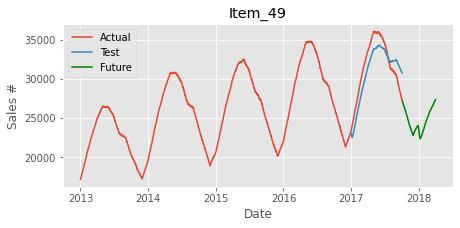

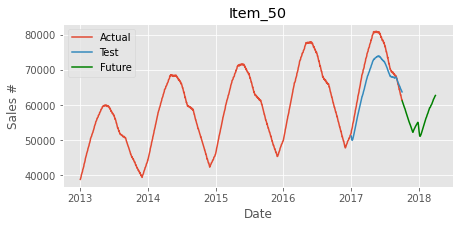

In [51]:
# list of items in the dataset
item_list = list(df2['item'].unique())

for i in item_list:

  # Filtering the dataset by items
  a = df2[df2['item']==i]
  #print(a)

  # Data Wrangling
  a = a.groupby(['item','date']).agg({'sales':'sum'}).reset_index()
  a = a.set_index('date', drop=True)
  a = a.groupby('item').sales.rolling(90).sum().shift(-90).dropna().reset_index()
  a = a.set_index('date', drop=True)
  a = a.drop('item', axis=1)
  #print(a)
     
  # Splitting the data into training and testing sets
  train = a.loc[:'2016-12-31']
  test = a.loc['2017-01-01':]
    
  # Statistics of dataset
  mean = round(a['sales'].mean(),4)
  stddev = round(a['sales'].std(),4)

  # Holt Winters Model
  
  # Predicting the test dataset values
  hwdf_model_test = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365).fit()
  
  # We are forecasting only for 275 days as we have lost 90 days from '02/10/2017' as a result of rolling(90) and shift(-90)
  # Passing 365 as the argument for forecasting will result in Value Error as given below
  # 'ValueError: Found input variables with inconsistent numbers of samples: [275, 365]'
  
  hwdf_model_test_pred = hwdf_model_test.forecast(275)
    
  # dictionary for test forecast
  key = 'Item_'+str(i)
  value = hwdf_model_test_pred
  test_forecast_dict2.update({key:value})

  # Evaluation Metrics
  r2 = round(r2_score(test, hwdf_model_test_pred),3).astype(float)
  mse = round(mean_squared_error(test, hwdf_model_test_pred),3).astype(float)
  rmse = round(np.sqrt(mse),3).astype(float)
  mae = round(mean_absolute_error(test, hwdf_model_test_pred),3).astype(float)
  mape = round(mean_absolute_percentage_error(test, hwdf_model_test_pred),3).astype(float)
  
  # dictionary for performance evaluation metrics
  key1 = 'Item_'+str(i)
  value1 = {'r2':r2, 'MSE':mse, 'RMSE':rmse, 'MAE':mae, 'MAPE':mape}
  em_dict_dict2.update({key1:value1})
  
  # Forecasting Future Demand
  hwdf_model_future = ExponentialSmoothing(a, trend='add', seasonal='add', seasonal_periods=365).fit()

  # Forecasting for the future
  hwdf_model_future_pred = hwdf_model_future.forecast(180)   
  #print(hwdf_model_future_pred,'\n')

  # dictionary for future forecast
  key2 = 'Item'+str(i)
  value2 = hwdf_model_future_pred
  future_forecast_dict2.update({key2:value2})

  # Visualization
  plt.figure(figsize=(7,3))
  plt.title('Item_'+str(i))
  plt.plot(a, label='Actual')                        # Actual sales
  plt.plot(hwdf_model_test_pred, label='Test')      # test pred
  plt.plot(hwdf_model_future_pred, label='Future', color='green')  # future pred
  plt.xlabel('Date')
  plt.ylabel('Sales #')
  plt.legend(loc='best')
  plt.show()

**The plot has a smaller peak in 2018-19 period (bad forecast) due to the rolling(90), shift(-90), dropna operation. The above operation truncates the dataset beyond 02/10/2017. Hence forecasting the future begins from 02/10/2017. Hence, the poor result. To confirm this hypothesis, uncomment line# 16 and run the code.**

In [52]:
# dictionary for test forecast

test_forecast_dict2 = pd.DataFrame(test_forecast_dict2)
test_forecast_dict2

Item_1        Item_2        Item_3        Item_4  \
2017-01-01  17050.554544  45078.905194  28526.978726  16813.448194   
2017-01-02  16932.278818  44709.691275  28311.749644  16686.235250   
2017-01-03  16875.929719  44466.177353  28159.149084  16612.533356   
2017-01-04  16777.963463  44158.314840  28011.719330  16536.709492   
2017-01-05  16734.524496  43975.177602  27923.594438  16505.555351   
...                  ...           ...           ...           ...   
2017-09-28  20542.552752  55061.928214  35941.077540  21253.591850   
2017-09-29  20503.470627  54949.504176  35849.747218  21200.155515   
2017-09-30  20474.774344  54870.425727  35793.315307  21176.338393   
2017-10-01  20478.108399  54779.419993  35729.387001  21128.671499   
2017-10-02  20419.123962  54690.897186  35681.622226  21088.805789   

                  Item_5        Item_6        Item_7        Item_8  \
2017-01-01  14460.101677  45506.416599  45272.185149  59726.341434   
2017-01-02  14352.586941  45144.716943  44903.543982  59339.006158   
2017-01-03  14279.697663  44934.231706  44682.983278  59073.805982   
2017-01-04  14206.672049  44650.782276  44341.056096  58674.244326   
2017-01-05  14192.003189  44519.343703  44172.452149  58484.185229   
...                  ...           ...           ...           ...   
2017-09-28  20610.284067  56455.300327  55383.173319  76336.892826   
2017-09-29  20584.738210  56338.794990  55245.890677  76191.386033   
2017-09-30  20551.904874  56215.453605  55131.172536  76112.448955   
2017-10-01  20528.165857  56102.258338  55049.899765  75962.736997   
2017-10-02  20516.729054  56001.861716  54950.534568  75848.951836   

                  Item_9       Item_10  ...       Item_41       Item_42  \
2017-01-01  40633.164036  57253.214757  ...  17028.289758  28544.079534   
2017-01-02  40341.255816  56808.628132  ...  16878.883855  28320.760165   
2017-01-03  40171.425481  56512.199439  ...  16769.326295  28167.634816   
2017-01-04  39939.355335  56191.956216  ...  16675.772538  27983.444191   
2017-01-05  39858.351103  55978.274578  ...  16640.744278  27911.178274   
...                  ...           ...  ...           ...           ...   
2017-09-28  52799.413260  74477.143957  ...  22002.034313  37483.640698   
2017-09-29  52707.173514  74324.286937  ...  21944.638498  37391.235835   
2017-09-30  52643.976503  74209.424662  ...  21897.277097  37322.848035   
2017-10-01  52588.047216  74078.739636  ...  21874.418639  37257.119387   
2017-10-02  52485.567707  73939.126173  ...  21834.715030  37175.932759   

                 Item_43       Item_44       Item_45       Item_46  \
2017-01-01  40126.553199  22561.744873  62757.911304  45352.373296   
2017-01-02  39854.775660  22337.909545  62263.752556  45061.126763   
2017-01-03  39680.776934  22166.986173  61939.923435  44863.317784   
2017-01-04  39449.522168  22003.220713  61546.654346  44582.786782   
2017-01-05  39319.356579  21920.494992  61293.436410  44437.827053   
...                  ...           ...           ...           ...   
2017-09-28  51012.335736  29439.944158  78359.303301  53794.297991   
2017-09-29  50883.356359  29380.973472  78209.193062  53674.214836   
2017-09-30  50820.750163  29337.619186  78093.689075  53538.537645   
2017-10-01  50728.667033  29310.740065  77985.914283  53460.338004   
2017-10-02  50642.846349  29250.092618  77827.965259  53317.102382   

                 Item_47       Item_48       Item_49       Item_50  
2017-01-01  17097.248402  40053.220266  23014.254712  51222.151254  
2017-01-02  16947.235370  39667.953850  22827.403107  50798.648442  
2017-01-03  16865.450322  39434.998001  22718.925414  50559.872892  
2017-01-04  16765.386368  39196.062480  22598.001750  50256.044768  
2017-01-05  16727.424052  39092.695009  22539.179531  50089.683071  
...                  ...           ...           ...           ...  
2017-09-28  22509.337538  53220.899350  30974.253701  64274.850380  
2017-09-29  22484.352441  53113.005568  30

In [53]:
# performance evaluation metrics

em_dict_dict2 = pd.DataFrame(em_dict_dict2)
em_dict_dict2

Item_1        Item_2       Item_3       Item_4       Item_5  \
r2          0.326  2.140000e-01        0.598        0.555        0.555   
MSE   4561323.031  3.689767e+07  7309924.094  3026833.603  1992084.982   
RMSE     2135.725  6.074345e+03     2703.687     1739.780     1411.412   
MAE      1985.157  5.629683e+03     2413.350     1520.576     1191.930   
MAPE        0.082  8.800000e-02        0.060        0.063        0.063   

            Item_6        Item_7        Item_8        Item_9       Item_10  \
r2    5.020000e-01  4.180000e-01  5.300000e-01  6.940000e-01  6.210000e-01   
MSE   2.298421e+07  2.740044e+07  3.764449e+07  1.015465e+07  2.634496e+07   
RMSE  4.794185e+03  5.234543e+03  6.135510e+03  3.186635e+03  5.132735e+03   
MAE   4.282879e+03  4.791747e+03  5.492957e+03  2.975387e+03  4.646362e+03   
MAPE  6.700000e-02  7.500000e-02  6.500000e-02  5.500000e-02  5.900000e-02   

      ...      Item_41      Item_42       Item_43      Item_44       Item_45  \
r2    ...        0.539        0.657  6.130000e-01        0.607  5.260000e-01   
MSE   ...  3316943.359  5931235.003  1.353000e+07  4634778.367  4.185535e+07   
RMSE  ...     1821.248     2435.413  3.678315e+03     2152.854  6.469571e+03   
MAE   ...     1624.014     2212.959  3.247140e+03     1925.413  5.820464e+03   
MAPE  ...        0.067        0.056  5.800000e-02        0.061  6.600000e-02   

           Item_46      Item_47       Item_48      Item_49       Item_50  
r2    2.660000e-01        0.599  6.700000e-01        0.698  5.480000e-01  
MSE   3.500658e+07  2797696.714  1.102405e+07  3520444.428  2.726934e+07  
RMSE  5.916636e+03     1672.632  3.320249e+03     1876.285  5.222006e+03  
MAE   5.616727e+03     1536.234  3.091518e+03     1748.358  4.654946e+03  
MAPE  8.700000e-02        0.064  5.600000e-02        0.056  6.400000e-02  

[5 rows x 50 columns]

In [54]:
# dictionary for future forecast
# we are seeing results from 3/10/2017 due to the rolling 90 operation

future_forecast_dict2 = pd.DataFrame(future_forecast_dict2)
future_forecast_dict2

Item1         Item2         Item3         Item4  \
2017-10-03  20528.189271  54738.282501  34597.905305  20595.511189   
2017-10-04  20454.052404  54578.268809  34474.386213  20541.952919   
2017-10-05  20393.954156  54437.331500  34391.876268  20471.614838   
2017-10-06  20334.755449  54281.585345  34299.105440  20397.578387   
2017-10-07  20267.901577  54155.788141  34196.897232  20344.470245   
...                  ...           ...           ...           ...   
2018-03-27  20266.776621  53960.780004  37507.379980  21560.485090   
2018-03-28  20271.374611  54024.168333  37548.329982  21571.921122   
2018-03-29  20304.444971  54135.825965  37646.368242  21610.111771   
2018-03-30  20360.740649  54221.413707  37730.476763  21635.259617   
2018-03-31  20384.843175  54314.782622  37777.831762  21675.588583   

                   Item5         Item6         Item7         Item8  \
2017-10-03  17342.789992  54651.903011  54914.321577  72572.598510   
2017-10-04  17287.519597  54521.866879  54768.233612  72301.084643   
2017-10-05  17235.441682  54412.230237  54610.506688  72156.786881   
2017-10-06  17194.448800  54296.717726  54479.913909  71988.834668   
2017-10-07  17162.659252  54111.379404  54353.891515  71813.117167   
...                  ...           ...           ...           ...   
2018-03-27  18620.078566  56076.507330  58241.210238  73604.975054   
2018-03-28  18639.341460  56146.661830  58321.821045  73648.858207   
2018-03-29  18684.639020  56255.253076  58427.045475  73761.932433   
2018-03-30  18726.455486  56375.631074  58548.001535  73828.301615   
2018-03-31  18772.951485  56464.063456  58630.276074  73909.709831   

                   Item9        Item10  ...        Item41        Item42  \
2017-10-03  47764.120547  68851.818745  ...  20435.059062  34224.756009   
2017-10-04  47629.671526  68650.575542  ...  20368.359715  34108.372949   
2017-10-05  47518.727907  68499.512433  ...  20318.087887  33995.132111   
2017-10-06  47436.615400  68328.626362  ...  20253.879626  33894.316016   
2017-10-07  47310.987408  68097.931424  ...  20186.942351  33791.809543   
...                  ...           ...  ...           ...           ...   
2018-03-27  49524.832403  70324.535379  ...  20418.209088  33948.232644   
2018-03-28  49587.451983  70416.300851  ...  20448.394066  34004.991942   
2018-03-29  49667.391299  70567.563641  ...  20480.454759  34068.380387   
2018-03-30  49747.886655  70701.182939  ...  20519.658879  34130.654161   
2018-03-31  49813.510414  70808.322619  ...  20523.489691  34152.657835   

                  Item43        Item44        Item45        Item46  \
2017-10-03  48366.605537  27678.412987  75380.526057  55408.838047   
2017-10-04  48233.764248  27595.572965  75130.686262  55295.021895   
2017-10-05  48095.593370  27530.635973  74962.362057  55172.785952   
2017-10-06  47973.252328  27456.051135  74756.762313  55078.131351   
2017-10-07  47839.591626  27398.685391  74535.930563  54932.272181   
...                  ...           ...           ...           ...   
2018-03-27  50706.337609  28371.676950  76760.120985  59392.305397   
2018-03-28  50757.534138  28407.130351  76865.356567  59479.176084   
2018-03-29  50833.652232  28458.396095  77017.467285  59576.353196   
2018-03-30  50910.556494  28482.794215  77149.532796  59674.418825   
2018-03-31  50991.568463  28525.743693  77239.451083  59759.443785   

                  Item47        Item48        Item49        Item50  
2017-10-03  20640.654723  48524.069053  27176.201494  61199.091447  
2017-10-04  20571.923098  48387.378570  27105.832715  61040.789545  
2017-10-05  20530.702763  48296.200526  27022.321525  60858.951221  
2017-10-06  20483.378167  48206.955248  26945.212501  60684.944825  
2017-10-07  20421.935019  48070.094657  26873.296211  60520.228648  
...                  ...           ...           ...           ...  
2018-03-27  21997.215800  52081.060850  27199.054186  62427.795147  
2018-03-28  22042.002363  52158.495012  272

In [55]:
dfr2 = master_data.copy()
dfr2 = dfr2.groupby(['item','date']).agg({'sales':'sum'}).reset_index().set_index('date', drop=True)
dfr2 = dfr2.groupby(['item']).sales.rolling(90).sum().shift(-90).dropna().reset_index()
dfr2 = pd.pivot_table(data=dfr2, index='date', columns='item', values='sales', aggfunc='sum')
dfr2.index.name=None
dfr2.columns.name=None
dfr2_columns_name = ['Item_'+str(i) for i in list(master_data['item'].unique())]
dfr2.columns = dfr2_columns_name

dfr2 = dfr2.loc['2017-01-01':'2017-12-31',:]
results2 = pd.DataFrame(test_forecast_dict2 - dfr2).dropna()
results2

Item_1       Item_2       Item_3      Item_4       Item_5  \
2017-01-01 -317.445456 -1026.094806  -498.021274 -314.551806  -288.898323   
2017-01-02 -586.721182 -1886.308725 -1002.250356 -601.764750  -531.413059   
2017-01-03 -698.070281 -2281.822647 -1303.850916 -735.466644  -657.302337   
2017-01-04 -867.036537 -2872.685160 -1565.280670 -887.290508  -807.327951   
2017-01-05 -983.475504 -3292.822398 -1799.405562 -973.444649  -884.996811   
...                ...          ...          ...         ...          ...   
2017-09-28 -253.447248  -464.071786   903.077540  361.591850  3095.284067   
2017-09-29 -200.529373  -328.495824   936.747218  386.155515  3131.738210   
2017-09-30 -167.225656  -149.574273  1030.315307  483.338393  3140.904874   
2017-10-01  -99.891601     1.419993  1081.387001  493.671499  3179.165857   
2017-10-02 -190.876038  -195.102814   963.622226  441.805789  3139.729054   

                 Item_6       Item_7       Item_8       Item_9      Item_10  \
2017-01-01  -868.583401  -951.814851 -1193.658566  -764.835964 -1167.785243   
2017-01-02 -1731.283057 -1738.456018 -2236.993842 -1470.744184 -2225.371868   
2017-01-03 -2071.768294 -2095.016722 -2675.194018 -1770.574519 -2731.800561   
2017-01-04 -2560.217724 -2650.943904 -3409.755674 -2141.644665 -3378.043784   
2017-01-05 -2875.656297 -2995.547851 -3830.814771 -2344.648897 -3831.725422   
...                 ...          ...          ...          ...          ...   
2017-09-28  1062.300327  -206.826681  2739.892826  4479.413260  4585.143957   
2017-09-29  1143.794990  -152.109323  2925.386033  4593.173514  4736.286937   
2017-09-30  1260.453605    -7.827464  3202.448955  4707.976503  4965.424662   
2017-10-01  1344.258338    64.899765  3293.736997  4777.047216  5131.739636   
2017-10-02  1212.861716  -122.465432  3086.951836  4565.567707  4934.126173   

            ...      Item_41      Item_42      Item_43      Item_44  \
2017-01-01  ...  -340.710242  -560.920466  -760.446801  -556.255127   
2017-01-02  ...  -659.116145 -1088.239835 -1469.224340 -1003.090455   
2017-01-03  ...  -822.673705 -1306.365184 -1764.223066 -1214.013827   
2017-01-04  ... -1016.227462 -1612.555809 -2152.477832 -1540.779287   
2017-01-05  ... -1125.255722 -1796.821726 -2415.643421 -1703.505008   
...         ...          ...          ...          ...          ...   
2017-09-28  ...  1275.034313  2740.640698  1871.335736  1357.944158   
2017-09-29  ...  1309.638498  2758.235835  1968.356359  1420.973472   
2017-09-30  ...  1354.277097  2883.848035  2148.750163  1504.619186   
2017-10-01  ...  1429.418639  2948.119387  2256.667033  1592.740065   
2017-10-02  ...  1338.715030  2804.932759  2135.846349  1488.092618   

                Item_45      Item_46      Item_47      Item_48      Item_49  \
2017-01-01 -1219.088696  -844.626704  -384.751598  -866.779734  -448.745288   
2017-01-02 -2386.247444 -1567.873237  -729.764630 -1679.046150  -887.596893   
2017-01-03 -2919.076565 -1899.682216  -846.549678 -2049.001999 -1073.074586   
2017-01-04 -3613.345654 -2347.213218 -1031.613632 -2544.937520 -1312.998250   
2017-01-05 -4174.563590 -2645.172947 -1140.575948 -2825.304991 -1484.820469   
...                 ...          ...          ...          ...          ...   
2017-09-28  1796.303301 -2326.702009  1617.337538  4098.899350  3377.253701   
2017-09-29  2035.193062 -2181.785164  1688.352441  4220.005568  3429.229296   
2017-09-30  2309.689075 -2075.462355  1710.908010  4314.659846  3534.063081   
2017-10-01  2481.914283 -1974.661996  1789.174290  4372.885952  3577.498778   
2017-10-02  2224.965259 -2247.897618  1691.788536  4237.776603  3513.976897   

                Item_50  
2017-01-01 -1001.848746  
2017-01-02 -1937.351558  
2017-01-03 -2359.127108  
2017-01-04 -2901.955232  
2017-01-05 -3225.316929  
...                 ...  
2017-09-28  2074.850380  
2017-09-29  2177.400864  
2017-09-30  2376.839265  
2017-10-01  2579.055595  
2017-10-02  2398.809687  

[275 rows x 50 columns]

In [56]:
# Calculating the difference between the predicted and the actual sales

# Actual sales - Demand
# Predicted sales - Supply

# (predicted sales - actual sales) > 0 = Retenion loss - Multiple by 10
# (predicted sales - actual sales) < 0 = Oppurtunity loss - Multiply by 3

results2 = pd.DataFrame(test_forecast_dict2 - dfr2).dropna()

# Oppurtunity loss and Retention loss

# Oppurtunity loss  - When the demand is high and the supply is lesser than demand
# Retention loss - When the suppy is high and the demand is lesser than supply
# A negative sign in the forecast value

def loss(x):
  if x<0:
    x = x*3
    return x
  else:
    x = x*10
    return x

for i in results.columns:
  results2[i] = np.ceil(results2[i].apply(lambda x: loss(x)))

results2

Item_1  Item_2   Item_3  Item_4   Item_5   Item_6  Item_7  \
2017-01-01  -952.0 -3078.0  -1494.0  -943.0   -866.0  -2605.0 -2855.0   
2017-01-02 -1760.0 -5658.0  -3006.0 -1805.0  -1594.0  -5193.0 -5215.0   
2017-01-03 -2094.0 -6845.0  -3911.0 -2206.0  -1971.0  -6215.0 -6285.0   
2017-01-04 -2601.0 -8618.0  -4695.0 -2661.0  -2421.0  -7680.0 -7952.0   
2017-01-05 -2950.0 -9878.0  -5398.0 -2920.0  -2654.0  -8626.0 -8986.0   
...            ...     ...      ...     ...      ...      ...     ...   
2017-09-28  -760.0 -1392.0   9031.0  3616.0  30953.0  10624.0  -620.0   
2017-09-29  -601.0  -985.0   9368.0  3862.0  31318.0  11438.0  -456.0   
2017-09-30  -501.0  -448.0  10304.0  4834.0  31410.0  12605.0   -23.0   
2017-10-01  -299.0    15.0  10814.0  4937.0  31792.0  13443.0   649.0   
2017-10-02  -572.0  -585.0   9637.0  4419.0  31398.0  12129.0  -367.0   

             Item_8   Item_9  Item_10  ...  Item_41  Item_42  Item_43  \
2017-01-01  -3580.0  -2294.0  -3503.0  ...  -1022.0  -1682.0  -2281.0   
2017-01-02  -6710.0  -4412.0  -6676.0  ...  -1977.0  -3264.0  -4407.0   
2017-01-03  -8025.0  -5311.0  -8195.0  ...  -2468.0  -3919.0  -5292.0   
2017-01-04 -10229.0  -6424.0 -10134.0  ...  -3048.0  -4837.0  -6457.0   
2017-01-05 -11492.0  -7033.0 -11495.0  ...  -3375.0  -5390.0  -7246.0   
...             ...      ...      ...  ...      ...      ...      ...   
2017-09-28  27399.0  44795.0  45852.0  ...  12751.0  27407.0  18714.0   
2017-09-29  29254.0  45932.0  47363.0  ...  13097.0  27583.0  19684.0   
2017-09-30  32025.0  47080.0  49655.0  ...  13543.0  28839.0  21488.0   
2017-10-01  32938.0  47771.0  51318.0  ...  14295.0  29482.0  22567.0   
2017-10-02  30870.0  45656.0  49342.0  ...  13388.0  28050.0  21359.0   

            Item_44  Item_45  Item_46  Item_47  Item_48  Item_49  Item_50  
2017-01-01  -1668.0  -3657.0  -2533.0  -1154.0  -2600.0  -1346.0  -3005.0  
2017-01-02  -3009.0  -7158.0  -4703.0  -2189.0  -5037.0  -2662.0  -5812.0  
2017-01-03  -3642.0  -8757.0  -5699.0  -2539.0  -6147.0  -3219.0  -7077.0  
2017-01-04  -4622.0 -10840.0  -7041.0  -3094.0  -7634.0  -3938.0  -8705.0  
2017-01-05  -5110.0 -12523.0  -7935.0  -3421.0  -8475.0  -4454.0  -9675.0  
...             ...      ...      ...      ...      ...      ...      ...  
2017-09-28  13580.0  17964.0  -6980.0  16174.0  40989.0  33773.0  20749.0  
2017-09-29  14210.0  20352.0  -6545.0  16884.0  42201.0  34293.0  21775.0  
2017-09-30  15047.0  23097.0  -6226.0  17110.0  43147.0  35341.0  23769.0  
2017-10-01  15928.0  24820.0  -5923.0  17892.0  43729.0  35775.0  25791.0  
2017-10-02  14881.0  22250.0  -6743.0  16918.0  42378.0  35140.0  23989.0  

[275 rows x 50 columns]

## **Model 4 - ARIMA**

In [57]:
# copying from the master data that we imported in the beginning
ms = master_data.copy()
ms.head()

item  sales
date                   
2013-01-01     1     13
2013-01-02     1     11
2013-01-03     1     14
2013-01-04     1     13
2013-01-05     1     10

In [58]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   item    913000 non-null  int64
 1   sales   913000 non-null  int64
dtypes: int64(2)
memory usage: 20.9 MB


In [59]:
ms.describe()

item          sales
count  913000.000000  913000.000000
mean       25.500000      52.250287
std        14.430878      28.801144
min         1.000000       0.000000
25%        13.000000      30.000000
50%        25.500000      47.000000
75%        38.000000      70.000000
max        50.000000     231.000000

In [60]:
ms['item'].value_counts().sort_values(ascending=True)

1     18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
25    18260
26    18260
27    18260
49    18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
23    18260
37    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
39    18260
50    18260
Name: item, dtype: int64

In [61]:
ms.item.nunique()

50

In [62]:
# every date has 500 entries i.e. 10 products across 50 stores
# there are about 1826 date values i.e. 5 years of data
ms.index.value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: date, Length: 1826, dtype: int64

*Due to the complexity in arriving at the the p,d,q values from the acf and pacf plots and the time involved in computing the same through iterations for all 50 items, we are performing ARIMA & SARIMA by taking out a single item for practice purposes*

In [63]:
ms = ms[ms['item']==1]
ms = ms.drop(['item'], axis=1)

### **Resampling Data**

In [64]:
# resampling the data by the starting of each month
#ms = ms.reset_index()
ms = ms.resample('MS').sum().reset_index()

In [65]:
ms = ms.set_index('date', drop=True)

In [66]:
ms

sales
date             
2013-01-01   3794
2013-02-01   3863
2013-03-01   5190
2013-04-01   5783
2013-05-01   6298
2013-06-01   6739
2013-07-01   7107
2013-08-01   6492
2013-09-01   5693
2013-10-01   5497
2013-11-01   5958
2013-12-01   4309
2014-01-01   4323
2014-02-01   4391
2014-03-01   5860
2014-04-01   6552
2014-05-01   7370
2014-06-01   7888
2014-07-01   8330
2014-08-01   7401
2014-09-01   6599
2014-10-01   6411
2014-11-01   6742
2014-12-01   4910
2015-01-01   4626
2015-02-01   4633
2015-03-01   6121
2015-04-01   7060
2015-05-01   7758
2015-06-01   7992
2015-07-01   8838
2015-08-01   7770
2015-09-01   7011
2015-10-01   6644
2015-11-01   7102
2015-12-01   4952
2016-01-01   5008
2016-02-01   5160
2016-03-01   6624
2016-04-01   7697
2016-05-01   8240
2016-06-01   8851
2016-07-01   9758
2016-08-01   8176
2016-09-01   7467
2016-10-01   7231
2016-11-01   7334
2016-12-01   5678
2017-01-01   5236
2017-02-01   5299
2017-03-01   6744
2017-04-01   7927
2017-05-01   8561
2017-06-01   8930
2017-07-01   9960
2017-08-01   8548
2017-09-01   7843
2017-10-01   7620
2017-11-01   7676
2017-12-01   5809

### **Data Visualization**

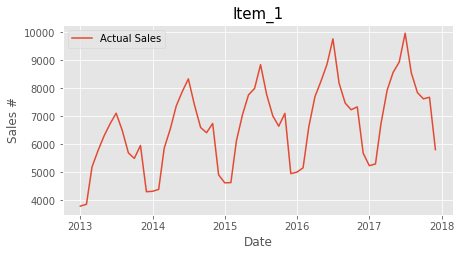

In [67]:
plt.figure(figsize=(7,3.5))
plt.title('Item_1', size=15)
plt.xlabel('Date', size=12)
plt.ylabel('Sales #', size=12)
plt.plot(ms, label='Actual Sales')
plt.legend()

plt.show()

### **EDA - Decomposing & Rolling Stats**

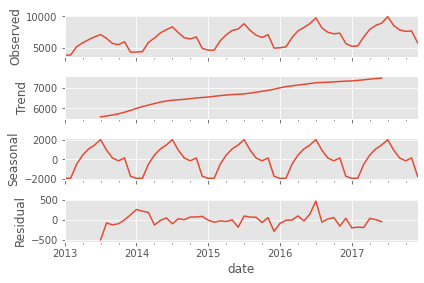

<Figure size 1080x432 with 0 Axes>

In [68]:
decomposition = seasonal_decompose(ms, model='additive')
decomp_fig = decomposition.plot()
plt.figure(figsize=(15,6))
plt.show()

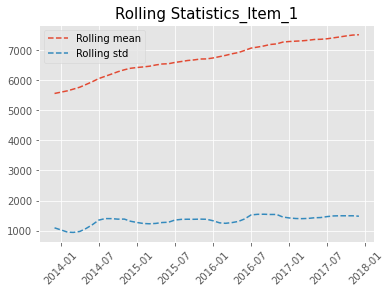

In [69]:
rm = ms.sales.rolling(12).mean()
rstd = ms.sales.rolling(12).std()
mean = ms.sales.mean()
std = ms.sales.std()
plt.title('Rolling Statistics_Item_1', size=15)
plt.plot(rm, linestyle = '--', label='Rolling mean')
plt.plot(rstd, linestyle = '--', label='Rolling std')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

### **Check for Stationarity**

#### **Augmented Dickey Fuller Test**

In [70]:
# check for stationarity

test = adfuller(ms.sales)
output = pd.Series(test[0:4], index=['ADF stat', 'p_value', 'Lags', 'Obs'])

for key,value in test[4].items():
  output['Critical value {}'.format(key)]=value
print(output,'\n')

if output[1] < 0.05:
  print('We reject Ho. The data is stationary')
else:
  print('We fail to reject Ho. The data is non-stationary.')

ADF stat              -4.926312
p_value                0.000031
Lags                  11.000000
Obs                   48.000000
Critical value 1%     -3.574589
Critical value 5%     -2.923954
Critical value 10%    -2.600039
dtype: float64 

We reject Ho. The data is stationary


#### **KPSS**

In [71]:
kpsstest = kpss(ms.sales, regression='ct')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
  kpss_output['Critical Value (%s)'%key] = value
print(kpss_output,'\n')

if kpss_output[1]<0.05:
  print('We fail to reject Ho. Therefore, the series is stationary')
else:
  print('We reject the Ho. Therefore, the series is non_stationary')

Test Statistic            0.413732
p-value                   0.010000
Lags Used                11.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64 

We fail to reject Ho. Therefore, the series is stationary


#### **Check for strict stationarity**

In [72]:
# ADF stationary & KPSS stationary
if (output[1] < 0.05) & (kpss_output[1]<0.05):
  print('The series is strictly stationary')
# ADF is non-stationary & KPSS stationary
elif (output[1]>=0.05) & (kpss_output[1]<0.05):
  print('The series is trend stationary')
# ADF is stationary & KPSS non-stationary
elif (output[1]<0.05) & (kpss_output[1]>=0.05):
  print('The series is difference stationary')
# Both are non-stationary
else:
  print('The series is non-stationary')

The series is strictly stationary


### **Train Test Split**

In [73]:
ms.index.name=None
ms

sales
2013-01-01   3794
2013-02-01   3863
2013-03-01   5190
2013-04-01   5783
2013-05-01   6298
2013-06-01   6739
2013-07-01   7107
2013-08-01   6492
2013-09-01   5693
2013-10-01   5497
2013-11-01   5958
2013-12-01   4309
2014-01-01   4323
2014-02-01   4391
2014-03-01   5860
2014-04-01   6552
2014-05-01   7370
2014-06-01   7888
2014-07-01   8330
2014-08-01   7401
2014-09-01   6599
2014-10-01   6411
2014-11-01   6742
2014-12-01   4910
2015-01-01   4626
2015-02-01   4633
2015-03-01   6121
2015-04-01   7060
2015-05-01   7758
2015-06-01   7992
2015-07-01   8838
2015-08-01   7770
2015-09-01   7011
2015-10-01   6644
2015-11-01   7102
2015-12-01   4952
2016-01-01   5008
2016-02-01   5160
2016-03-01   6624
2016-04-01   7697
2016-05-01   8240
2016-06-01   8851
2016-07-01   9758
2016-08-01   8176
2016-09-01   7467
2016-10-01   7231
2016-11-01   7334
2016-12-01   5678
2017-01-01   5236
2017-02-01   5299
2017-03-01   6744
2017-04-01   7927
2017-05-01   8561
2017-06-01   8930
2017-07-01   9960
2017-08-01   8548
2017-09-01   7843
2017-10-01   7620
2017-11-01   7676
2017-12-01   5809

In [74]:
train = ms.loc[:'2016-12-31']
test = ms.loc['2017-01-01':]

In [75]:
print(len(ms))
print(len(train))
print(len(test))

60
48
12


In [76]:
train

sales
2013-01-01   3794
2013-02-01   3863
2013-03-01   5190
2013-04-01   5783
2013-05-01   6298
2013-06-01   6739
2013-07-01   7107
2013-08-01   6492
2013-09-01   5693
2013-10-01   5497
2013-11-01   5958
2013-12-01   4309
2014-01-01   4323
2014-02-01   4391
2014-03-01   5860
2014-04-01   6552
2014-05-01   7370
2014-06-01   7888
2014-07-01   8330
2014-08-01   7401
2014-09-01   6599
2014-10-01   6411
2014-11-01   6742
2014-12-01   4910
2015-01-01   4626
2015-02-01   4633
2015-03-01   6121
2015-04-01   7060
2015-05-01   7758
2015-06-01   7992
2015-07-01   8838
2015-08-01   7770
2015-09-01   7011
2015-10-01   6644
2015-11-01   7102
2015-12-01   4952
2016-01-01   5008
2016-02-01   5160
2016-03-01   6624
2016-04-01   7697
2016-05-01   8240
2016-06-01   8851
2016-07-01   9758
2016-08-01   8176
2016-09-01   7467
2016-10-01   7231
2016-11-01   7334
2016-12-01   5678

In [77]:
test

sales
2017-01-01   5236
2017-02-01   5299
2017-03-01   6744
2017-04-01   7927
2017-05-01   8561
2017-06-01   8930
2017-07-01   9960
2017-08-01   8548
2017-09-01   7843
2017-10-01   7620
2017-11-01   7676
2017-12-01   5809

 ### **Hyper Parameter Tuning** - Computing p,d,q. The p,d,q  with the lowest *RMSE* will be chosen

In [78]:
# defining a range for p, d, q

p = range(0,9)
d = range(0,9)
q = range(0,9)

# creating a list of different combinations of p,d,q
pdq_combination = list(itertools.product(p,d,q))

# creating a list for rmse and order of p,d,q
rmse = []
order = []

for pdq in pdq_combination:
  try:
    model = ARIMA(train, order=pdq).fit()
    prediction = model.predict(start = len(train), end = len(ms)-1)
    rmse_err = np.sqrt(mean_squared_error(test, prediction))
    r2_err = r2_score(test, prediction)
    rmse.append(rmse_err)
    order.append(pdq)
    r2.append(r2_err)
  except:
    continue

results = pd.DataFrame(index = order, columns=['RMSE'], data=rmse)
results.index.name='p d q'

In [79]:
results_final = pd.DataFrame(results.RMSE.sort_values(ascending=True))
results_final.head()

RMSE
p d q                 
(7, 0, 1)  1004.168962
(8, 0, 0)  1060.728376
(2, 0, 3)  1200.230818
(7, 0, 0)  1447.399328
(3, 0, 2)  1502.979458

### **ARIMA model**

In [80]:
# we choose the p,d,q values with the least RMSE value
model = ARIMA(train, order=(7,0,1)).fit()

### **Forecast - Test data**

In [81]:
prediction_test = model.predict(start=len(train), end = len(ms)-1)
prediction_test.head()

2017-01-01    5956.890893
2017-02-01    6499.345533
2017-03-01    7119.233830
2017-04-01    6821.764918
2017-05-01    7706.867110
Freq: MS, dtype: float64

### **Performance evaluation metrics**

In [82]:
mean = ms['sales'].mean()
stddev = ms['sales'].std()
err_mse = mean_squared_error(test, prediction_test)
err_rmse = np.sqrt(err_mse)
err_mae = mean_absolute_error(test, prediction_test)
err_mape = mean_absolute_percentage_error(test, prediction_test)
err_r2 = r2_score(test,prediction_test)

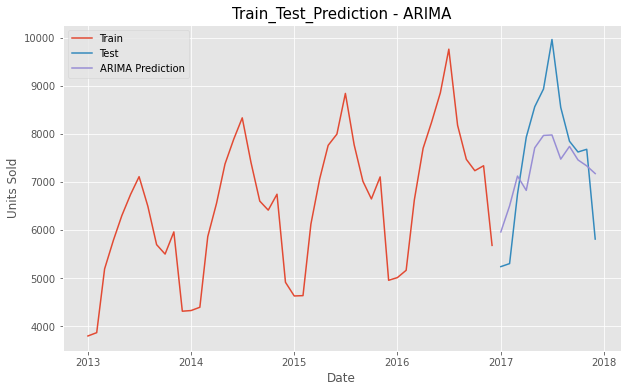

In [83]:
plt.figure(figsize=(10,6))
plt.plot(train,label='Train')
plt.plot(test, label='Test')
plt.plot(prediction_test, label='ARIMA Prediction')
plt.xlabel('Date', size=12)
plt.ylabel('Units Sold', size=12)
plt.title('Train_Test_Prediction - ARIMA', size=15)
plt.legend()
plt.show()

### **Forecast - Future data**

In [84]:
final_model_arima = ARIMA(ms, order=(7,0,1)).fit()
pred_future_arima = final_model_arima.predict(start=len(ms), end=len(ms)+2)

In [85]:
# predicted values of the future without factoring in the Seasonality
pred_future_arima

2018-01-01     7361.309738
2018-02-01     9033.538873
2018-03-01    10518.758518
Freq: MS, dtype: float64

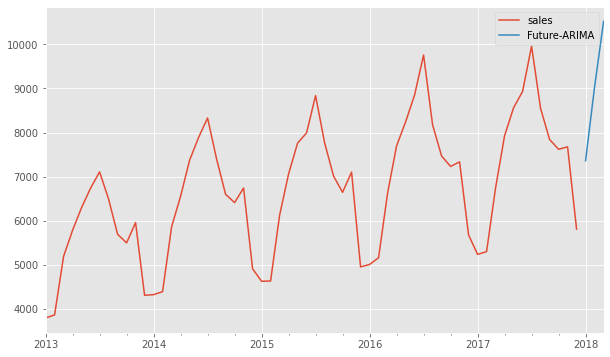

In [86]:
ms.plot(legend=True, label='Actual Sales', figsize=(10,6))
pred_future_arima.plot(legend=True, label='Future-ARIMA', figsize=(10,6))
plt.legend(loc='best')
plt.show()

## **Model 5 - SARIMA**

In [87]:
# defining seasonal order by trial and error. Started with 12 first and arrived at 8

sarima_model = SARIMAX(ms, order=(7,0,1), seasonal_order=(7,0,1,8)).fit()
predict_seasonal_test = sarima_model.predict(start=len(train), end=len(ms)-1)
predict_seasonal_future = sarima_model.predict(start=len(ms), end=len(ms)+2)

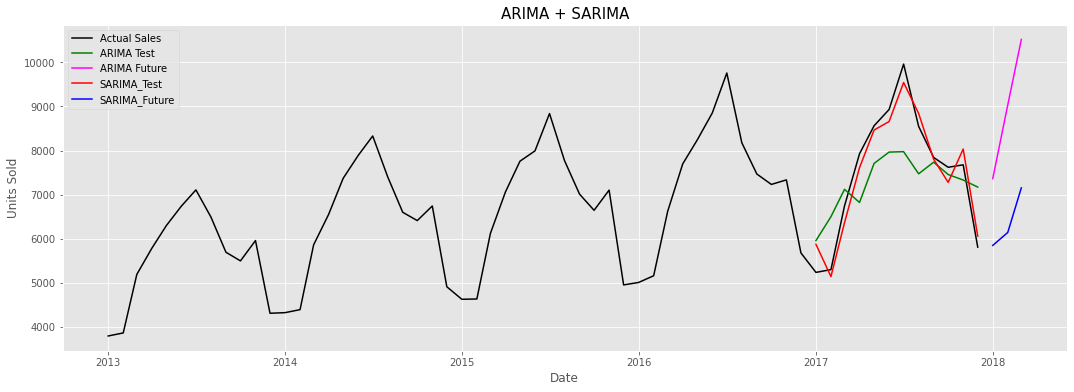

In [88]:
plt.style.use('ggplot')
plt.figure(figsize=(18,6))
plt.plot(ms, label='Actual Sales', color='black')
plt.plot(prediction_test, label='ARIMA Test', color='green')
plt.plot(pred_future_arima, label='ARIMA Future', color='magenta')
plt.plot(predict_seasonal_test, label='SARIMA_Test', color='red')
plt.plot(predict_seasonal_future, label='SARIMA_Future', color='blue')
plt.title('ARIMA + SARIMA', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.legend(loc='best')
plt.show()

# **Model Evaluation**

#### **XG Boosting**

In [89]:
avg_r2_xgb = em_dict_xgb_df.loc['r2',:].mean()
avg_rmse_xgb = em_dict_xgb_df.loc['RMSE',:].mean()

#### **Decision Tree**

In [90]:
avg_r2_dt = em_dict_dt_df.loc['r2',:].mean()
avg_rmse_dt = em_dict_dt_df.loc['RMSE', :].mean()

#### **Holt Winter's - Approach 1**

In [91]:
# calculating the average value of scores for model evaluation

avg_r2_hw_a1 = test_em_dict.loc['r2',:].mean()
avg_rmse_hw_a1 = test_em_dict.loc['RMSE',:].mean()

#### **Holt Winter's - Approach 2**

In [92]:
avg_r2_hw_a2 = em_dict_dict2.loc['r2',:].mean()
avg_rmse_hw_a2 = em_dict_dict2.loc['RMSE',:].mean()

#### **Autoregressive Integrated Moving Average (ARIMA)**

In [93]:
err_mse = mean_squared_error(test, prediction_test)
err_rmse = np.sqrt(err_mse)
err_r2 = r2_score(test,prediction_test)

#### **Seasonal ARIMA (SARIMA)**

In [94]:
err_r2_sarima = r2_score(test, predict_seasonal_test)
err_rmse_sarima = np.sqrt(mean_squared_error(test, predict_seasonal_test))

# **Summary**

In [95]:
results_dict = {'R2': [avg_r2_hw_a1, avg_r2_hw_a2, err_r2, err_r2_sarima, avg_r2_dt, avg_r2_xgb], 'RMSE':[avg_rmse_hw_a1, avg_rmse_hw_a2, err_rmse, err_rmse_sarima, avg_rmse_dt, avg_rmse_xgb]}
results_dict = pd.DataFrame(results_dict, index=['Holt Winters_App_1', 'Holt Winters_App_2', 'ARIMA','SARIMA', 'DecisionTree', 'XG Boost'])
results_dict = results_dict.sort_values(by=['R2','RMSE'], ascending=[False, True])

In [96]:
# Rounding off results

def rounding(x):
  a = round(x,2)
  return a
for i in results_dict.columns:
  results_dict[i] = results_dict[i].apply(lambda x: rounding(x))

In [97]:
# summary of evaluation metrics

results_dict

R2     RMSE
SARIMA              0.94   333.20
DecisionTree        0.88  2104.74
XG Boost            0.87  2152.67
Holt Winters_App_1  0.82  1133.01
Holt Winters_App_2  0.56  4029.89
ARIMA               0.50  1004.17